<div class="alert alert-block alert-info">
    <b>Projet 7 | Implémentez un modèle de scoring<br></b>
    <p style="color:#8B0000;">
        Notebook |  Notebook EDA & Preprocessing</p>
</div>

# | Présentation du projet et démarche envisagée

## | Projet

Je suis Data Scientist au sein d'une société financière, nommée "Prêt à dépenser",  qui propose des crédits à la consommation pour des personnes ayant peu ou pas du tout d'historique de prêt.

<img src="logo.png" style="width:300px;height:270px"/>

L’entreprise souhaite **mettre en œuvre un outil de “scoring crédit” pour calculer la probabilité** qu’un client rembourse son crédit, puis classifie la demande en crédit accordé ou refusé. Elle souhaite donc développer un **algorithme de classification** en s’appuyant sur des sources de données variées (données comportementales, données provenant d'autres institutions financières, etc.).

De plus, les chargés de relation client ont fait remonter le fait que les clients sont de plus en plus demandeurs de **transparence** vis-à-vis des décisions d’octroi de crédit. Cette demande de transparence des clients va tout à fait dans le sens des valeurs que l’entreprise veut incarner.

**Prêt à dépenser** décide donc de développer un **dashboard interactif** pour que les chargés de relation client puissent à la fois expliquer de façon la plus transparente possible les décisions d’octroi de crédit, mais également permettre à leurs clients de disposer de leurs informations personnelles et de les explorer facilement.

**Mission**

-  Construire un modèle de scoring qui donnera une prédiction sur la probabilité de faillite d'un client de façon automatique.
-  Construire un dashboard interactif à destination des gestionnaires de la relation client permettant d'interpréter les prédictions faites par le modèle, et d’améliorer la connaissance client des chargés de relation client.

Michaël, mon manager, m'incite à sélectionner un **kernel Kaggle** pour faciliter la préparation des données nécessaires à l’élaboration du modèle de scoring. J'analyserai ce kernel et l’adapterai pour m'assurer qu’il répond aux besoins de ma mission.

Je pourrai ainsi me **focaliser sur l’élaboration du modèle**, son **optimisation** et sa **compréhension**.

**Spécifications du dashboard**

Michaël m'a fourni des spécifications pour le dashboard interactif. Celui-ci devra contenir au minimum les fonctionnalités suivantes :

-  Permettre de visualiser le score et l’interprétation de ce score pour chaque client de façon intelligible pour une personne non experte en data science.
-  Permettre de visualiser des informations descriptives relatives à un client (via un système de filtre).
-  Permettre de comparer les informations descriptives relatives à un client à l’ensemble des clients ou à un groupe de clients similaires.

**Livrables**

-  Le **dashboard interactif** répondant aux spécifications ci-dessus et l’API de prédiction du score, déployées chacunes sur le cloud.
-  Un **dossier** sur un outil de versioning de code contenant :
 - Le code de la modélisation (du prétraitement à la prédiction)
 - Le code générant le dashboard
 - Le code permettant de déployer le modèle sous forme d'API
-  Une **note méthodologique** décrivant :
 - La méthodologie d'entraînement du modèle (2 pages maximum)
 - La fonction coût métier, l'algorithme d'optimisation et la métrique d'évaluation (1 page maximum)
 - L’interprétabilité globale et locale du modèle (1 page maximum)
 - Les limites et les améliorations possibles (1 page maximum)
-  Un **support de présentation** pour la soutenance, détaillant le travail réalisé.

## | Démarche envisagée

### Processus général

In [1]:
# Most features are created by applying min, max, mean, sum and var functions to grouped tables.
# Little feature selection is done and overfitting might be a problem since many features are related.
# The following key ideas were used:
# - Divide or subtract important features to get rates (like annuity and income)
# - In Bureau Data: create specific features for Active credits and Closed credits
# - In Previous Applications: create specific features for Approved and Refused applications
# - Modularity: one function for each table (except bureau_balance and application_test)
# - One-hot encoding for categorical features
# All tables are joined with the application DF using the SK_ID_CURR key (except bureau_balance).

# - Added Payment Rate feature
# - Removed index from features
# - Use standard KFold CV (not stratified

La plupart des features sont créées en appliquant les fonctions min, max, mean, sum et var à des tables groupées.<br>
Peu de sélection de feature est réalisée, il est possible de rencontrer un problème d'overfitting car de nombreuses features sont corrélées.<br>
Les idées principales suivantes ont été suivies :
-  diviser ou soustraire des features importants pour obtenir des taux (comme annuity et income)
-  données bureau : création de features spécifiques pour les Active credits et Closed credits
-  données Previous Applications : création de features spécifiques pour les Approved et Refused applications
-  modularité : une fonction pour chaque table (à l'exception de bureau_balance et application_test)
-  one-hot-encoding pour les features catégorielles
-  ajoute du feature Payment Rate
-  index retiré des features

Toutes les tables sont jointes avec le dataframe df application à l'aide de la clé SK_ID_CURR (à l'exception de bureau_balance).

### Kernel pour Feature Engineering :
LightGBM with Simple Features | https://www.kaggle.com/code/jsaguiar/lightgbm-with-simple-features/script

In [2]:
# %% [code]
# HOME CREDIT DEFAULT RISK COMPETITION
# Most features are created by applying min, max, mean, sum and var functions to grouped tables.
# Little feature selection is done and overfitting might be a problem since many features are related.
# The following key ideas were used:
# - Divide or subtract important features to get rates (like annuity and income)
# - In Bureau Data: create specific features for Active credits and Closed credits
# - In Previous Applications: create specific features for Approved and Refused applications
# - Modularity: one function for each table (except bureau_balance and application_test)
# - One-hot encoding for categorical features
# All tables are joined with the application DF using the SK_ID_CURR key (except bureau_balance).
# You can use LightGBM with KFold or Stratified KFold.

# Update 16/06/2018:
# - Added Payment Rate feature
# - Removed index from features
# - Use standard KFold CV (not stratified)


# | Import des packages, fonctions et paramétrage initial

## | Reset variables

Notebook variables reset for each complete execution of this code :

In [3]:
%reset -f

## | Vérification de la version de Python

In [4]:
!python -V

Python 3.10.9


## | Installation des nouveaux packages nécessaires

In [5]:
# %pip install autopep8

Le kernel Kaggle identifié pour **l'EDA**, la **préparation** et la **transformation** des données et utilise l'algorithme **LightGBM**.

Light GBM pour **Light Gradient Boosting Machine** est un framework de **boosting de gradient** distribué qui utilise un algorithme d'apprentissage d'arbres de décision.

Celui-ci requiert une **installation via conda**.
Afin d'éviter d'éventuels problèmes de compatibilité suite à l'installation, je crée un nouvel **environnement** conda **ml2** en **clonant ml1** :

![image.png](attachment:image.png)

Restart du kernel sur **ml2**, et installation de **LightGBM** sur **ml2**

Installation LightGBM via le **prompt Conda** :<br>conda install -c conda-forge lightgbm

In [6]:
# %pip install kaggle
# %pip install opendatasets

In [7]:
%pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## | Import des librairies utiles au projet

In [8]:
!pip install autopep8

Defaulting to user installation because normal site-packages is not writeable


In [9]:
# personalized by SDR :
from IPython.display import display
import os
import re
import autopep8
from zipfile import ZipFile

# from https://github.com/nalron/project_credit_scoring_model/blob/master/p7_01_eda_notebook.ipynb
import glob  # only necessary for Unix

# from Kaggle kernel :
import numpy as np
import pandas as pd
import gc
import time
from sklearn.impute import SimpleImputer
from contextlib import contextmanager

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## | Vérification des versions de package disponibles

In [10]:
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       2.1.0
alabaster                     0.7.12
altair                        5.3.0
anaconda-client               1.11.1
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautif

## | Mise en page et réglages divers du notebook

In [11]:
# Modification des affichages de colonnes, lignes et largeurs de colonnes pour bien visualiser les colonnes
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)

# Affichage avec la bibliothèque graphique intégrée à Notebook:
%matplotlib inline

# Format des graphiques seaborn
sns.set_theme(style="whitegrid")

## | Fonctions utiles au projet

### | Timer

In [12]:
@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

### | Description du jeu de données

In [13]:
#créer une fonction pour parcourir les fichiers CSV, d'extraire des informations statistiques sur chaque fichier et de les stocker dans un DataFrame appelé comparative_table.
def data_describe(folder):
    '''Check the number of rows, columns, missing values and duplicates.
       Count type of columns.
       Memory indication'''

    data_dict = {}
    for file in folder:
        print("processing ",file,":")
        data = pd.read_csv(file, encoding_errors='ignore')
        data_dict[file] = [data.shape[0],
                           data.shape[1],
                            round(data.isna().sum().sum()/data.size*100, 2),
                            round(data.duplicated().sum().sum()/data.size*100, 2),
                            data.select_dtypes(include=['object']).shape[1],
                            data.select_dtypes(include=['float']).shape[1],
                            data.select_dtypes(include=['int']).shape[1],
                            data.select_dtypes(include=['bool']).shape[1],
                            round(data.memory_usage().sum()/1024**2, 3)]

        comparative_table = pd.DataFrame.from_dict(data = data_dict,
                                                   columns = ['Rows', 'Columns', '%NaN', '%Duplicate',
                                                              'object_dtype','float_dtype', 'int_dtype',
                                                              'bool_dtype', 'MB_Memory'],
                                                   orient='index')
    print("SUMMARY FILES…")
    return(comparative_table)

In [14]:
#extraire les informations sur les colonnes de type (objet ou numérique) en calculant certaines statistiques descriptives
def features(folder):
    '''Comparative data with missing values,
       and many descriptive statistics.'''

    data_object = {}
    data_numeric = {}

    for file in folder:
        data = pd.read_csv(file, encoding_errors='ignore')

        data_object[file] = [(x, data[x].dtype,
                              data[x].isna().sum().sum(),
                              int(data[x].count())) for x in data.select_dtypes(exclude=['int', 'float'])]

        data_numeric[file] = [(x, data[x].dtype,
                               int(data[x].isna().sum().sum()),
                               int(data[x].count()),
                               int(data[x].mean()),
                               round(data[x].std(),1),
                               round(data[x].min(),1),
                               round(data[x].max(),1)) for x in data.select_dtypes(exclude='object')]


    comparative_object = pd.DataFrame.from_dict(data = data_object, orient='index')
    dict_of_object = {name: pd.DataFrame(file) for name,file in data_object.items()}
    df1 = pd.concat(dict_of_object, axis=0)
    df1.columns=['features','dtype','nan','count']

    comparative_numeric = pd.DataFrame.from_dict(data = data_numeric, orient='index')
    dict_of_numeric = {name: pd.DataFrame(file) for name,file in data_numeric.items()}
    df2 = pd.concat(dict_of_numeric, axis=0)
    df2.columns=['features','dtype','nan','count', 'mean', 'std', 'min','max']

    return df1, df2

### | Missing Values

In [15]:
# Missing Value
def missing_values(data, plot=False):
    mst = pd.DataFrame(
        {"Num_Missing": data.isnull().sum(),
         "Missing_Ratio": data.isnull().sum() / data.shape[0]}).sort_values(
        "Num_Missing", ascending=False)
    mst["DataTypes"] = data[mst.index].dtypes.values
    mst = mst[mst.Num_Missing > 0].reset_index().rename(
        {"index": "Feature"}, axis=1)

    print("Number of Variables including Missing Values:", mst.shape[0], "\n")

    if mst[mst.Missing_Ratio >= 1.0].shape[0] > 0:
        print("Full Missing Variables:",
              mst[mst.Missing_Ratio >= 1.0].Feature.tolist())
        data.drop(mst[mst.Missing_Ratio >= 1.0].Feature.tolist(),
                  axis=1, inplace=True)

        print("Full missing variables are deleted!", "\n")

    if plot:
        plt.figure(figsize=(25, 8))
        p = sns.barplot(mst.Feature, mst.Missing_Ratio)
        for rotate in p.get_xticklabels():
            rotate.set_rotation(90)
        plt.show()

    print(mst, "\n")

### | One Hot Encoding

In [16]:
# One-hot encoding for categorical columns with get_dummies
def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns=categorical_columns, dummy_na=nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

In [17]:
pip install google-api-python-client

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install google-auth

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [19]:
from io import BytesIO

file_content = drive_service.files().get_media(fileId=file_id).execute()
file_bytes = BytesIO(file_content)

NameError: name 'drive_service' is not defined

In [ ]:
import pandas as pd

df = pd.read_csv(file_bytes)

### | application_train & test.csv

In [ ]:
# Preprocess application_train.csv and application_test.csv
def application_train_test(num_rows = None, nan_as_category = False):
    # Read data and merge train and test (test : Target = NAN after merge)
    df = pd.read_csv(r'C:\Users\YOUSSEFBOUHLEL\Documents\Openclassroom\P7\Projet+Mise+en+prod+-+home-credit-default-risk\application_train.csv', nrows= num_rows)
    #df = df.rename(columns=lambda x: re.sub('[^A-Za-z0-9_]+', '', x))
    test_df = pd.read_csv(r'C:\Users\YOUSSEFBOUHLEL\Documents\Openclassroom\P7\Projet+Mise+en+prod+-+home-credit-default-risk\application_test.csv', nrows= num_rows)
    print("Train samples: {}, test samples: {}".format(len(df), len(test_df)))
    df = pd.concat([df, test_df], ignore_index=True)
    # Optional: Remove 4 applications with XNA CODE_GENDER (train set)
    df = df[df['CODE_GENDER'] != 'XNA']

    # Categorical features with Binary encode (output = 0 or 1; two categories)
    for bin_feature in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
        df[bin_feature], uniques = pd.factorize(df[bin_feature])
    # Categorical features with One-Hot encode
    df, cat_cols = one_hot_encoder(df, nan_as_category)

    # NaN values for DAYS_EMPLOYED: 365.243 -> nan
    df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)
    # Some simple new features (percentages)
    df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
    df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
    df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']
    del test_df
    gc.collect()
    return df

### | bureau.csv and bureau_balance.csv

In [ ]:
# Preprocess bureau.csv and bureau_balance.csv
def bureau_and_balance(num_rows = None, nan_as_category = True):
    bureau = pd.read_csv(r'C:\Users\YOUSSEFBOUHLEL\Documents\Openclassroom\P7\Projet+Mise+en+prod+-+home-credit-default-risk\bureau.csv', nrows = num_rows)
    bb = pd.read_csv(r'C:\Users\YOUSSEFBOUHLEL\Documents\Openclassroom\P7\Projet+Mise+en+prod+-+home-credit-default-risk\bureau_balance.csv', nrows = num_rows)
    # OHE bureau_balance.csv
    bb, bb_cat = one_hot_encoder(bb, nan_as_category)
    # OHE bureau.csv
    bureau, bureau_cat = one_hot_encoder(bureau, nan_as_category)

    # Bureau balance: Perform aggregations and merge with bureau.csv
    bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size']}
    for col in bb_cat:
        bb_aggregations[col] = ['mean']
    bb_agg = bb.groupby('SK_ID_BUREAU').agg(bb_aggregations)
    bb_agg.columns = pd.Index([e[0] + "_" + e[1].upper() for e in bb_agg.columns.tolist()])
    bureau = bureau.join(bb_agg, how='left', on='SK_ID_BUREAU')
    bureau.drop(['SK_ID_BUREAU'], axis=1, inplace= True)
    del bb, bb_agg
    gc.collect()

   # Bureau and bureau_balance numeric features
    num_aggregations = {
        'DAYS_CREDIT': ['min', 'max', 'mean', 'var'],
        'DAYS_CREDIT_ENDDATE': ['min', 'max', 'mean'],
        'DAYS_CREDIT_UPDATE': ['mean'],
        'CREDIT_DAY_OVERDUE': ['max', 'mean'],
        'AMT_CREDIT_MAX_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM_LIMIT': ['mean', 'sum'],
        'AMT_ANNUITY': ['max', 'mean'],
        'CNT_CREDIT_PROLONG': ['sum'],
        'MONTHS_BALANCE_MIN': ['min'],
        'MONTHS_BALANCE_MAX': ['max'],
        'MONTHS_BALANCE_SIZE': ['mean', 'sum']
    }
    # Bureau and bureau_balance categorical features
    cat_aggregations = {}
    for cat in bureau_cat: cat_aggregations[cat] = ['mean']
    for cat in bb_cat: cat_aggregations[cat + "_MEAN"] = ['mean']

    bureau_agg = bureau.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    bureau_agg.columns = pd.Index(['BURO_' + e[0] + "_" + e[1].upper() for e in bureau_agg.columns.tolist()])
    # Bureau: Active credits - using only numerical aggregations
    active = bureau[bureau['CREDIT_ACTIVE_Active'] == 1]
    active_agg = active.groupby('SK_ID_CURR').agg(num_aggregations)
    active_agg.columns = pd.Index(['ACTIVE_' + e[0] + "_" + e[1].upper() for e in active_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(active_agg, how='left', on='SK_ID_CURR')
    del active, active_agg
    gc.collect()
    # Bureau: Closed credits - using only numerical aggregations
    closed = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
    closed_agg = closed.groupby('SK_ID_CURR').agg(num_aggregations)
    closed_agg.columns = pd.Index(['CLOSED_' + e[0] + "_" + e[1].upper() for e in closed_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(closed_agg, how='left', on='SK_ID_CURR')
    del closed, closed_agg, bureau
    gc.collect()
    return bureau_agg

### | previous_applications.csv

In [ ]:
# Preprocess previous_applications.csv
def previous_applications(num_rows = None, nan_as_category = True):
    prev = pd.read_csv(r'C:\Users\YOUSSEFBOUHLEL\Documents\Openclassroom\P7\Projet+Mise+en+prod+-+home-credit-default-risk\previous_application.csv', nrows = num_rows)
    prev, cat_cols = one_hot_encoder(prev, nan_as_category= True)
    # Days 365.243 values -> nan
    prev['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace= True)
    prev['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace= True)
    prev['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace= True)
    prev['DAYS_LAST_DUE'].replace(365243, np.nan, inplace= True)
    prev['DAYS_TERMINATION'].replace(365243, np.nan, inplace= True)
    # Add feature: value ask / value received percentage
    prev['APP_CREDIT_PERC'] = prev['AMT_APPLICATION'] / prev['AMT_CREDIT']
    # Previous applications numeric features
    num_aggregations = {
        'AMT_ANNUITY': ['min', 'max', 'mean'],
        'AMT_APPLICATION': ['min', 'max', 'mean'],
        'AMT_CREDIT': ['min', 'max', 'mean'],
        'APP_CREDIT_PERC': ['min', 'max', 'mean', 'var'],
        'AMT_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'AMT_GOODS_PRICE': ['min', 'max', 'mean'],
        'HOUR_APPR_PROCESS_START': ['min', 'max', 'mean'],
        'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'DAYS_DECISION': ['min', 'max', 'mean'],
        'CNT_PAYMENT': ['mean', 'sum'],
    }
    # Previous applications categorical features
    cat_aggregations = {}
    for cat in cat_cols:
        cat_aggregations[cat] = ['mean']

    prev_agg = prev.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    prev_agg.columns = pd.Index(['PREV_' + e[0] + "_" + e[1].upper() for e in prev_agg.columns.tolist()])
    # Previous Applications: Approved Applications - only numerical features
    approved = prev[prev['NAME_CONTRACT_STATUS_Approved'] == 1]
    approved_agg = approved.groupby('SK_ID_CURR').agg(num_aggregations)
    approved_agg.columns = pd.Index(['APPROVED_' + e[0] + "_" + e[1].upper() for e in approved_agg.columns.tolist()])
    prev_agg = prev_agg.join(approved_agg, how='left', on='SK_ID_CURR')
    # Previous Applications: Refused Applications - only numerical features
    refused = prev[prev['NAME_CONTRACT_STATUS_Refused'] == 1]
    refused_agg = refused.groupby('SK_ID_CURR').agg(num_aggregations)
    refused_agg.columns = pd.Index(['REFUSED_' + e[0] + "_" + e[1].upper() for e in refused_agg.columns.tolist()])
    prev_agg = prev_agg.join(refused_agg, how='left', on='SK_ID_CURR')
    del refused, refused_agg, approved, approved_agg, prev
    gc.collect()
    return prev_agg

### | POS_CASH_balance.csv

In [ ]:
# Preprocess POS_CASH_balance.csv
def pos_cash(num_rows = None, nan_as_category = True):
    pos = pd.read_csv(r'C:\Users\YOUSSEFBOUHLEL\Documents\Openclassroom\P7\Projet+Mise+en+prod+-+home-credit-default-risk\POS_CASH_balance.csv', nrows = num_rows)
    pos, cat_cols = one_hot_encoder(pos, nan_as_category= True)
    # Features
    aggregations = {
        'MONTHS_BALANCE': ['max', 'mean', 'size'],
        'SK_DPD': ['max', 'mean'],
        'SK_DPD_DEF': ['max', 'mean']
    }
    for cat in cat_cols:
        aggregations[cat] = ['mean']

    pos_agg = pos.groupby('SK_ID_CURR').agg(aggregations)
    pos_agg.columns = pd.Index(['POS_' + e[0] + "_" + e[1].upper() for e in pos_agg.columns.tolist()])
    # Count pos cash accounts
    pos_agg['POS_COUNT'] = pos.groupby('SK_ID_CURR').size()
    del pos
    gc.collect()
    return pos_agg

### | installments_payments.csv

In [ ]:
# Preprocess installments_payments.csv
def installments_payments(num_rows = None, nan_as_category = True):
    ins = pd.read_csv(r'C:\Users\YOUSSEFBOUHLEL\Documents\Openclassroom\P7\Projet+Mise+en+prod+-+home-credit-default-risk\installments_payments.csv', nrows = num_rows)
    ins, cat_cols = one_hot_encoder(ins, nan_as_category= True)
    # Percentage and difference paid in each installment (amount paid and installment value)
    ins['PAYMENT_PERC'] = ins['AMT_PAYMENT'] / ins['AMT_INSTALMENT']
    ins['PAYMENT_DIFF'] = ins['AMT_INSTALMENT'] - ins['AMT_PAYMENT']
    # Days past due and days before due (no negative values)
    ins['DPD'] = ins['DAYS_ENTRY_PAYMENT'] - ins['DAYS_INSTALMENT']
    ins['DBD'] = ins['DAYS_INSTALMENT'] - ins['DAYS_ENTRY_PAYMENT']
    ins['DPD'] = ins['DPD'].apply(lambda x: x if x > 0 else 0)
    ins['DBD'] = ins['DBD'].apply(lambda x: x if x > 0 else 0)
    # Features: Perform aggregations
    aggregations = {
        'NUM_INSTALMENT_VERSION': ['nunique'],
        'DPD': ['max', 'mean', 'sum'],
        'DBD': ['max', 'mean', 'sum'],
        'PAYMENT_PERC': ['max', 'mean', 'sum', 'var'],
        'PAYMENT_DIFF': ['max', 'mean', 'sum', 'var'],
        'AMT_INSTALMENT': ['max', 'mean', 'sum'],
        'AMT_PAYMENT': ['min', 'max', 'mean', 'sum'],
        'DAYS_ENTRY_PAYMENT': ['max', 'mean', 'sum']
    }
    for cat in cat_cols:
        aggregations[cat] = ['mean']
    ins_agg = ins.groupby('SK_ID_CURR').agg(aggregations)
    ins_agg.columns = pd.Index(['INSTAL_' + e[0] + "_" + e[1].upper() for e in ins_agg.columns.tolist()])
    # Count installments accounts
    ins_agg['INSTAL_COUNT'] = ins.groupby('SK_ID_CURR').size()
    del ins
    gc.collect()
    return ins_agg

### | credit_card_balance.csv

In [ ]:
# Preprocess credit_card_balance.csv
def credit_card_balance(num_rows = None, nan_as_category = True):
    cc = pd.read_csv(r'C:\Users\YOUSSEFBOUHLEL\Documents\Openclassroom\P7\Projet+Mise+en+prod+-+home-credit-default-risk\credit_card_balance.csv', nrows = num_rows)
    cc, cat_cols = one_hot_encoder(cc, nan_as_category= True)
    # General aggregations
    cc.drop(['SK_ID_PREV'], axis= 1, inplace = True)
    cc_agg = cc.groupby('SK_ID_CURR').agg(['min', 'max', 'mean', 'sum', 'var'])
    cc_agg.columns = pd.Index(['CC_' + e[0] + "_" + e[1].upper() for e in cc_agg.columns.tolist()])
    # Count credit card lines
    cc_agg['CC_COUNT'] = cc.groupby('SK_ID_CURR').size()
    del cc
    gc.collect()
    return cc_agg

### | Main

In [ ]:
def main(debug = False):
    num_rows = 10000 if debug else None
    df = application_train_test(num_rows)
    with timer("Process bureau and bureau_balance"):
        bureau = bureau_and_balance(num_rows)
        print("Bureau df shape:", bureau.shape)
        df = df.join(bureau, how='left', on='SK_ID_CURR')
        del bureau
        gc.collect()
    with timer("Process previous_applications"):
        prev = previous_applications(num_rows)
        print("Previous applications df shape:", prev.shape)
        df = df.join(prev, how='left', on='SK_ID_CURR')
        del prev
        gc.collect()
    with timer("Process POS-CASH balance"):
        pos = pos_cash(num_rows)
        print("Pos-cash balance df shape:", pos.shape)
        df = df.join(pos, how='left', on='SK_ID_CURR')
        del pos
        gc.collect()
    with timer("Process installments payments"):
        ins = installments_payments(num_rows)
        print("Installments payments df shape:", ins.shape)
        df = df.join(ins, how='left', on='SK_ID_CURR')
        del ins
        gc.collect()
    with timer("Process credit card balance"):
        cc = credit_card_balance(num_rows)
        print("Credit card balance df shape:", cc.shape)
        df = df.join(cc, how='left', on='SK_ID_CURR')
        del cc
        return df

In [ ]:
result = main()
print(result)

In [ ]:
__name__

# | Download data files from Kaggle

In [ ]:
# import kaggle
# import opendatasets as od

Pas réussi à utiliser l'API Kaggle avec les commandes kaggle. J'ai bien mon login json dans User\sebas\.kaggle :

![image.png](attachment:image.png)

Cependant j'utilise un environnement ml1 particulier. Est-ce que cela peut-être lié?

# | Data Description

## | DataSet Description

**application_{train|test}.csv**

This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
Static data for all applications. One row represents one loan in our data sample.

**bureau.csv**

All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

**bureau_balance.csv**

Monthly balances of previous credits in Credit Bureau.
This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

**POS_CASH_balance.csv**

Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.

**credit_card_balance.csv**

Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

**previous_application.csv**

All previous applications for Home Credit loans of clients who have loans in our sample.
There is one row for each previous application related to loans in our data sample.

**installments_payments.csv**

Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
There is a) one row for every payment that was made plus b) one row each for missed payment.
One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.

**HomeCredit_columns_description.csv**

This file contains descriptions for the columns in the various data files.

![image.png](attachment:image.png)

## | DataFrames Creation for EDA

In [ ]:
#get current folder with os
os.getcwd()

In [21]:
# Création des DataFrame
path = "C:\\Users\\YOUSSEFBOUHLEL\\Documents\\Openclassroom\\P7\\Projet+Mise+en+prod+-+home-credit-default-risk\\"
train = pd.read_csv(path + "application_train.csv")
test = pd.read_csv(path + "application_test.csv")
bureau = pd.read_csv(path + "bureau.csv")
bureau_bal = pd.read_csv(path + "bureau_balance.csv")
pos_cash_bal = pd.read_csv(path + "POS_CASH_balance.csv")
cred_card_bal = pd.read_csv(path + "credit_card_balance.csv")
prev_app = pd.read_csv(path + "previous_application.csv")
install_pay = pd.read_csv(path + "installments_payments.csv")
col_descr = pd.read_csv(path + "HomeCredit_columns_description.csv", encoding_errors='ignore')

In [47]:
a=train['SK_ID_CURR'].nunique()
a

307511

features importances


In [83]:
# Liste des DataFrame
list_df = ["train", "test", "bureau", "bureau_bal",
           "pos_cash_bal", "cred_card_bal", "prev_app", "install_pay", "col_descr"]

In [86]:
import glob
path = glob.glob('C:\\Users\\YOUSSEFBOUHLEL\\Documents\\Openclassroom\\P7\\Projet+Mise+en+prod+-+home-credit-default-risk\\*.csv')

In [87]:
data_describe(folder = path)

processing  C:\Users\YOUSSEFBOUHLEL\Documents\Openclassroom\P7\Projet+Mise+en+prod+-+home-credit-default-risk\application_test.csv :
processing  C:\Users\YOUSSEFBOUHLEL\Documents\Openclassroom\P7\Projet+Mise+en+prod+-+home-credit-default-risk\application_train.csv :
processing  C:\Users\YOUSSEFBOUHLEL\Documents\Openclassroom\P7\Projet+Mise+en+prod+-+home-credit-default-risk\bureau.csv :
processing  C:\Users\YOUSSEFBOUHLEL\Documents\Openclassroom\P7\Projet+Mise+en+prod+-+home-credit-default-risk\bureau_balance.csv :
processing  C:\Users\YOUSSEFBOUHLEL\Documents\Openclassroom\P7\Projet+Mise+en+prod+-+home-credit-default-risk\credit_card_balance.csv :
processing  C:\Users\YOUSSEFBOUHLEL\Documents\Openclassroom\P7\Projet+Mise+en+prod+-+home-credit-default-risk\HomeCredit_columns_description.csv :
processing  C:\Users\YOUSSEFBOUHLEL\Documents\Openclassroom\P7\Projet+Mise+en+prod+-+home-credit-default-risk\installments_payments.csv :
processing  C:\Users\YOUSSEFBOUHLEL\Documents\Openclassroo

Rows  Columns   %NaN  %Duplicate  object_dtype  float_dtype  int_dtype  bool_dtype  MB_Memory
C:\Users\YOUSSEFBOUHLEL\Documents\Openclassroom\P7\Projet+Mise+en+prod+-+home-credit-default-risk\application_test.csv                   48744      121  23.81         0.0            16           65         40           0     44.998
C:\Users\YOUSSEFBOUHLEL\Documents\Openclassroom\P7\Projet+Mise+en+prod+-+home-credit-default-risk\application_train.csv                 307511      122  24.40         0.0            16           65         41           0    286.227
C:\Users\YOUSSEFBOUHLEL\Documents\Openclassroom\P7\Projet+Mise+en+prod+-+home-credit-default-risk\bureau.csv                           1716428       17  13.50         0.0             3            8          6           0    222.620
C:\Users\YOUSSEFBOUHLEL\Documents\Openclassroom\P7\Projet+Mise+en+prod+-+home-credit-default-risk\bureau_balance.csv                  27299925        3   0.00         0.0             1            0          2           0    624.846
C:\Users\YOUSSEFBOUHLEL\Documents\Openclassroom\P7\Projet+Mise+en+prod+-+home-credit-default-risk\credit_card_balance.csv              3840312       23   6.65         0.0             1           15          7           0    673.883
C:\Users\YOUSSEFBOUHLEL\Documents\Openclassroom\P7\Projet+Mise+en+prod+-+home-credit-default-risk\HomeCredit_columns_description.csv       219        5  12.15         0.0             4            0          1           0      0.008
C:\Users\YOUSSEFBOUHLEL\Documents\Openclassroom\P7\Projet+Mise+en+prod+-+home-credit-default-risk\installments_payments.csv           13605401        8   0.01         0.0             0            5          3           0    830.408
C:\Users\YOUSSEFBOUHLEL\Documents\Openclassroom\P7\Projet+Mise+en+prod+-+home-credit-default-risk\POS_CASH_balance.csv                10001358        8   0.07         0.0             1            2          5           0    610.435
C:\Users\YOUSSEFBOUHLEL\Documents\Openclassroom\P7\Projet+Mise+en+prod+-+home-credit-default-risk\previous_application.csv             1670214       37  17.98         0.0            16           15          6           0    471.481
C:\Users\YOUSSEFBOUHLEL\Documents\Openclassroom\P7\Projet+Mise+en+prod+-+home-credit-default-risk\sample_submission.csv                  48744        2   0.00         0.0             0            1          1           0      0.744

In [94]:
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

In [95]:
features(folder=glob.glob('C:\\Users\\YOUSSEFBOUHLEL\\Documents\\Openclassroom\\P7\\Projet+Mise+en+prod+-+home-credit-default-risk\\*.csv'))[0]

features   dtype       nan       count
C:\Users\YOUSSEFBOUHLEL\Documents\Openclassroom\P7\Projet+Mise+en+prod+-+home-credit-default-risk\application_test.csv               0            NAME_CONTRACT_TYPE  object       0.0     48744.0
                                                                                                                                     1                   CODE_GENDER  object       0.0     48744.0
                                                                                                                                     2                  FLAG_OWN_CAR  object       0.0     48744.0
                                                                                                                                     3               FLAG_OWN_REALTY  object       0.0     48744.0
                                                                                                                                     4               NAME_TYPE_SUITE  object     911.0     47833.0
                                                                                                                                     5              NAME_INCOME_TYPE  object       0.0     48744.0
                                                                                                                                     6           NAME_EDUCATION_TYPE  object       0.0     48744.0
                                                                                                                                     7            NAME_FAMILY_STATUS  object       0.0     48744.0
                                                                                                                                     8             NAME_HOUSING_TYPE  object       0.0     48744.0
                                                                                                                                     9               OCCUPATION_TYPE  object   15605.0     33139.0
                                                                                                                                     10   WEEKDAY_APPR_PROCESS_START  object       0.0     48744.0
                                                                                                                                     11            ORGANIZATION_TYPE  object       0.0     48744.0
                                                                                                                                     12           FONDKAPREMONT_MODE  object   32797.0     15947.0
                                                                                                                                     13               HOUSETYPE_MODE  object   23619.0     25125.0
                                                                                                                                     14           WALLSMATERIAL_MODE  object   23893.0     24851.0
                                                                                                                                     15          EMERGENCYSTATE_MODE  object   22209.0     26535.0
C:\Users\YOUSSEFBOUHLEL\Documents\Openclassroom\P7\Projet+Mise+en+prod+-+home-credit-default-risk\application_train.csv              0            NAME_CONTRACT_TYPE  object       0.0    307511.0
                                                                                                                                     1                   CODE_GENDER  object       0.0    307511.0
                                                                                                                                     2                  FLAG_OWN_CAR  object       0.0    307511.0
                                                                                                                                     3               FLAG_OWN_REALTY  object       0.0    307511.0
                                                             

In [96]:
#Data description
features(folder=glob.glob('C:\\Users\\YOUSSEFBOUHLEL\\Documents\\Openclassroom\\P7\\Projet+Mise+en+prod+-+home-credit-default-risk\\*.csv'))[1]

features    dtype      nan     count     mean        std        min          max
C:\Users\YOUSSEFBOUHLEL\Documents\Openclassroom\P7\Projet+Mise+en+prod+-+home-credit-default-risk\application_test.csv               0                      SK_ID_CURR    int64        0     48744   277796   103169.5   100001.0     456250.0
                                                                                                                                     1                    CNT_CHILDREN    int64        0     48744        0        0.7        0.0         20.0
                                                                                                                                     2                AMT_INCOME_TOTAL  float64        0     48744   178431   101522.6    26941.5    4410000.0
                                                                                                                                     3                      AMT_CREDIT  float64        0     48744   516740   365397.0    45000.0    2245500.0
                                                                                                                                     4                     AMT_ANNUITY  float64       24     48720    29426    16016.4     2295.0     180576.0
                                                                                                                                     5                 AMT_GOODS_PRICE  float64        0     48744   462618   336710.2    45000.0    2245500.0
                                                                                                                                     6      REGION_POPULATION_RELATIVE  float64        0     48744        0        0.0        0.0          0.1
                                                                                                                                     7                      DAYS_BIRTH    int64        0     48744   -16068     4325.9   -25195.0      -7338.0
                                                                                                                                     8                   DAYS_EMPLOYED    int64        0     48744    67485   144348.5   -17463.0     365243.0
                                                                                                                                     9               DAYS_REGISTRATION  float64        0     48744    -4967     3552.6   -23722.0          0.0
                                                                                                                                     10                DAYS_ID_PUBLISH    int64        0     48744    -3051     1569.3    -6348.0          0.0
                                                                                                                                     11                    OWN_CAR_AGE  float64    32312     16432       11       11.5        0.0         74.0
                                                                                                                                     12                     FLAG_MOBIL    int64        0     48744        0        0.0        0.0          1.0
                                                                                                                                     13                 FLAG_EMP_PHONE    int64        0     48744        0        0.4        0.0          1.0
                                                                                                                                     14                FLAG_WORK_PHONE    int64        0     48744        0        0.4        0.0          1.0
                                                                                                                                     15               FLAG_CONT_MOBILE    int64        0     48744        0        0.0        0.0          1.0
                                                                                               

In [97]:
pd.options.display.max_rows = 50
pd.options.display.max_columns = 50

# | Exploratory Data Analysis & Feature Engineering

## | Overview head / tail by DF

In [98]:
# for each dataframe show head and tail
for df in list_df:
    print("="*20)
    print((df), "| head |", "-"*20)
    display(eval(df).head())
    print((df), "| tail |", "-"*20)
    display(eval(df).tail())
    print("_"*20)

train | head | --------------------


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  ...  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5 FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9 FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17 FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120          NaN           1               1                0  ...                1                0                0               0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                0                 0                 0                 0                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0
1      100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5        1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541      -16765          -1188            -1186.0             -291          NaN           1               1                0  ...                1                0                0               0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                0                 0                 0                 0                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0
2      100004       0    Revolving loans           M            Y               Y             0           67500.0    135000.0       6750.0         135000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032      -19046           -225            -4260.0            -2531         26.0           1               1                1  ...                0                0                0               0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                0                 0                 0                 0                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0
3      100006       0         Cash loans           F            N               Y             0          135000.0    312682.5      29686.5         297000.0   Unaccompanied          Working  Secondary / secondary special        Civil marriage  House / apartment                    0.008019      -19005          -3039            -9833.0            -2437    

train | tail | --------------------


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  ...  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5 FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9 FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17 FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
307506      456251       0         Cash loans           M            N               N             0          157500.0    254700.0      27558.0         225000.0   Unaccompanied               Working  Secondary / secondary special          Separated       With parents                    0.032561       -9327           -236            -8456.0            -1982          NaN           1               1                0  ...                0                0                0               0                0                1                0                0                 0                 0                 0                 0                 0                 0                 0                0                 0                 0                 0                         NaN                        NaN                         NaN                        NaN                        NaN                         NaN
307507      456252       0         Cash loans           F            N               Y             0           72000.0    269550.0      12001.5         225000.0   Unaccompanied             Pensioner  Secondary / secondary special              Widow  House / apartment                    0.025164      -20775         365243            -4388.0            -4090          NaN           1               0                0  ...                1                0                0               0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                0                 0                 0                 0                         NaN                        NaN                         NaN                        NaN                        NaN                         NaN
307508      456253       0         Cash loans           F            N               Y             0          153000.0    677664.0      29979.0         585000.0   Unaccompanied               Working               Higher education          Separated  House / apartment                    0.005002      -14966          -7921            -6737.0            -5150          NaN           1               1                0  ...                1                0                0               0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                0                 0                 0                 0                         1.0                        0.0                         0.0                        1.0                        0.0                         1.0
307509      456254       1         Cash loans           F            N               Y             0          171000.0    370107.0      20205.0         319500.0   Unaccompanied  Commercial associate  Secondary / secondary special            Married  House / apartment                    0.005313      -11961          -4786          

____________________
test | head | --------------------


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  ...  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4 FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8 FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16 FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
0      100001         Cash loans           F            N               Y             0          135000.0    568800.0      20560.5         450000.0   Unaccompanied          Working               Higher education            Married  House / apartment                    0.018850      -19241          -2329            -5170.0             -812          NaN           1               1                0                 1  ...                1                0               0                0                0                0               0                 0                 0                 0                 0                 0                 0                 0                0                 0                 0                 0                 0                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0
1      100005         Cash loans           M            N               Y             0           99000.0    222768.0      17370.0         180000.0   Unaccompanied          Working  Secondary / secondary special            Married  House / apartment                    0.035792      -18064          -4469            -9118.0            -1623          NaN           1               1                0                 1  ...                1                0               0                0                0                0               0                 0                 0                 0                 0                 0                 0                 0                0                 0                 0                 0                 0                         0.0                        0.0                         0.0                        0.0                        0.0                         3.0
2      100013         Cash loans           M            Y               Y             0          202500.0    663264.0      69777.0         630000.0             NaN          Working               Higher education            Married  House / apartment                    0.019101      -20038          -4458            -2175.0            -3503          5.0           1               1                0                 1  ...                0                0               0                0                0                1               0                 0                 0                 0                 0                 0                 0                 0                0                 0                 0                 0                 0                         0.0                        0.0                         0.0                        0.0                        1.0                         4.0
3      100028         Cash loans           F            N               Y             2          315000.0   1575000.0      49018.5        1575000.0   Unaccompanied          Working  Secondary / secondary special            Married  House / apartment                    0.026392      -13976          -1866            -2000.0    

test | tail | --------------------


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  ...  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4 FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8 FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16 FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
48739      456221         Cash loans           F            N               Y             0          121500.0    412560.0      17473.5         270000.0   Unaccompanied               Working  Secondary / secondary special              Widow  House / apartment                    0.002042      -19970          -5169            -9094.0            -3399          NaN           1               1                1                 1  ...                0                0               1                0                0                0               0                 0                 0                 0                 0                 0                 0                 0                0                 0                 0                 0                 0                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0
48740      456222         Cash loans           F            N               N             2          157500.0    622413.0      31909.5         495000.0   Unaccompanied  Commercial associate  Secondary / secondary special            Married  House / apartment                    0.035792      -11186          -1149            -3015.0            -3003          NaN           1               1                0                 1  ...                1                0               0                0                0                0               0                 0                 0                 0                 0                 0                 0                 0                0                 0                 0                 0                 0                         NaN                        NaN                         NaN                        NaN                        NaN                         NaN
48741      456223         Cash loans           F            Y               Y             1          202500.0    315000.0      33205.5         315000.0   Unaccompanied  Commercial associate  Secondary / secondary special            Married  House / apartment                    0.026392      -15922          -3037            -2681.0            -1504          4.0           1               1                0                 1  ...                1                0               0                0                0                0               0                 0                 0                 0                 0                 0                 0                 0                0                 0                 0                 0                 0                         0.0                        0.0                         0.0                        0.0                        3.0                         1.0
48742      456224         Cash loans           M            N               N             0          225000.0    450000.0      25128.0         450000.0          Family  Commercial associate               Higher education            Married  House / apartment                    0.018850      -13

____________________
bureau | head | --------------------


SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE      CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY
0      215354       5714462        Closed      currency 1         -497                   0               -153.0             -153.0                     NaN                   0         91323.0                  0.0                   NaN                     0.0  Consumer credit                -131          NaN
1      215354       5714463        Active      currency 1         -208                   0               1075.0                NaN                     NaN                   0        225000.0             171342.0                   NaN                     0.0      Credit card                 -20          NaN
2      215354       5714464        Active      currency 1         -203                   0                528.0                NaN                     NaN                   0        464323.5                  NaN                   NaN                     0.0  Consumer credit                 -16          NaN
3      215354       5714465        Active      currency 1         -203                   0                  NaN                NaN                     NaN                   0         90000.0                  NaN                   NaN                     0.0      Credit card                 -16          NaN
4      215354       5714466        Active      currency 1         -629                   0               1197.0                NaN                 77674.5                   0       2700000.0                  NaN                   NaN                     0.0  Consumer credit                 -21          NaN

bureau | tail | --------------------


SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE      CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY
1716423      259355       5057750        Active      currency 1          -44                   0                -30.0                NaN                     0.0                   0        11250.00              11250.0                   0.0                     0.0        Microloan                 -19          NaN
1716424      100044       5057754        Closed      currency 1        -2648                   0              -2433.0            -2493.0                  5476.5                   0        38130.84                  0.0                   0.0                     0.0  Consumer credit               -2493          NaN
1716425      100044       5057762        Closed      currency 1        -1809                   0              -1628.0             -970.0                     NaN                   0        15570.00                  NaN                   NaN                     0.0  Consumer credit                -967          NaN
1716426      246829       5057770        Closed      currency 1        -1878                   0              -1513.0            -1513.0                     NaN                   0        36000.00                  0.0                   0.0                     0.0  Consumer credit               -1508          NaN
1716427      246829       5057778        Closed      currency 1         -463                   0                  NaN             -387.0                     NaN                   0        22500.00                  0.0                   NaN                     0.0        Microloan                -387          NaN

____________________
bureau_bal | head | --------------------


SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

bureau_bal | tail | --------------------


SK_ID_BUREAU  MONTHS_BALANCE STATUS
27299920       5041336             -47      X
27299921       5041336             -48      X
27299922       5041336             -49      X
27299923       5041336             -50      X
27299924       5041336             -51      X

____________________
pos_cash_bal | head | --------------------


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF
0     1803195      182943             -31            48.0                   45.0               Active       0           0
1     1715348      367990             -33            36.0                   35.0               Active       0           0
2     1784872      397406             -32            12.0                    9.0               Active       0           0
3     1903291      269225             -35            48.0                   42.0               Active       0           0
4     2341044      334279             -35            36.0                   35.0               Active       0           0

pos_cash_bal | tail | --------------------


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF
10001353     2448283      226558             -20             6.0                    0.0               Active     843           0
10001354     1717234      141565             -19            12.0                    0.0               Active     602           0
10001355     1283126      315695             -21            10.0                    0.0               Active     609           0
10001356     1082516      450255             -22            12.0                    0.0               Active     614           0
10001357     1259607      174278             -52            16.0                    0.0            Completed       0           0

____________________
cred_card_bal | head | --------------------


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF
0     2562384      378907              -6       56.970                   135000                       0.0                 877.5                         0.0                     877.5                 1700.325               1800.0                     1800.0                     0.000          0.000                 0.000                       0.0                     1                         0.0                       1.0                       35.0               Active       0           0
1     2582071      363914              -1    63975.555                    45000                    2250.0                2250.0                         0.0                       0.0                 2250.000               2250.0                     2250.0                 60175.080      64875.555             64875.555                       1.0                     1                         0.0                       0.0                       69.0               Active       0           0
2     1740877      371185              -7    31815.225                   450000                       0.0                   0.0                         0.0                       0.0                 2250.000               2250.0                     2250.0                 26926.425      31460.085             31460.085                       0.0                     0                         0.0                       0.0                       30.0               Active       0           0
3     1389973      337855              -4   236572.110                   225000                    2250.0                2250.0                         0.0                       0.0                11795.760              11925.0                    11925.0                224949.285     233048.970            233048.970                       1.0                     1                         0.0                       0.0                       10.0               Active       0           0
4     1891521      126868              -1   453919.455                   450000                       0.0               11547.0                         0.0                   11547.0                22924.890              27000.0                    27000.0                443044.395     453919.455            453919.455                       0.0                     1                         0.0                       1.0                      101.0               Active       0           0

cred_card_bal | tail | --------------------


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF
3840307     1036507      328243              -9        0.000                    45000                       NaN                   0.0                         NaN                       NaN                      0.0                  NaN                      0.000                      0.00          0.000                 0.000                       NaN                     0                         NaN                       NaN                        0.0               Active       0           0
3840308     1714892      347207              -9        0.000                    45000                       0.0                   0.0                         0.0                       0.0                      0.0              1879.11                      0.000                      0.00          0.000                 0.000                       0.0                     0                         0.0                       0.0                       23.0               Active       0           0
3840309     1302323      215757              -9   275784.975                   585000                  270000.0              270000.0                         0.0                       0.0                   2250.0            375750.00                 356994.675                 269356.14     273093.975            273093.975                       2.0                     2                         0.0                       0.0                       18.0               Active       0           0
3840310     1624872      430337             -10        0.000                   450000                       NaN                   0.0                         NaN                       NaN                      0.0                  NaN                      0.000                      0.00          0.000                 0.000                       NaN                     0                         NaN                       NaN                        0.0               Active       0           0
3840311     2411345      236760             -10        0.000                   157500                       0.0                   0.0                         0.0                       0.0                      0.0                 0.00                      0.000                      0.00          0.000                 0.000                       0.0                     0                         0.0                       0.0                       21.0            Completed       0           0

____________________
prev_app | head | --------------------


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0               0.0          17145.0                   SATURDAY                       15                           Y                       1                0.0               0.182832                  0.867336                    XAP             Approved            -73  Cash through the bank                XAP              NaN         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest            365243.0           -42.0                      300.0          -42.0             -37.0                        0.0
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0               NaN         607500.0                   THURSDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -164                    XNA                XAP    Unaccompanied         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low            365243.0          -134.0                      916.0       365243.0          365243.0                        1.0
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5               NaN         112500.0                    TUESDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -301  Cash through the bank                XAP  Spouse, partner         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0             high         Cash X-Sell: high            365243.0          -271.0                       59.0       365243.0          365243.0                        1.0
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0               NaN         450000.0                     MONDAY                        7                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -512  Cash through the bank                XAP              NaN         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0           middle       Cash X-Sell: middle            365243.0          -482.0                     -152.0         -182.0            -177.0                        1.0
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0               NaN         337500.0                   THURSDAY                        9                           Y                       1                NaN                    NaN                       NaN                Repairs              Refused           -781  Cash through the bank   

prev_app | tail | --------------------


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE     CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP          PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
1670209     2300464      352015     Consumer loans    14704.290         267295.5    311400.0               0.0         267295.5                  WEDNESDAY                       12                           Y                       1           0.000000                    NaN                       NaN                    XAP             Approved           -544  Cash through the bank                XAP              NaN        Refreshed             Furniture            POS               XNA            Stone                43             Furniture         30.0       low_normal   POS industry with interest            365243.0          -508.0                      362.0         -358.0            -351.0                        0.0
1670210     2357031      334635     Consumer loans     6622.020          87750.0     64291.5           29250.0          87750.0                    TUESDAY                       15                           Y                       1           0.340554                    NaN                       NaN                    XAP             Approved          -1694  Cash through the bank                XAP    Unaccompanied              New             Furniture            POS               XNA            Stone                43             Furniture         12.0           middle   POS industry with interest            365243.0         -1604.0                    -1274.0        -1304.0           -1297.0                        0.0
1670211     2659632      249544     Consumer loans    11520.855         105237.0    102523.5           10525.5         105237.0                     MONDAY                       12                           Y                       1           0.101401                    NaN                       NaN                    XAP             Approved          -1488  Cash through the bank                XAP  Spouse, partner         Repeater  Consumer Electronics            POS               XNA     Country-wide              1370  Consumer electronics         10.0       low_normal  POS household with interest            365243.0         -1457.0                    -1187.0        -1187.0           -1181.0                        0.0
1670212     2785582      400317         Cash loans    18821.520         180000.0    191880.0               NaN         180000.0                  WEDNESDAY                        9                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved          -1185  Cash through the bank                XAP           Family         Repeater                   XNA           Cash            x-sell  AP+ (Cash loan)                -1                   XNA         12.0       low_normal             Cash X-Sell: low            365243.0         -1155.0                     -825.0         -825.0            -817.0                        1.0
1670213     2418762      261212         Cash loans    16431.300         360000.0    360000.0               NaN         360000.0                     SUNDAY                       10                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved          -1193  Cash

____________________
install_pay | head | --------------------


SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT
0     1054186      161674                     1.0                      6          -1180.0             -1187.0        6948.360     6948.360
1     1330831      151639                     0.0                     34          -2156.0             -2156.0        1716.525     1716.525
2     2085231      193053                     2.0                      1            -63.0               -63.0       25425.000    25425.000
3     2452527      199697                     1.0                      3          -2418.0             -2426.0       24350.130    24350.130
4     2714724      167756                     1.0                      2          -1383.0             -1366.0        2165.040     2160.585

install_pay | tail | --------------------


SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT
13605396     2186857      428057                     0.0                     66          -1624.0                 NaN          67.500          NaN
13605397     1310347      414406                     0.0                     47          -1539.0                 NaN          67.500          NaN
13605398     1308766      402199                     0.0                     43             -7.0                 NaN       43737.435          NaN
13605399     1062206      409297                     0.0                     43          -1986.0                 NaN          67.500          NaN
13605400     2448869      434321                     1.0                     19            -27.0                 NaN       11504.250          NaN

____________________
col_descr | head | --------------------


Unnamed: 0                         Table                 Row                                                                                                                                                                                  Description Special
0           1  application_{train|test}.csv          SK_ID_CURR                                                                                                                                                                     ID of loan in our sample     NaN
1           2  application_{train|test}.csv              TARGET  Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)     NaN
2           5  application_{train|test}.csv  NAME_CONTRACT_TYPE                                                                                                                                                  Identification if loan is cash or revolving     NaN
3           6  application_{train|test}.csv         CODE_GENDER                                                                                                                                                                         Gender of the client     NaN
4           7  application_{train|test}.csv        FLAG_OWN_CAR                                                                                                                                                                Flag if the client owns a car     NaN

col_descr | tail | --------------------


Unnamed: 0                      Table                    Row                                                                                                     Description                                Special
214         217  installments_payments.csv  NUM_INSTALMENT_NUMBER                                                                         On which installment we observe payment                                    NaN
215         218  installments_payments.csv        DAYS_INSTALMENT  When the installment of previous credit was supposed to be paid (relative to application date of current loan)  time only relative to the application
216         219  installments_payments.csv     DAYS_ENTRY_PAYMENT       When was the installments of previous credit paid actually (relative to application date of current loan)  time only relative to the application
217         220  installments_payments.csv         AMT_INSTALMENT                               What was the prescribed installment amount of previous credit on this installment                                    NaN
218         221  installments_payments.csv            AMT_PAYMENT                                            What the client actually paid on previous credit on this installment                                    NaN

____________________


## | Shape, missing and column names

In [99]:
# for each dataframe show shape, missing, and column names
for df in list_df:
    print((df), "-"*20)
    print("lignes x colonnes =", eval(df).shape)
    print("manquants(%) = ", eval(df).isnull().mean().mean())
    print(eval(df).columns)
    print("\n","="*20)

train --------------------
lignes x colonnes = (307511, 122)
manquants(%) =  0.24395941907129431
Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], dtype='object', length=122)

test --------------------
lignes x colonnes = (48744, 121)
manquants(%) =  0.23811686761532333
Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', '

In [100]:
#14% de lignes dans le dataframe test par rapport au dataframe train
print("test / train rate =", round(test.shape[0] / (train.shape[0] + test.shape[0]),2))

test / train rate = 0.14


## | Main Feature DataSet Creation (df)

In [101]:
with timer("Full model run"):
  df = main()

Train samples: 307511, test samples: 48744
Bureau df shape: (305811, 116)
Process bureau and bureau_balance - done in 45s
Previous applications df shape: (338857, 249)
Process previous_applications - done in 56s
Pos-cash balance df shape: (337252, 18)
Process POS-CASH balance - done in 28s
Installments payments df shape: (339587, 26)
Process installments payments - done in 70s
Credit card balance df shape: (103558, 141)
Process credit card balance - done in 41s
Full model run - done in 253s


In [102]:
df.shape #dataframe principal(356251, 797)

(356251, 797)

In [103]:
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

In [104]:
df.describe()

SK_ID_CURR        TARGET    CODE_GENDER   FLAG_OWN_CAR  FLAG_OWN_REALTY   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY   EXT_SOURCE_1  EXT_SOURCE_2   EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG   LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  \
count  356251.000000  307507.00000  356251.000000  356251.000000    356251.000000  356251.000000      3.562510e+05  3.562510e+05  356215.000000     3.559730e+05               356251.000000  356251.000000  291603.000000      356251.000000    356251.000000  121012.000000  356251.000000   356251.000000    356251.000000     356251.000000  356251.000000  356251.000000    356249.000000         356251.000000                356251.000000            356251.000000               356251.000000               356251.000000                356251.000000           356251.000000           356251.000000            356251.000000  162343.000000  3.555830e+05  286618.000000   176304.000000     148668.000000                183389.000000    119947.000000   107894.000000   167172.00000  177845.000000  179911.000000  115145.000000  145409.000000         113274.000000   178350.000000            109392.000000      160487.000000    176304.000000      148668.000000                 183389.000000     119947.000000   
mean   278128.870078       0.08073       0.660001       0.339699         0.306764       0.414312      1.701159e+05  5.877695e+05   27425.644390     5.280212e+05                    0.020917  -16041.276687   -2396.675703       -4983.603036     -3002.070644      12.023766       0.999994        0.818496         0.200089          0.998170       0.278604       0.071214         2.151852              2.050504                     2.028929                12.055728                    0.015649                    0.051371                     0.040848                0.078077                0.229664                 0.178826       0.501964  5.148892e-01       0.509353        0.118139          0.088673                     0.977889         0.752283        0.045045        0.07982       0.150016       0.227333       0.232819       0.066455              0.101496        0.108091                 0.008868           0.028503         0.114916           0.087750                      0.977239          0.759452   
std    102842.068890       0.27242       0.473709       0.473608         0.461151       0.720376      2.235080e+05  3.986253e+05   14732.860946     3.660657e+05                    0.013915    4358.798530    2334.451895        3526.966202      1517.905393      11.880940       0.002369        0.385436         0.400067          0.042741       0.448313       0.257182         0.907936              0.510948                     0.504586                 3.267578                    0.124114                    0.220754                     0.197937                0.268293                0.420617                 0.383207       0.210046  1.897533e-01       0.194140        0.108954          0.082313                     0.057929         0.113267        0.077045        0.13525       0.100140       0.145051       0.161909       0.081287              0.093419        0.111194                 0.047877           0.069880         0.108746           0.084076                      0.063166          0.110112   
min   

In [105]:
df.head(2)

SK_ID_CURR  TARGET  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  \
0      100002     1.0            0             0                0             0          202500.0    406597.5      24700.5         351000.0                    0.018801       -9461         -637.0            -3648.0            -2120          NaN           1               1                0                 1           1           0              1.0                     2                            2                       10                           0                           0                            0                       0                       0                        0      0.083037      0.262949      0.139376          0.0247            0.0369                       0.9722           0.6192          0.0143           0.00         0.0690         0.0833         0.1250        0.0369                0.0202          0.0190                   0.0000             0.0000           0.0252             0.0383                        0.9722            0.6341           0.0144          0.0000   
1      100003     0.0            1             0                1             0          270000.0   1293502.5      35698.5        1129500.0                    0.003541      -16765        -1188.0            -1186.0             -291          NaN           1               1                0                 1           1           0              2.0                     1                            1                       11                           0                           0                            0                       0                       0                        0      0.311267      0.622246           NaN          0.0959            0.0529                       0.9851           0.7960          0.0605           0.08         0.0345         0.2917         0.3333        0.0130                0.0773          0.0549                   0.0039             0.0098           0.0924             0.0538                        0.9851            0.8040           0.0497          0.0806   

   ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI  TOTALAREA_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0          0.06

In [106]:
df.columns.sort_values().to_list()

['ACTIVE_AMT_ANNUITY_MAX',
 'ACTIVE_AMT_ANNUITY_MEAN',
 'ACTIVE_AMT_CREDIT_MAX_OVERDUE_MEAN',
 'ACTIVE_AMT_CREDIT_SUM_DEBT_MAX',
 'ACTIVE_AMT_CREDIT_SUM_DEBT_MEAN',
 'ACTIVE_AMT_CREDIT_SUM_DEBT_SUM',
 'ACTIVE_AMT_CREDIT_SUM_LIMIT_MEAN',
 'ACTIVE_AMT_CREDIT_SUM_LIMIT_SUM',
 'ACTIVE_AMT_CREDIT_SUM_MAX',
 'ACTIVE_AMT_CREDIT_SUM_MEAN',
 'ACTIVE_AMT_CREDIT_SUM_OVERDUE_MEAN',
 'ACTIVE_AMT_CREDIT_SUM_SUM',
 'ACTIVE_CNT_CREDIT_PROLONG_SUM',
 'ACTIVE_CREDIT_DAY_OVERDUE_MAX',
 'ACTIVE_CREDIT_DAY_OVERDUE_MEAN',
 'ACTIVE_DAYS_CREDIT_ENDDATE_MAX',
 'ACTIVE_DAYS_CREDIT_ENDDATE_MEAN',
 'ACTIVE_DAYS_CREDIT_ENDDATE_MIN',
 'ACTIVE_DAYS_CREDIT_MAX',
 'ACTIVE_DAYS_CREDIT_MEAN',
 'ACTIVE_DAYS_CREDIT_MIN',
 'ACTIVE_DAYS_CREDIT_UPDATE_MEAN',
 'ACTIVE_DAYS_CREDIT_VAR',
 'ACTIVE_MONTHS_BALANCE_MAX_MAX',
 'ACTIVE_MONTHS_BALANCE_MIN_MIN',
 'ACTIVE_MONTHS_BALANCE_SIZE_MEAN',
 'ACTIVE_MONTHS_BALANCE_SIZE_SUM',
 'AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'AMT_INCOME_TOTAL',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'A

In [107]:
pd.options.display.max_rows = 50
pd.options.display.max_columns = 50

## | Exploring train sample

### | General

In [108]:
#Number of each type of column
train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [109]:
df.dtypes.value_counts()

float64    622
uint8      133
int64       42
dtype: int64

In [110]:
train.duplicated().sum()

0

In [111]:
#Number of unique classes in each object column
train.select_dtypes('object').nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

La plupart des variables catégorielles ont un nombre relativement petit d'entrées uniques. Nous devrons trouver un moyen de traiter ces variables catégorielles…

### | Missing values

In [112]:
#bcp de nan
df.isna().sum()

SK_ID_CURR                               0
TARGET                               48744
CODE_GENDER                              0
FLAG_OWN_CAR                             0
FLAG_OWN_REALTY                          0
                                     ...  
CC_NAME_CONTRACT_STATUS_nan_MAX     252693
CC_NAME_CONTRACT_STATUS_nan_MEAN    252693
CC_NAME_CONTRACT_STATUS_nan_SUM     252693
CC_NAME_CONTRACT_STATUS_nan_VAR     253385
CC_COUNT                            252693
Length: 797, dtype: int64

En modélisation, des modèles tels que XGBoost peuvent gérer les valeurs manquantes sans imputation. Plusieurs alternatives seront possibles: remplacer les NaN, supprimer les colonnes avec un pourcentage élevé de valeurs manquantes (impossible de savoir à l'avance si ces colonnes seront utiles à notre modèle). Dans l'immédiat toutes les colonnes sont conservées…

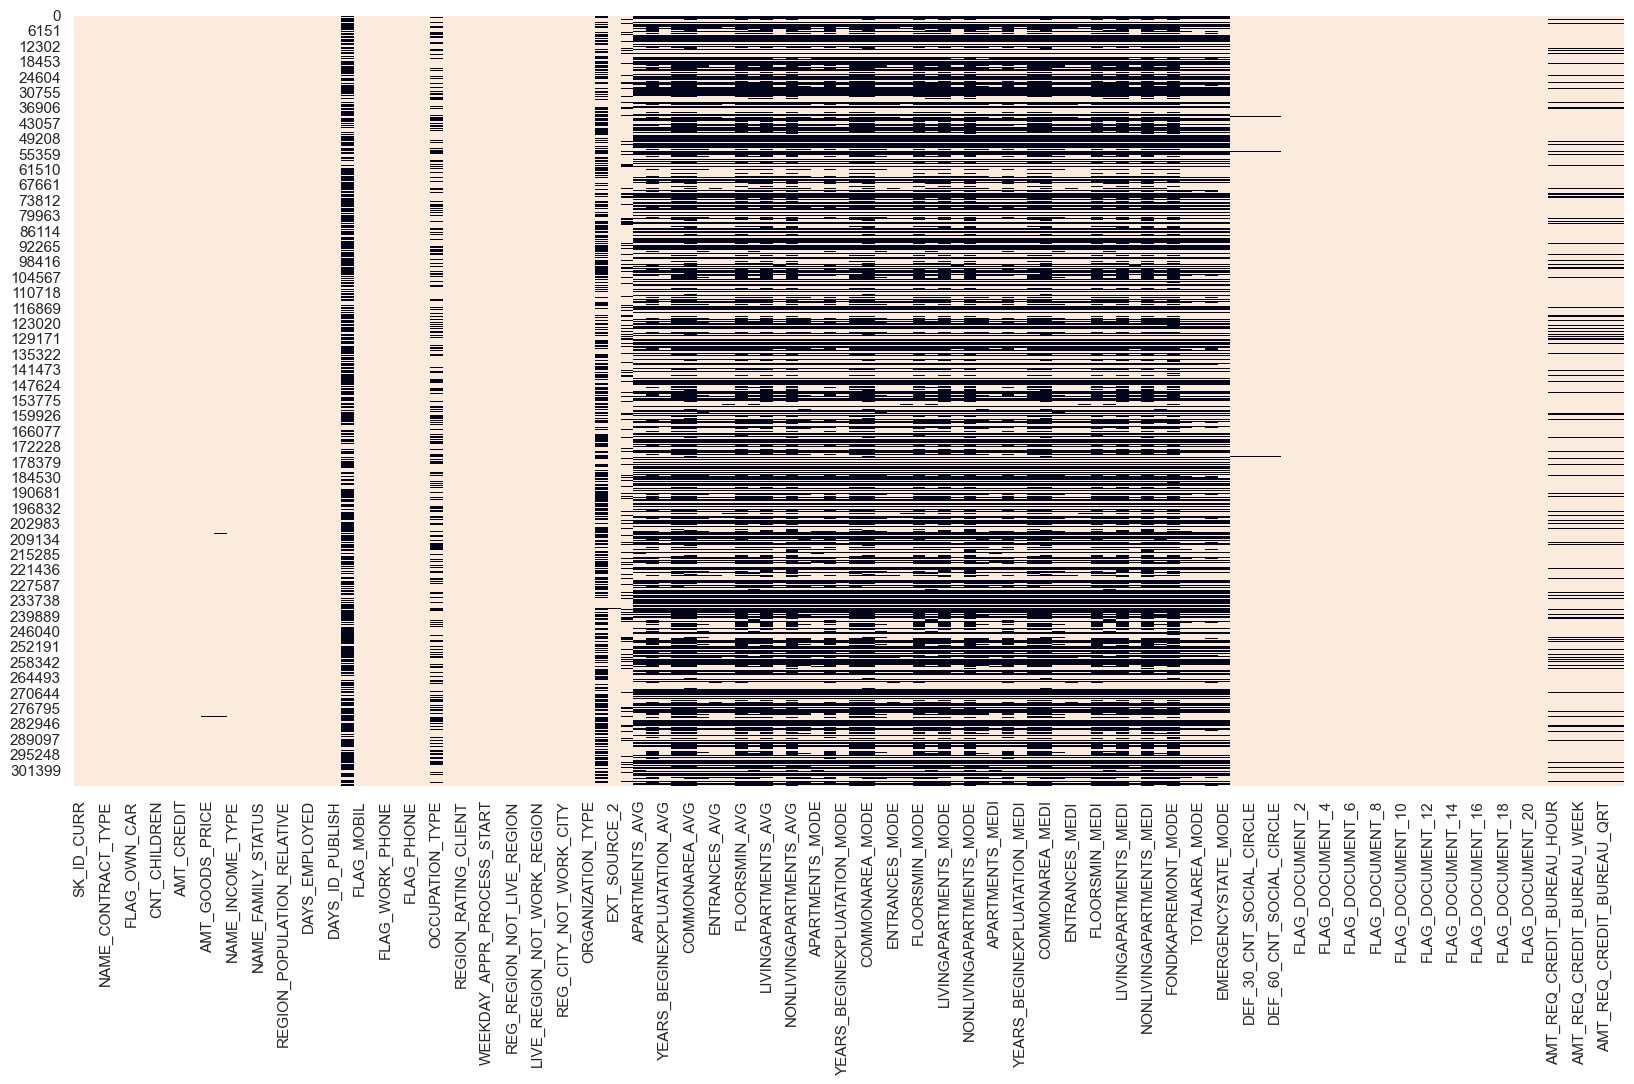

In [113]:
#Global view of the missing values (black)
plt.figure(figsize=(20,10))
sns.heatmap(train.notna(), cbar=False)
plt.show()

In [114]:
def nan_check(data):
    '''Check Missing Values'''
    total = data.isnull().sum()
    percent_1 = data.isnull().mean()*100
    percent_2 = (np.round(percent_1, 2))
    missing_data = pd.concat([total, percent_2],
                             axis=1, keys=['Total', '%']).sort_values('%', ascending=False)
    return missing_data

In [115]:
print('TOP 10 Missing values from Training dataset')
nan_check(train)[:10]

TOP 10 Missing values from Training dataset


Total      %
COMMONAREA_MEDI           214865  69.87
COMMONAREA_AVG            214865  69.87
COMMONAREA_MODE           214865  69.87
NONLIVINGAPARTMENTS_MODE  213514  69.43
NONLIVINGAPARTMENTS_AVG   213514  69.43
NONLIVINGAPARTMENTS_MEDI  213514  69.43
FONDKAPREMONT_MODE        210295  68.39
LIVINGAPARTMENTS_MODE     210199  68.35
LIVINGAPARTMENTS_AVG      210199  68.35
LIVINGAPARTMENTS_MEDI     210199  68.35

In [116]:
print("Nb of columns in the training sample: " + str(len(nan_check(train))))

print("Nb of columns in the training sample with missing values: " +
      str(len(nan_check(train)[nan_check(train)['Total']!=0])))

Nb of columns in the training sample: 122
Nb of columns in the training sample with missing values: 67


67 Colonnes avec des nan

In [117]:
print('TOP 10 Missing values from df dataset')
nan_check(df)[:10]

TOP 10 Missing values from df dataset


Total      %
REFUSED_AMT_DOWN_PAYMENT_MIN     303648  85.23
REFUSED_RATE_DOWN_PAYMENT_MIN    303648  85.23
REFUSED_RATE_DOWN_PAYMENT_MEAN   303648  85.23
REFUSED_AMT_DOWN_PAYMENT_MEAN    303648  85.23
REFUSED_RATE_DOWN_PAYMENT_MAX    303648  85.23
REFUSED_AMT_DOWN_PAYMENT_MAX     303648  85.23
REFUSED_APP_CREDIT_PERC_VAR      298034  83.66
CC_AMT_PAYMENT_CURRENT_VAR       284649  79.90
CC_AMT_DRAWINGS_ATM_CURRENT_VAR  284559  79.88
CC_CNT_DRAWINGS_POS_CURRENT_VAR  284559  79.88

### | Fonctions pour faciliter l'analyse des principales variables…

In [120]:
def plot_stat(data, feature, title) :

    ax, fig = plt.subplots(figsize=(20,8))
    ax = sns.countplot(y=feature, data=data, order=data[feature].value_counts(ascending=False).index)
    ax.set_title(title)

    for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_width()/len(data[feature]))
                x = p.get_x() + p.get_width()
                y = p.get_y() + p.get_height()/2
                ax.annotate(percentage, (x, y), fontsize=20, fontweight='bold')

    plt.show()

In [121]:
def plot_percent_target1(data, feature, title) :

    cat_perc = data[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)

    ax, fig = plt.subplots(figsize=(20,8))
    ax = sns.barplot(y=feature, x='TARGET', data=cat_perc)
    ax.set_title(title)
    ax.set_xlabel("")
    ax.set_ylabel("Percent of target with value 1")

    for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_width())
                x = p.get_x() + p.get_width()
                y = p.get_y() + p.get_height()/2
                ax.annotate(percentage, (x, y), fontsize=20, fontweight='bold')

    plt.show()

### | Target 1 vs 0

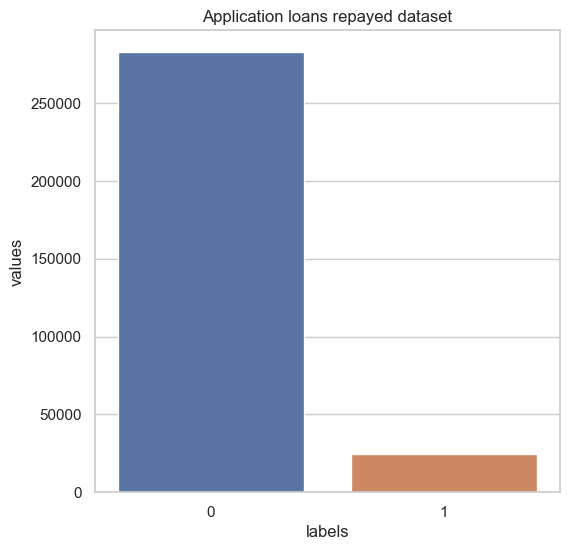

In [122]:
temp = train["TARGET"].value_counts()
df0 = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('Application loans repayed dataset')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df0)
plt.show()

***Type de prêt***


Voyons le type de prêts contractés et aussi, sur un graphique séparé, le pourcentage de prêts (par type de prêt) avec la valeur TARGET 1 (prêt non retourné).

In [123]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)

    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)

    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)

    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)

    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

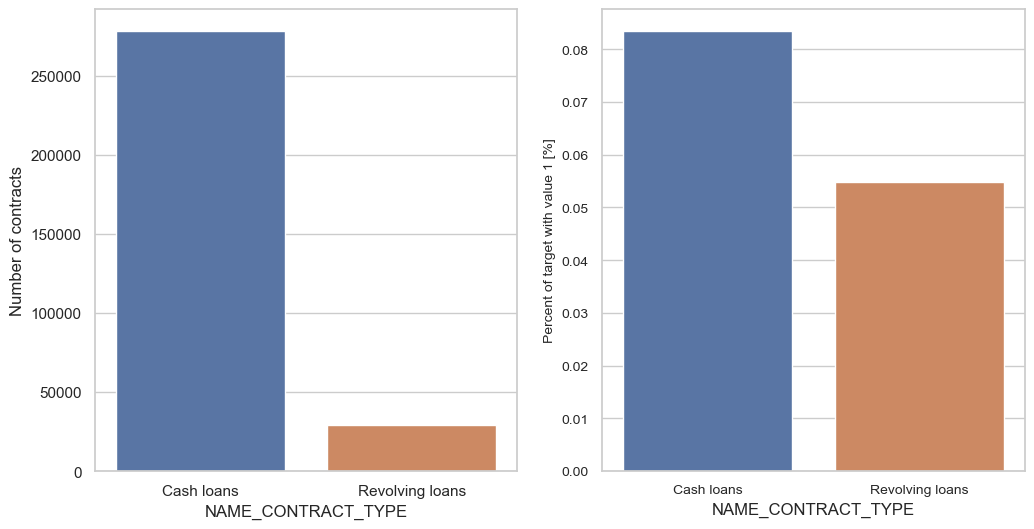

In [124]:
plot_stats('NAME_CONTRACT_TYPE')

Les prêts renouvelables de type contractuel ne représentent qu'une petite fraction du nombre total de prêts ; dans le même temps, un montant plus important de prêts renouvelables, par rapport à leur fréquence, n'est pas remboursé.

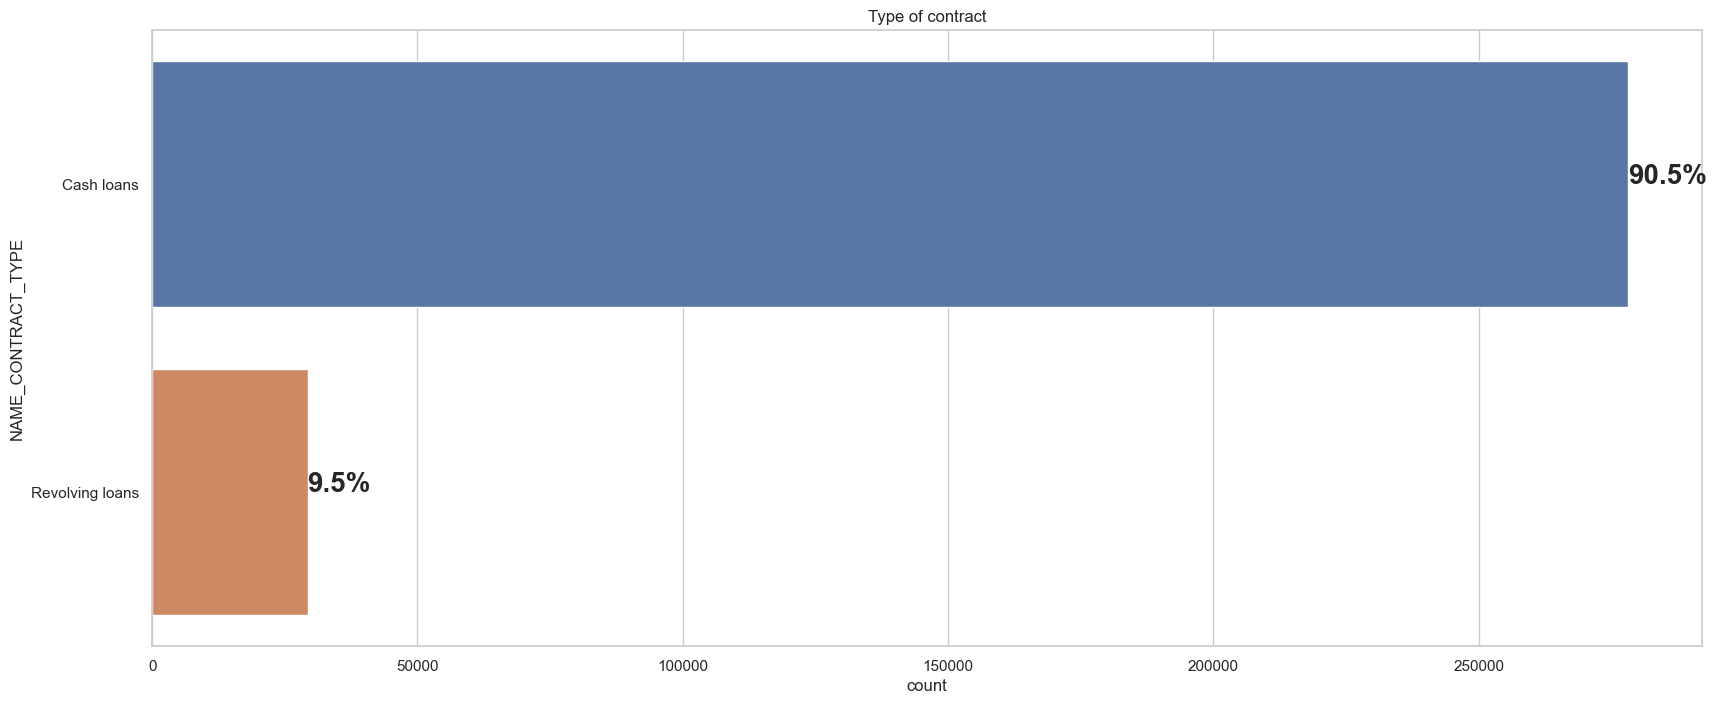

                                   -------------------------------------------------------


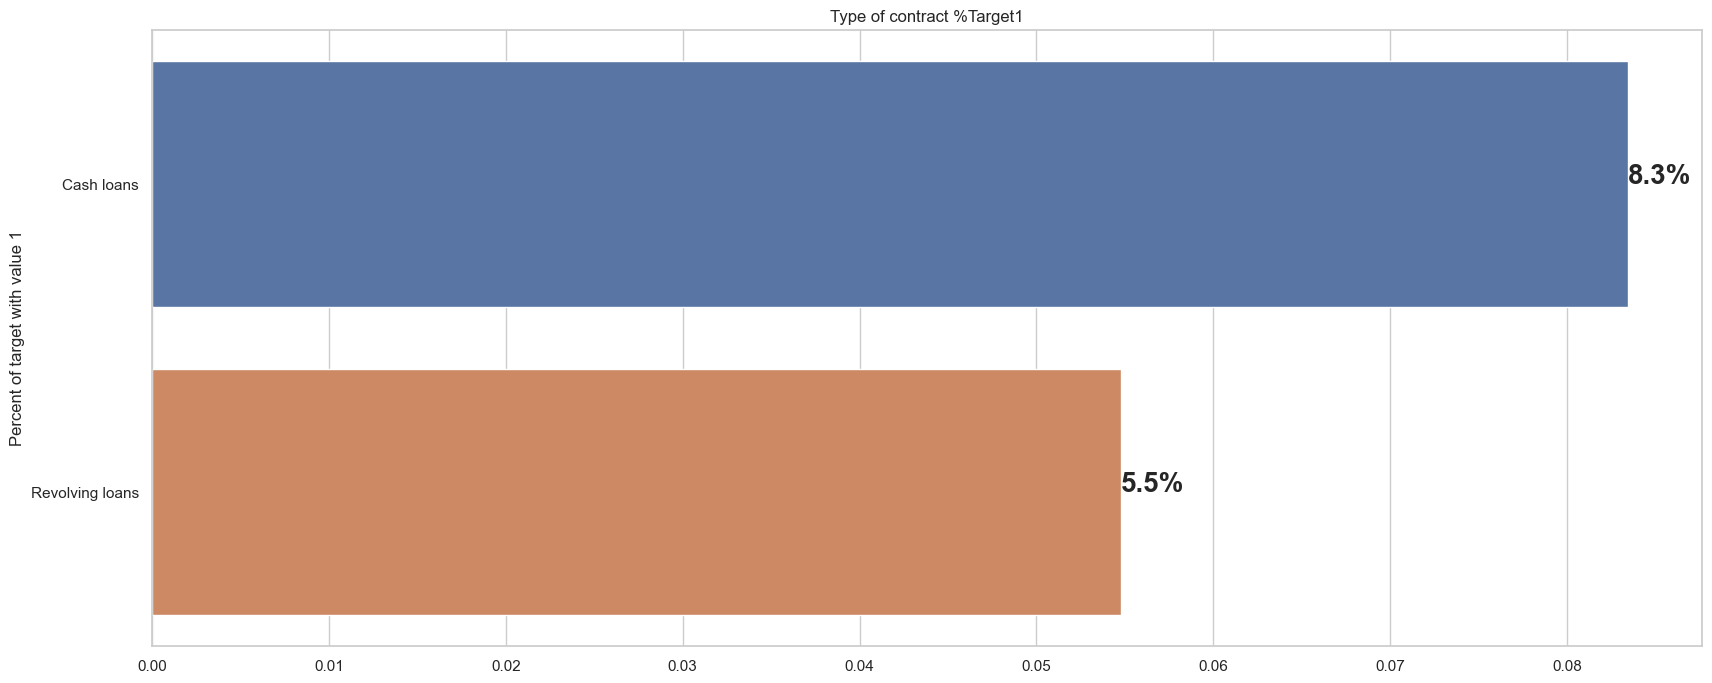

In [125]:
#NAME_CONTRACT_TYPE
plot_stat(train, 'NAME_CONTRACT_TYPE',"Type of contract")
print("                                   -------------------------------------------------------")
plot_percent_target1(train, 'NAME_CONTRACT_TYPE',"Type of contract %Target1")

### | Client gender

Voyons le sexe des clients et aussi, sur un graphique séparé, le pourcentage des prêts (par sexe du client) avec la valeur **TARGET** 1 (prêt non retourné).

In [126]:
train.CODE_GENDER.unique()

array(['M', 'F', 'XNA'], dtype=object)

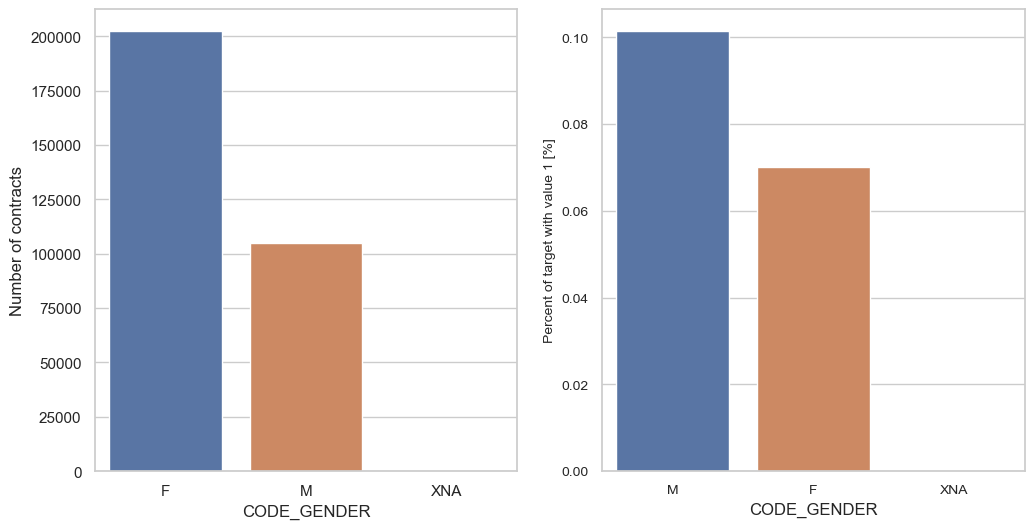

In [127]:
plot_stats('CODE_GENDER')

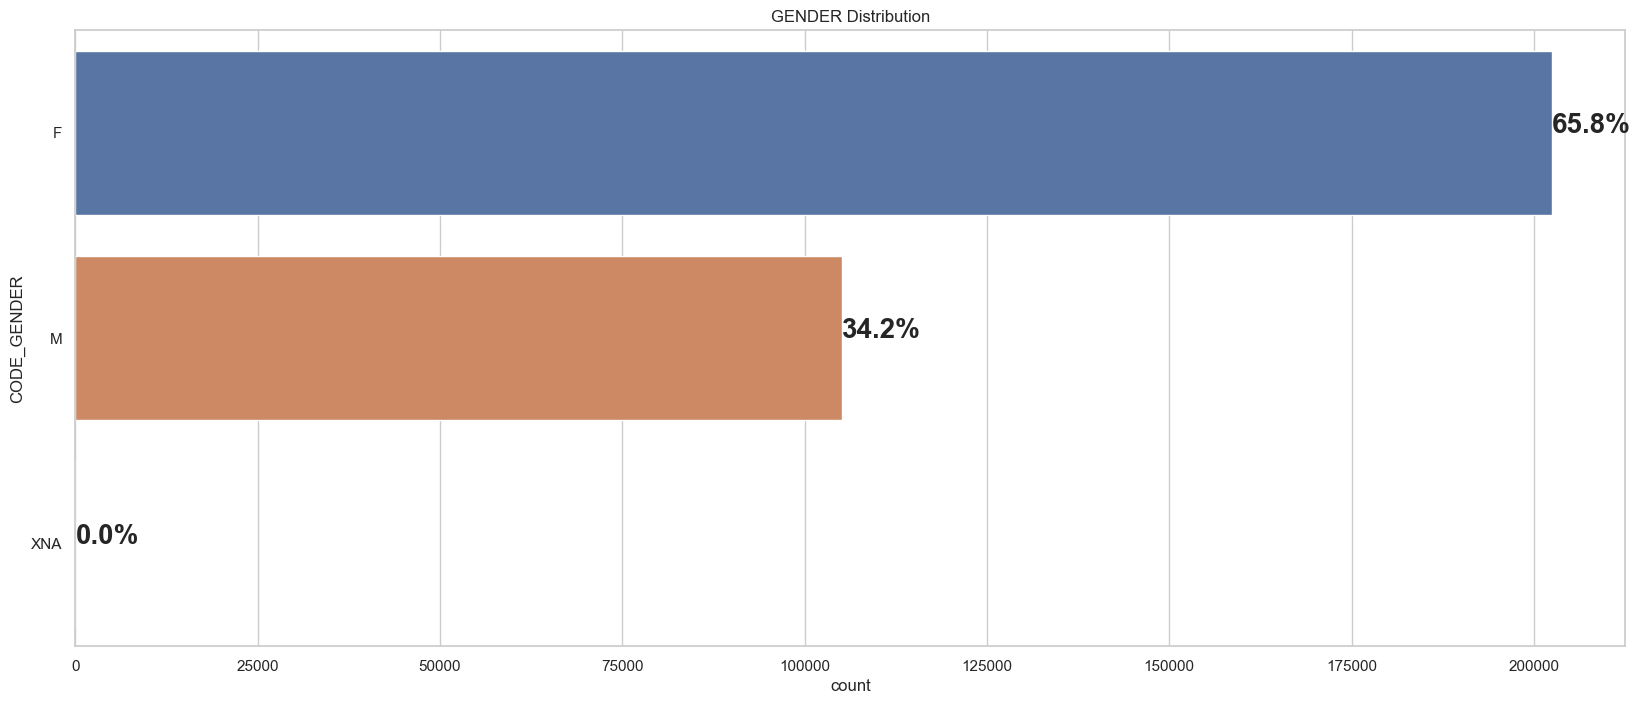

                                   -------------------------------------------------------


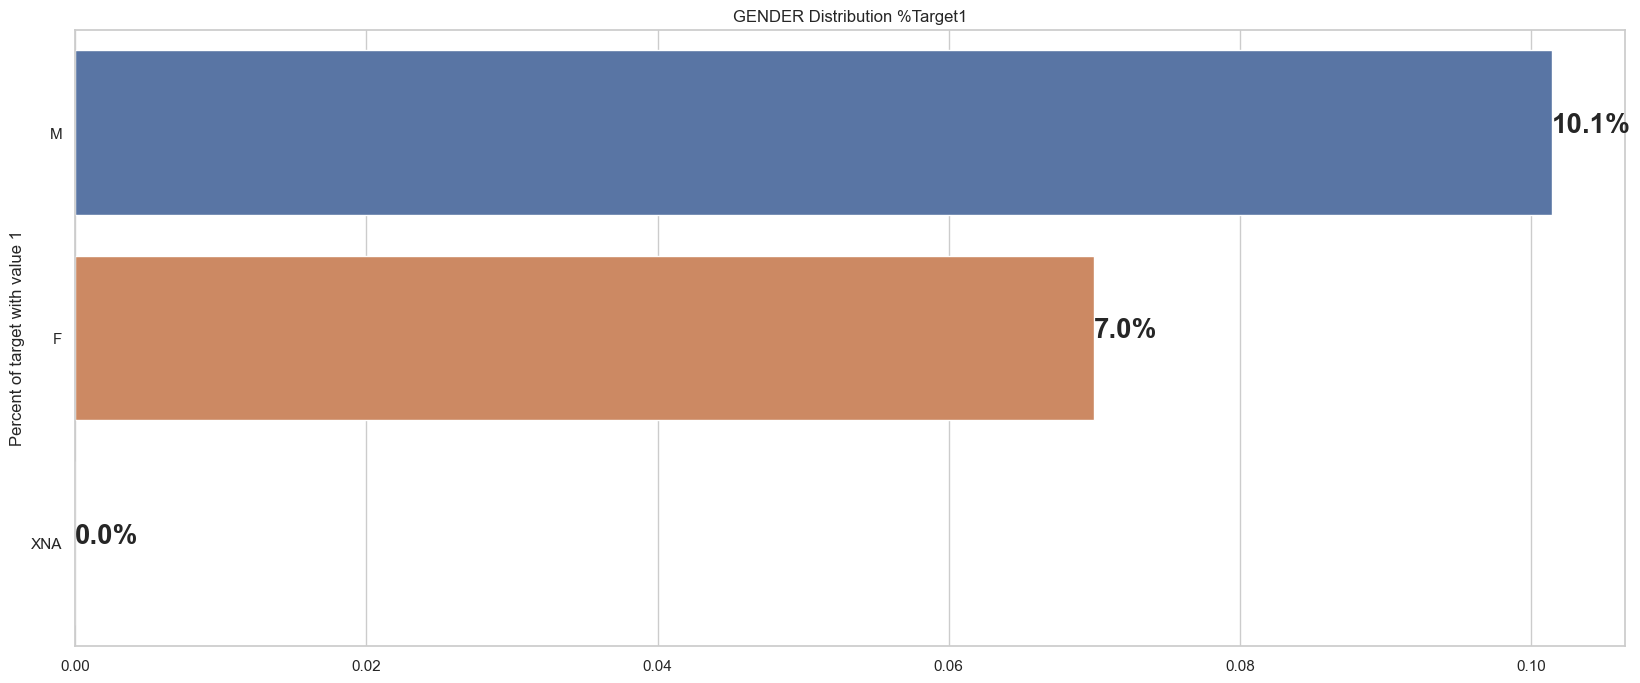

In [128]:
#CODE_GENDER
plot_stat(train, 'CODE_GENDER',"GENDER Distribution")
print("                                   -------------------------------------------------------")
plot_percent_target1(train, 'CODE_GENDER',"GENDER Distribution %Target1")

Le nombre de clientes est presque deux fois plus élevé que celui des hommes. Si l'on considère le pourcentage de crédits non remboursés, les hommes ont plus de chances de ne pas rembourser leurs prêts.

### | Flag own car and flag own real estate

Examinons les indicateurs qui nous disent si un client possède une voiture ou un bien immobilier et, sur des graphiques distincts, le pourcentage de la valeur des prêts de ces indicateurs) avec la valeur **TARGET** 1 (prêt non retourné).

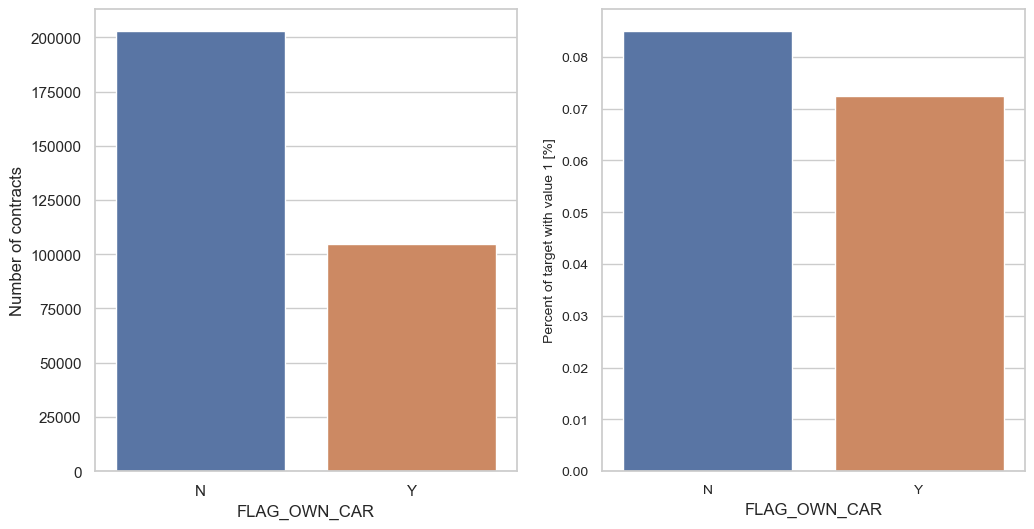

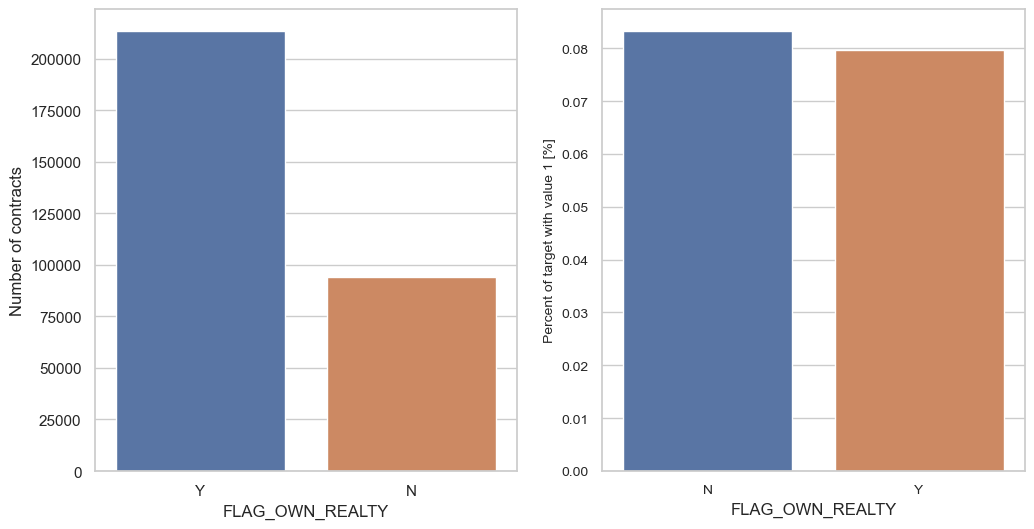

In [129]:
plot_stats('FLAG_OWN_CAR')
plot_stats('FLAG_OWN_REALTY')

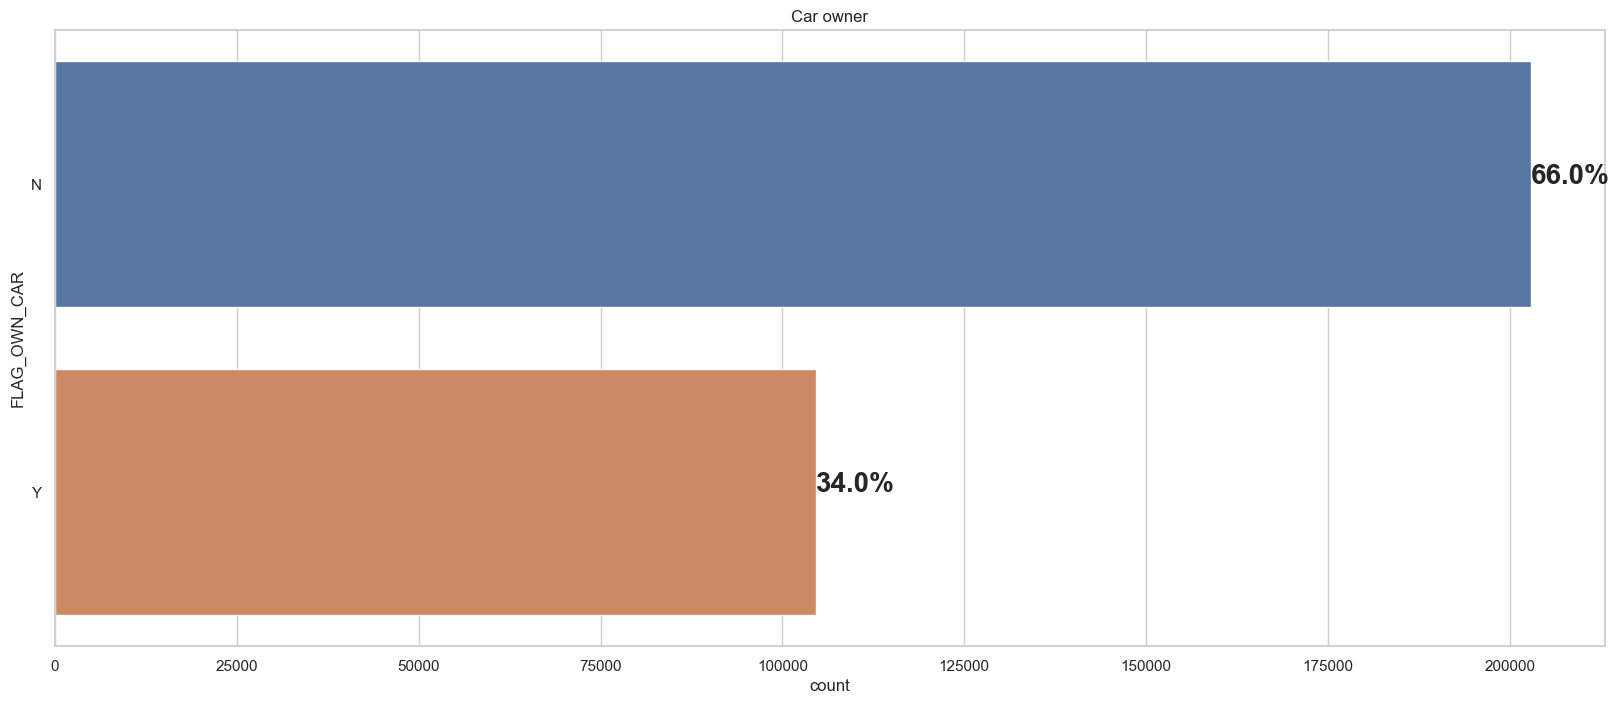

                                   -------------------------------------------------------


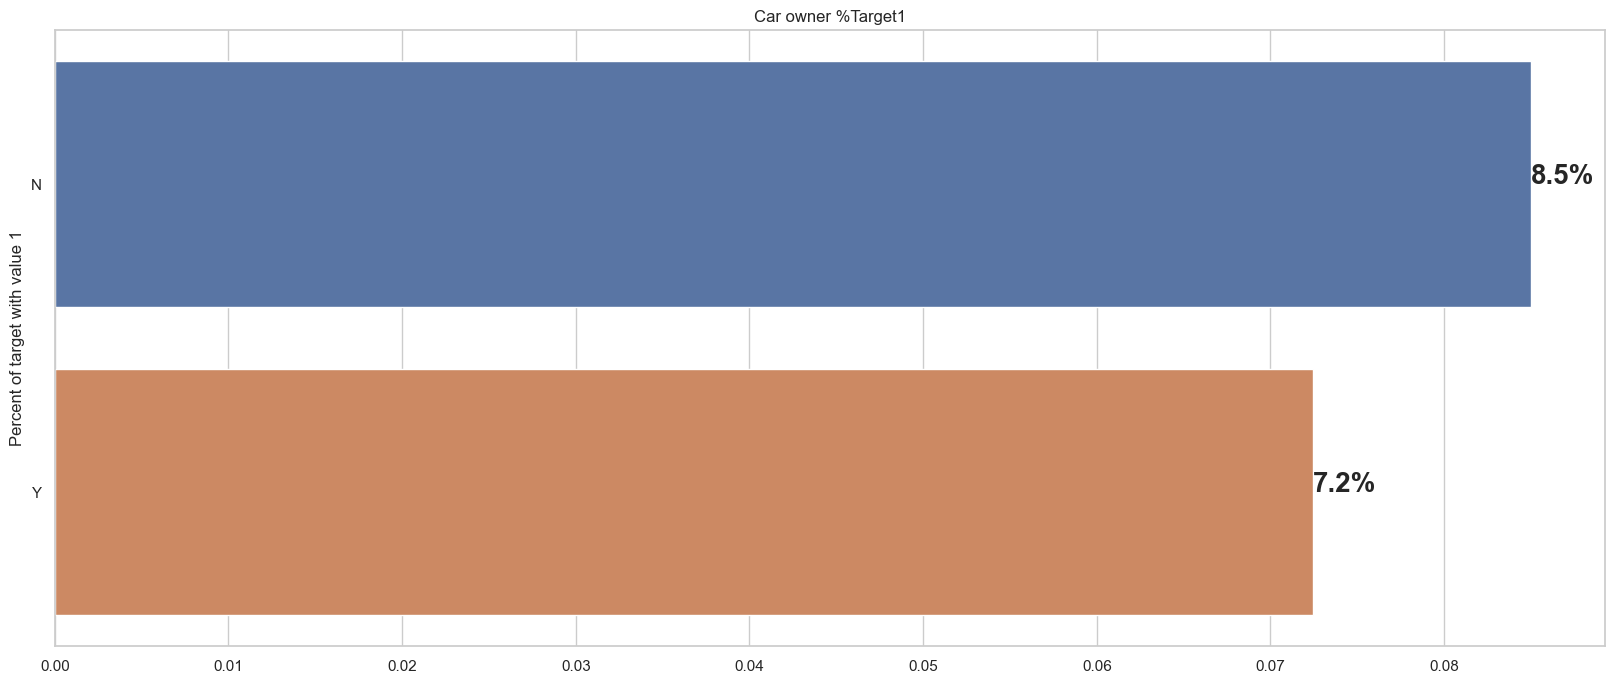

In [130]:

#FLAG_OWN_CAR
plot_stat(train, 'FLAG_OWN_CAR',"Car owner")
print("                                   -------------------------------------------------------")
plot_percent_target1(train, 'FLAG_OWN_CAR',"Car owner %Target1")

Les clients qui possèdent une voiture sont près de la moitié de ceux qui n'en possèdent pas. Les deux catégories ont des taux de non-remboursement d'environ 8%.

Les clients qui possèdent un bien immobilier sont plus du double de ceux qui n'en possèdent pas. Les deux catégories (propriétaires ou non propriétaires) ont des taux de non-remboursement de l'ordre de 8%.

### | **Client accompanied by**

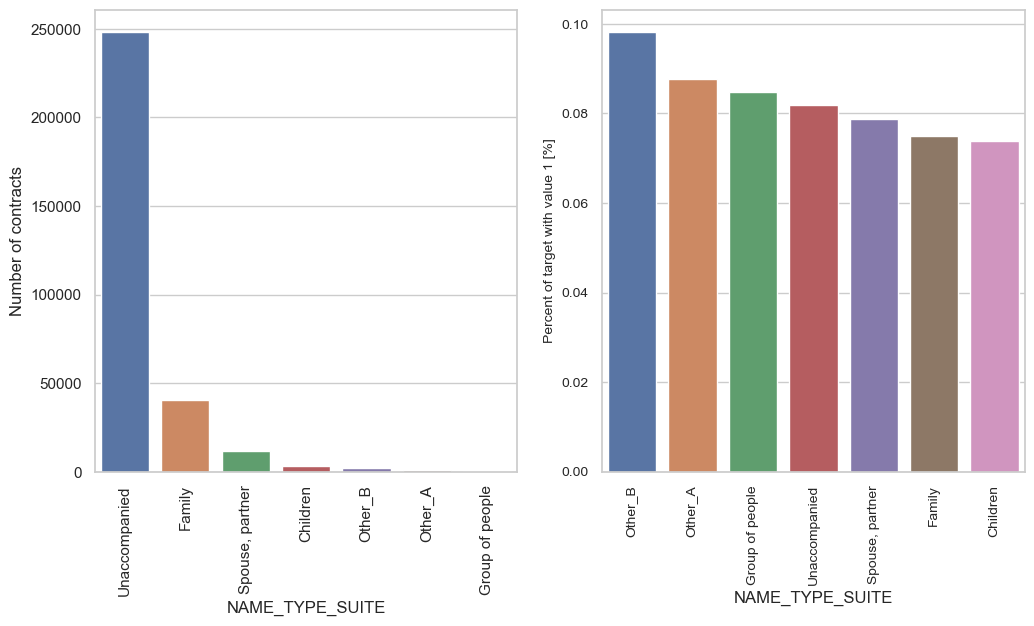

In [131]:
plot_stats('NAME_TYPE_SUITE',True, True)

La plupart des clients ne sont pas accompagnés lorsqu'ils demandent un prêt. En termes de pourcentage de non-remboursement du prêt, les clients accompagnés par Other_B et Other_A sont moins susceptibles de rembourser.

### | **Family status of client**

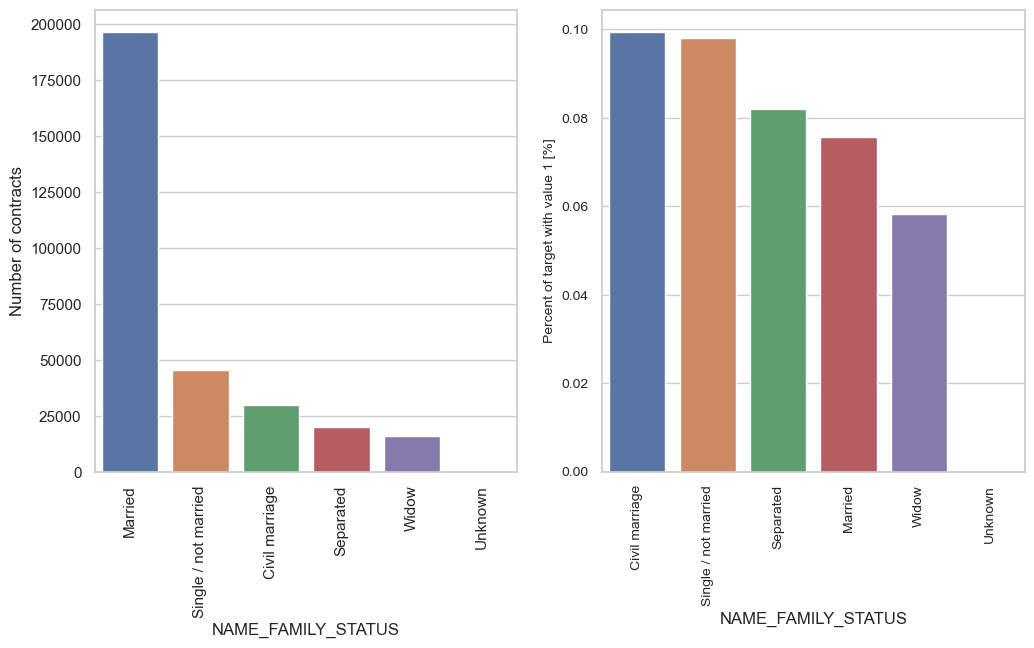

In [132]:
plot_stats('NAME_FAMILY_STATUS',True, True)

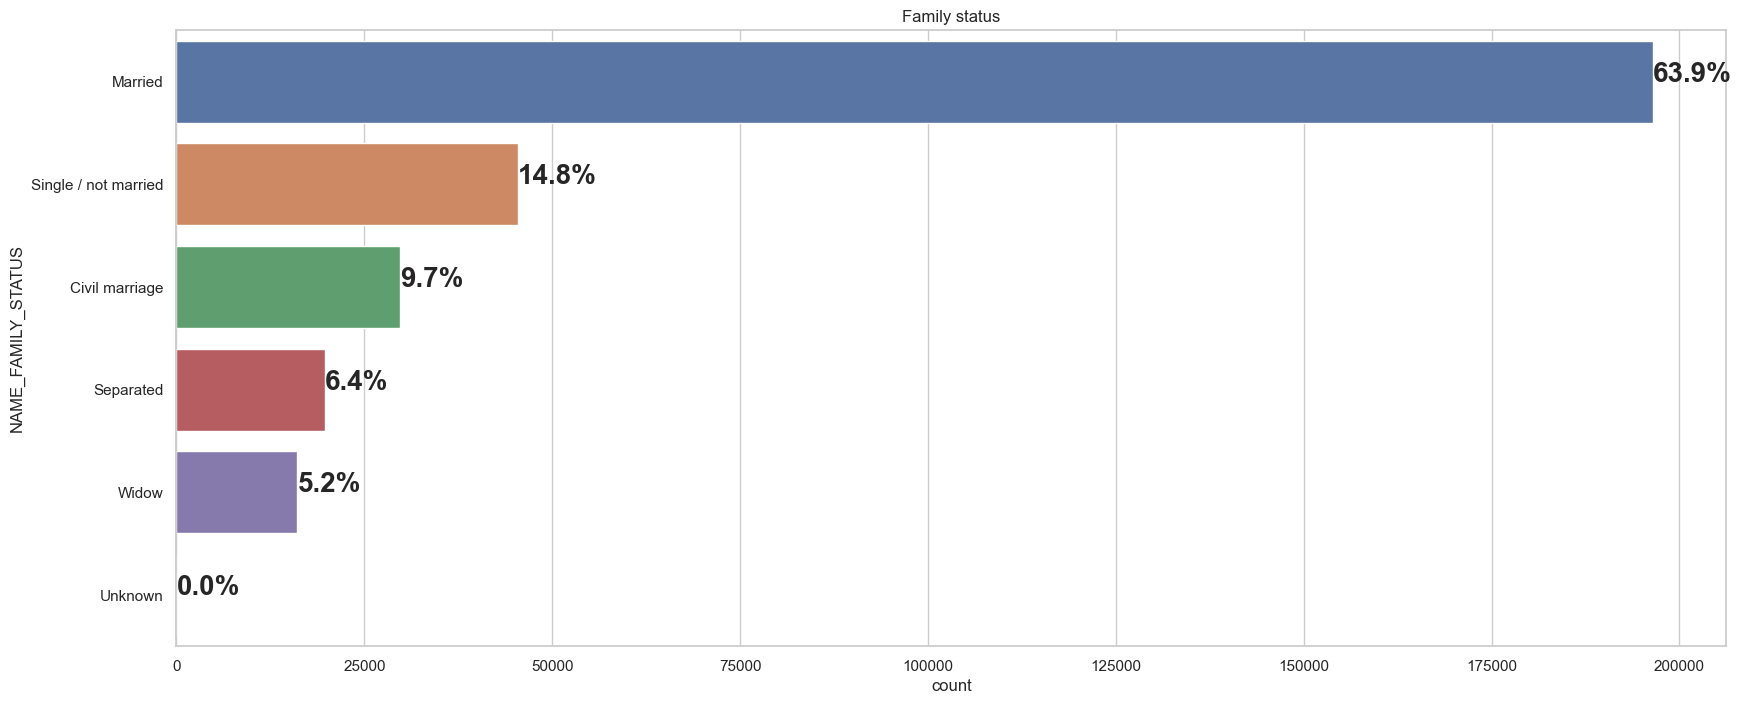

                                   -------------------------------------------------------


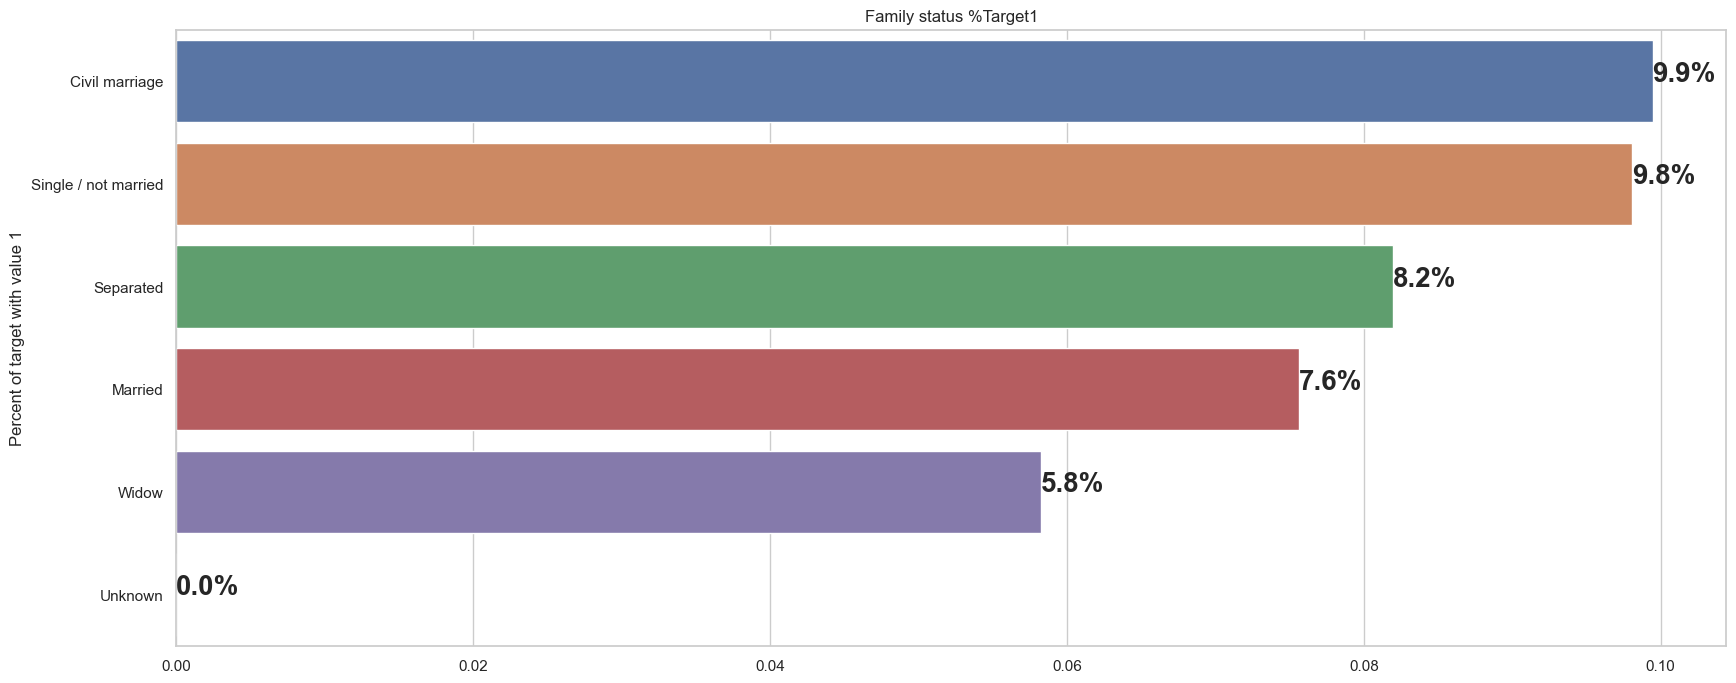

In [133]:

#NAME_FAMILY_STATUS
plot_stat(train, 'NAME_FAMILY_STATUS',"Family status")
print("                                   -------------------------------------------------------")
plot_percent_target1(train, 'NAME_FAMILY_STATUS',"Family status %Target1")

La plupart des clientes sont mariées, suivies par les célibataires/non mariées et les mariages civils.

En termes de pourcentage de non-remboursement, c'est le mariage civil qui présente le pourcentage de non-remboursement le plus élevé (10 %), et le veuvage le plus faible (l'exception étant Inconnu).

### | Number of children

Voyons quelle est la distribution du nombre d'enfants des clients.

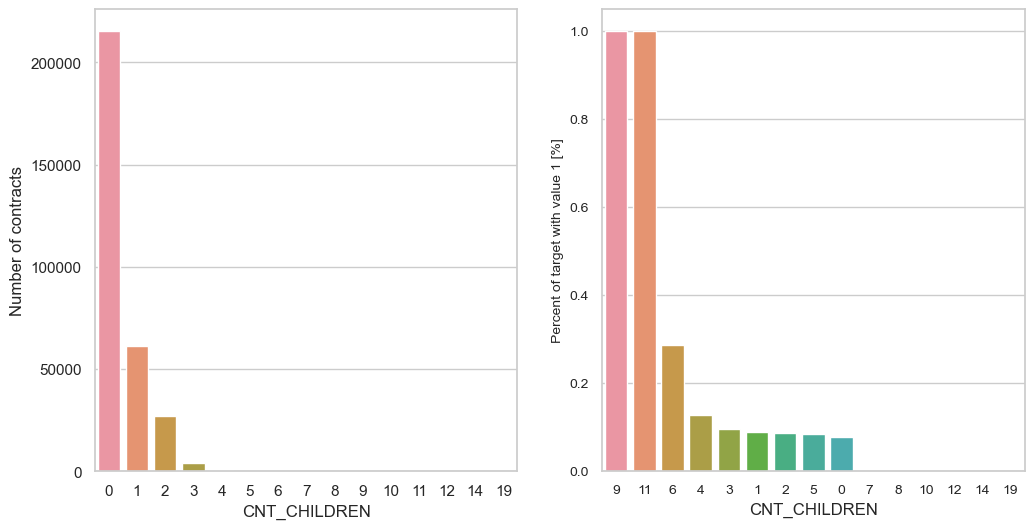

In [134]:
plot_stats('CNT_CHILDREN')

La plupart des clients qui contractent un prêt n'ont pas d'enfants. Le nombre de prêts associés aux clients ayant un enfant est 4 fois plus petit, le nombre de prêts associés aux clients ayant deux enfants est 8 fois plus petit ; les clients ayant 3, 4 ou plus d'enfants sont beaucoup plus rares.

En ce qui concerne le remboursement, les clients sans enfant, avec 1, 2, 3 et 5 enfants ont un pourcentage de non-remboursement proche de la moyenne (10%). Les clients avec 4 et 6 enfants sont au-dessus de la moyenne en termes de pourcentage de prêts non remboursés (plus de 25% pour les familles avec 6 enfants).

### | **Number of family members of client**

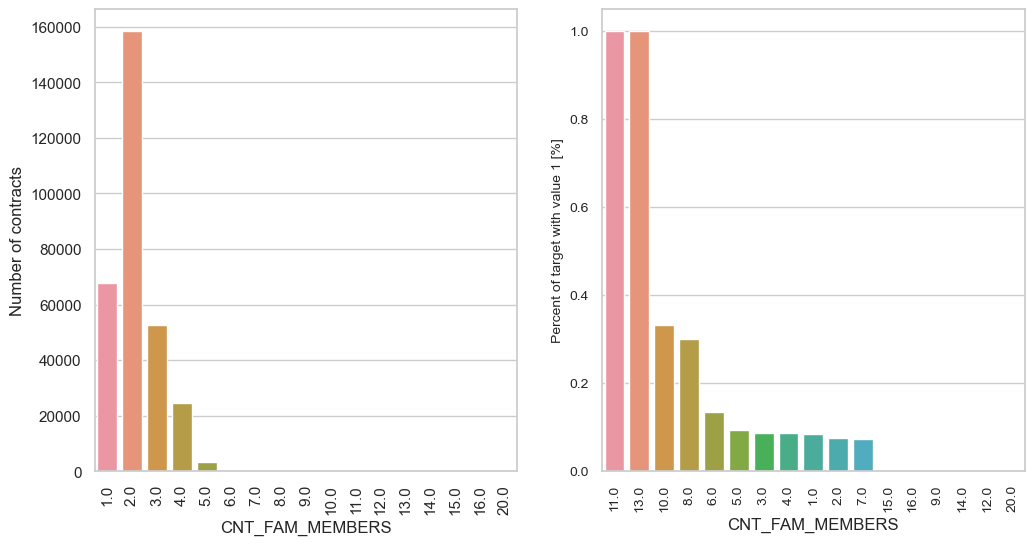

In [135]:
plot_stats('CNT_FAM_MEMBERS',True)

Les clients dont les membres de la famille sont au nombre de 2 sont les plus nombreux, suivis par 1 (personnes seules), 3 (familles avec un enfant) et 4.

Les clients dont la famille compte 11 et 13 membres ont un taux de non-remboursement de 100 %. D'autres familles de 10 ou 8 membres ont un pourcentage de non-remboursement des prêts supérieur à 30 %. Les familles de 6 membres ou moins ont des taux de remboursement proches de la moyenne de 10 %.

### | Income type of client

Let's investigate the numbers of clients with different income type. As well, let's see the percent of not returned loans per income type of applicants.

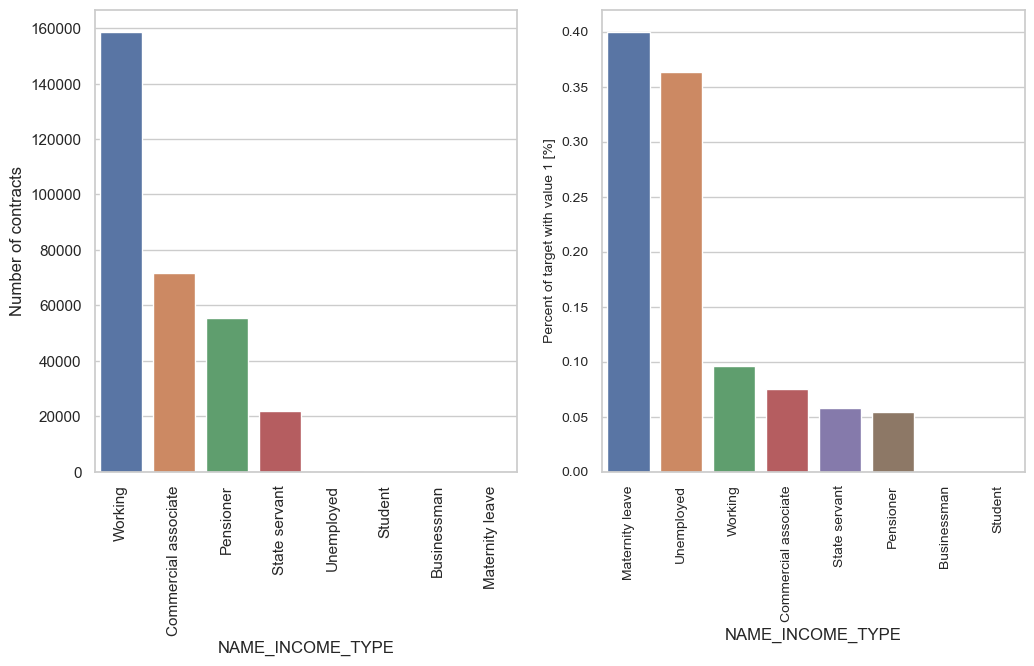

In [136]:
plot_stats('NAME_INCOME_TYPE',True,True)

La plupart des demandeurs de prêts ont des revenus de travail, suivis par les associés commerciaux, les retraités et les fonctionnaires.

Les demandeurs dont les revenus proviennent d'un congé de maternité ont un taux de non-retour de près de 40 %, suivis par les chômeurs (37 %). Les autres types de revenus sont en dessous de la moyenne de 10% de non-retour de prêts.

### | Occupation of client

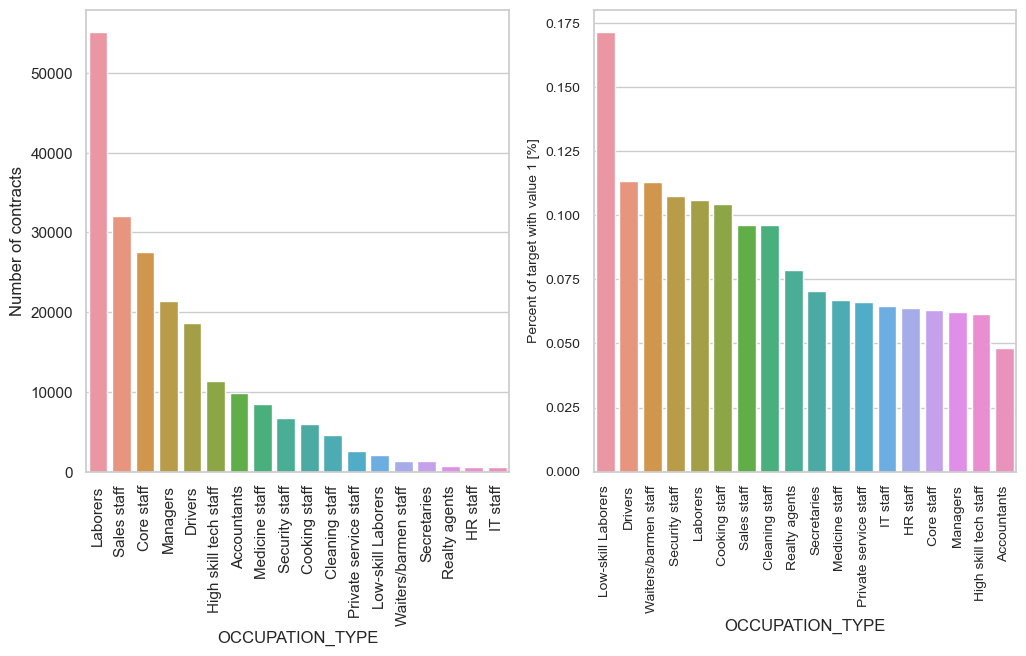

In [137]:
plot_stats('OCCUPATION_TYPE',True, True)

La plupart des prêts sont contractés par les ouvriers, suivis par les vendeurs. Le personnel informatique est celui qui a contracté le moins de prêts.

La catégorie présentant le pourcentage le plus élevé de prêts non remboursés est celle des ouvriers peu qualifiés (plus de 17 %), suivie par les chauffeurs et les serveurs/barmen, le personnel de sécurité, les ouvriers et le personnel de cuisine.

### | Organization type

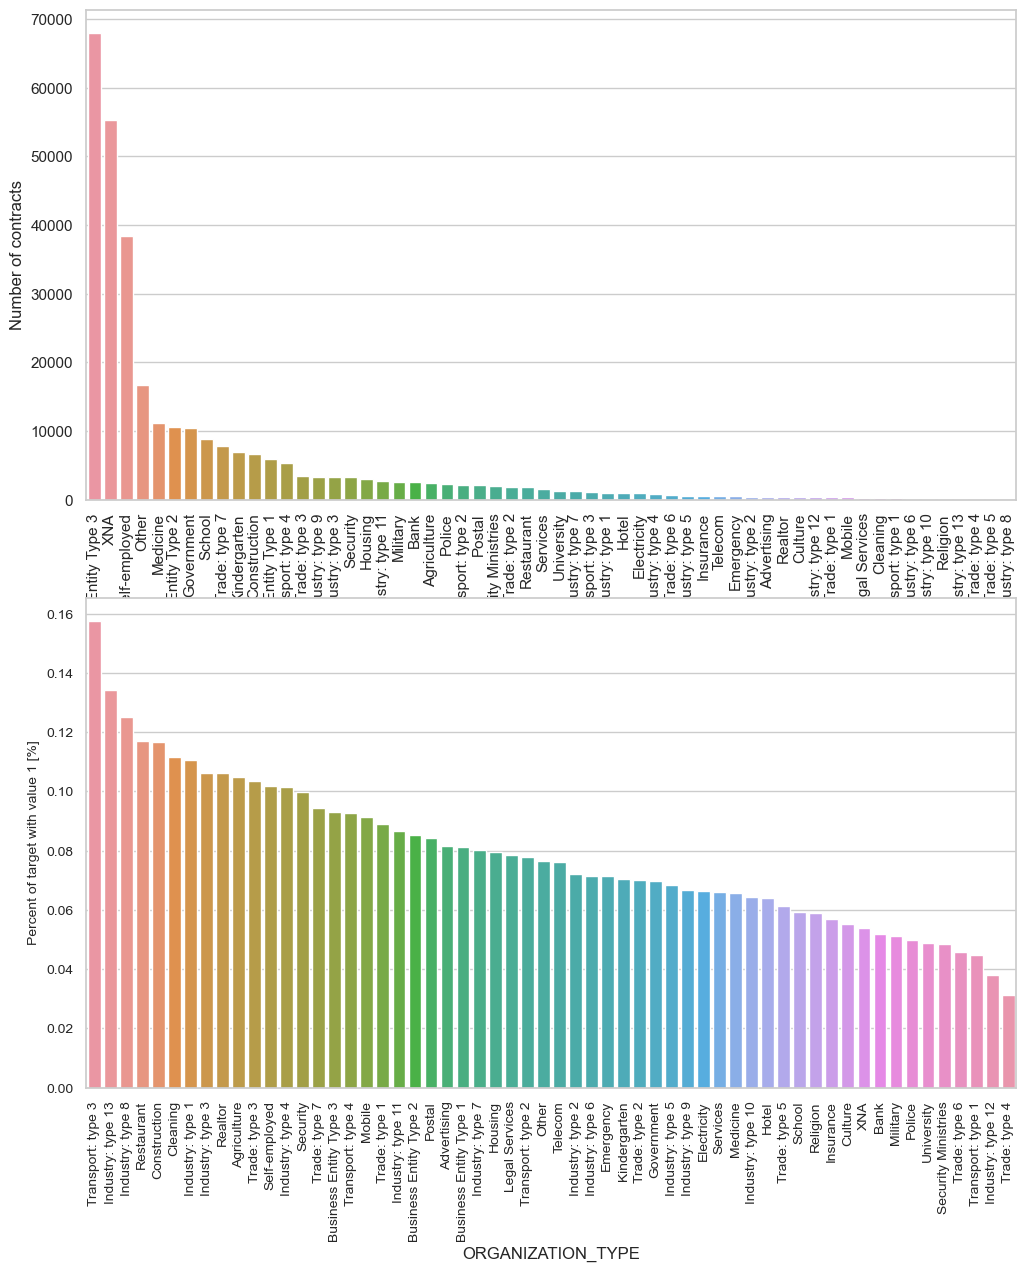

In [138]:
plot_stats('ORGANIZATION_TYPE',True, False)

Les organisations ayant le pourcentage le plus élevé de prêts non remboursés sont Transport : type 3 (16%), Industrie : type 13 (13,5%), Industrie : type 8 (12,5%) et Restaurant (moins de 12%).

### | Education type of the client

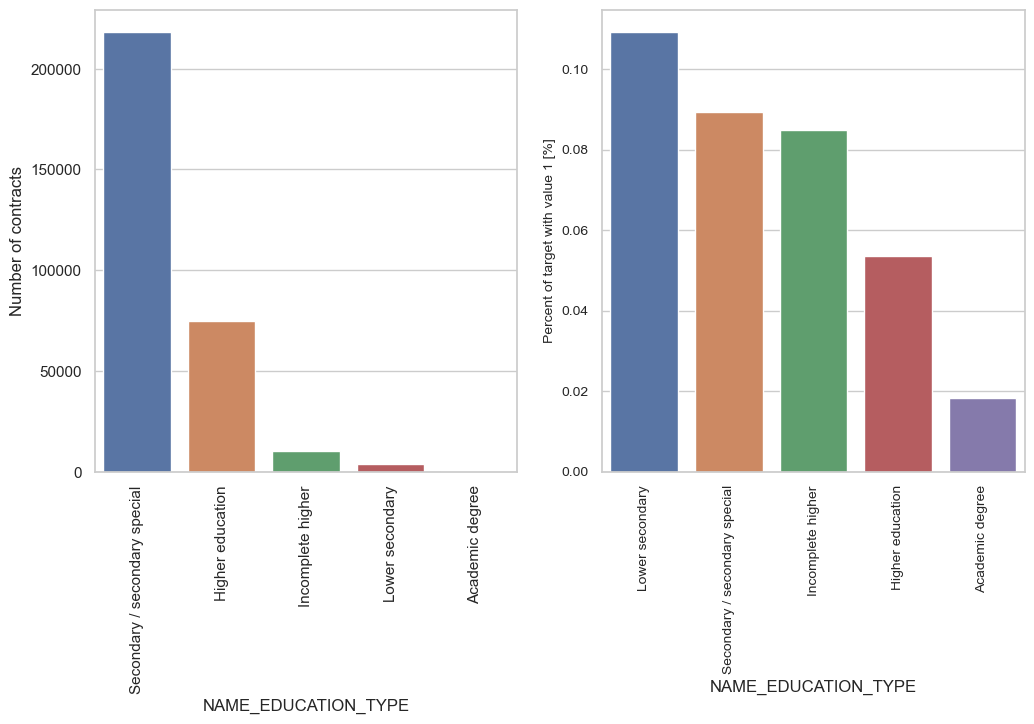

In [139]:
plot_stats('NAME_EDUCATION_TYPE',True)

La majorité des clients ont un niveau d'éducation secondaire / secondaire spécialisé, suivi par les clients ayant un niveau d'éducation supérieur. Seul un très petit nombre d'entre eux ont un diplôme universitaire.

Les personnes de la catégorie secondaire inférieure, bien que rares, ont le taux le plus élevé de non-remboursement du prêt (11 %). Les personnes titulaires d'un diplôme universitaire ont un taux de non-remboursement inférieur à 2 %.

### | Type of the housing of client

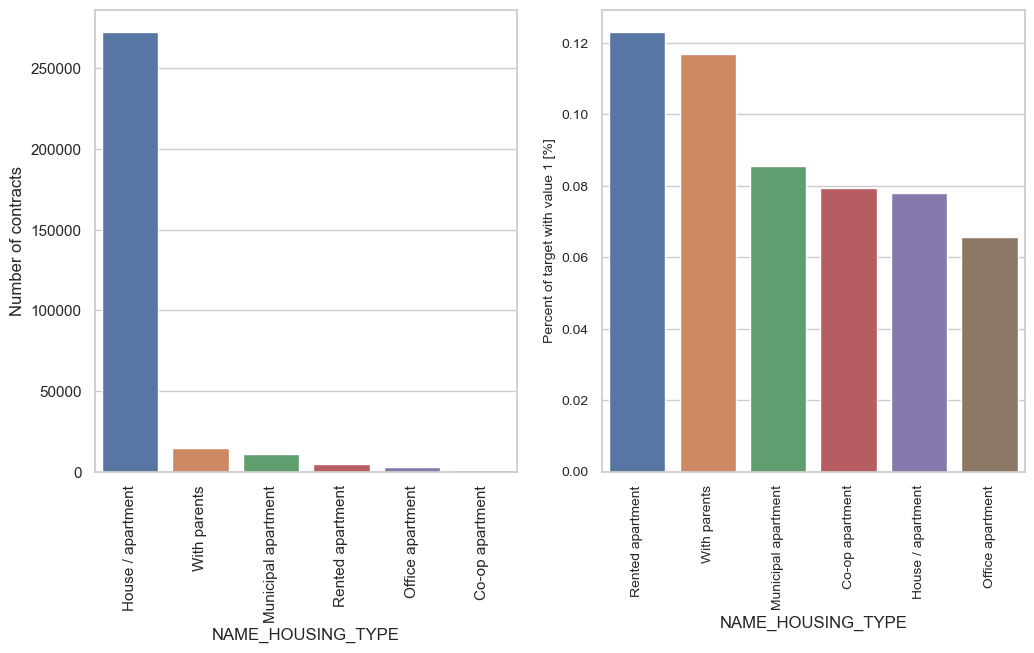

In [140]:
plot_stats('NAME_HOUSING_TYPE',True)

Plus de 250 000 demandeurs de crédits ont enregistré leur logement en tant que maison/appartement. Les catégories suivantes comptent un très petit nombre de clients (Chez les parents, Appartement municipal).

Parmi ces catégories, l'appartement loué et l'appartement chez les parents ont un taux de non-remboursement supérieur à 10 %.

### | Total income distribution

Let's plot the distribution of total income for the clients.

In [141]:
# Plot distribution of one feature
def plot_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(train[feature].dropna(),color=color, kde=True,bins=100)
    plt.show()

In [142]:
# Plot distribution of multiple features, with TARGET = 1/0 on the same graph
def plot_distribution_comp(var,nrow=2):

    i = 0
    t1 = train.loc[train['TARGET'] != 0]
    t0 = train.loc[train['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
        plt.legend(loc='best')
    plt.show();

In [143]:
train['AMT_INCOME_TOTAL'].min(),train['AMT_INCOME_TOTAL'].max()

(25650.0, 117000000.0)

C:\Users\YOUSSEFBOUHLEL\AppData\Local\Temp\ipykernel_34988\1899453524.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[feature].dropna(),color=color, kde=True,bins=100)


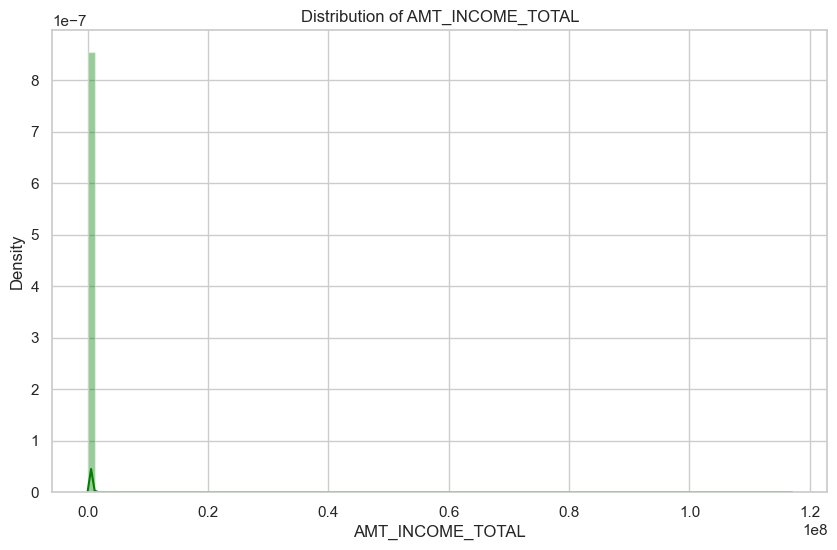

In [144]:
plot_distribution('AMT_INCOME_TOTAL','green')

Les valeurs de revenu sont très élevées pour certaines observations, c'est pourquoi le graphique apparaît ainsi. Comme nous faisons de la détection d'anomalies, nous ne les supprimerons pas.

### | Credit distribution

Let's plot the credit distribution.

C:\Users\YOUSSEFBOUHLEL\AppData\Local\Temp\ipykernel_34988\1899453524.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[feature].dropna(),color=color, kde=True,bins=100)


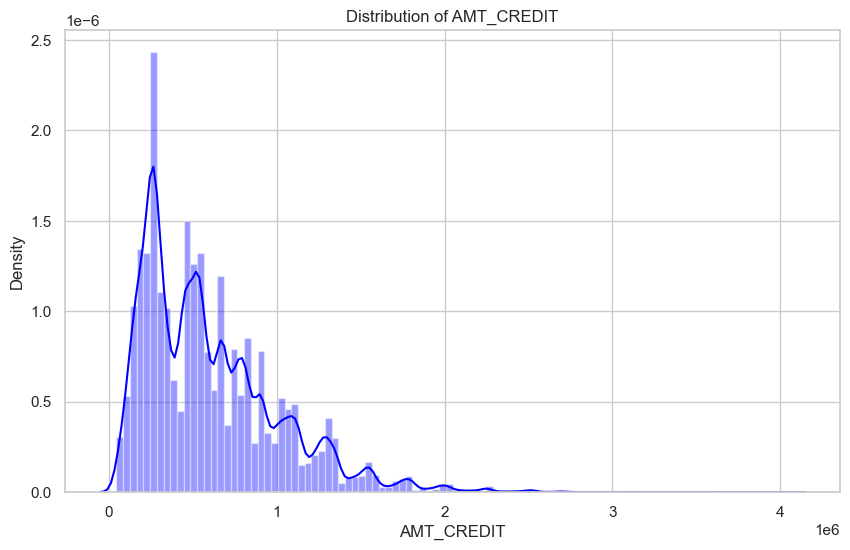

In [145]:
plot_distribution('AMT_CREDIT','blue')

In [146]:
#Plot distribution of one feature
def plot_distribution(feature, title):
    plt.figure(figsize=(20,6))

    t0 = train.loc[train['TARGET'] == 0]
    t1 = train.loc[train['TARGET'] == 1]


    sns.kdeplot(t0[feature].dropna(), color='blue', label="TARGET = 0")
    sns.kdeplot(t1[feature].dropna(), color='red', label="TARGET = 1")
    plt.title(title)
    plt.ylabel('')
    plt.legend()
    plt.show()

In [147]:
train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], dtype='object', length=122)

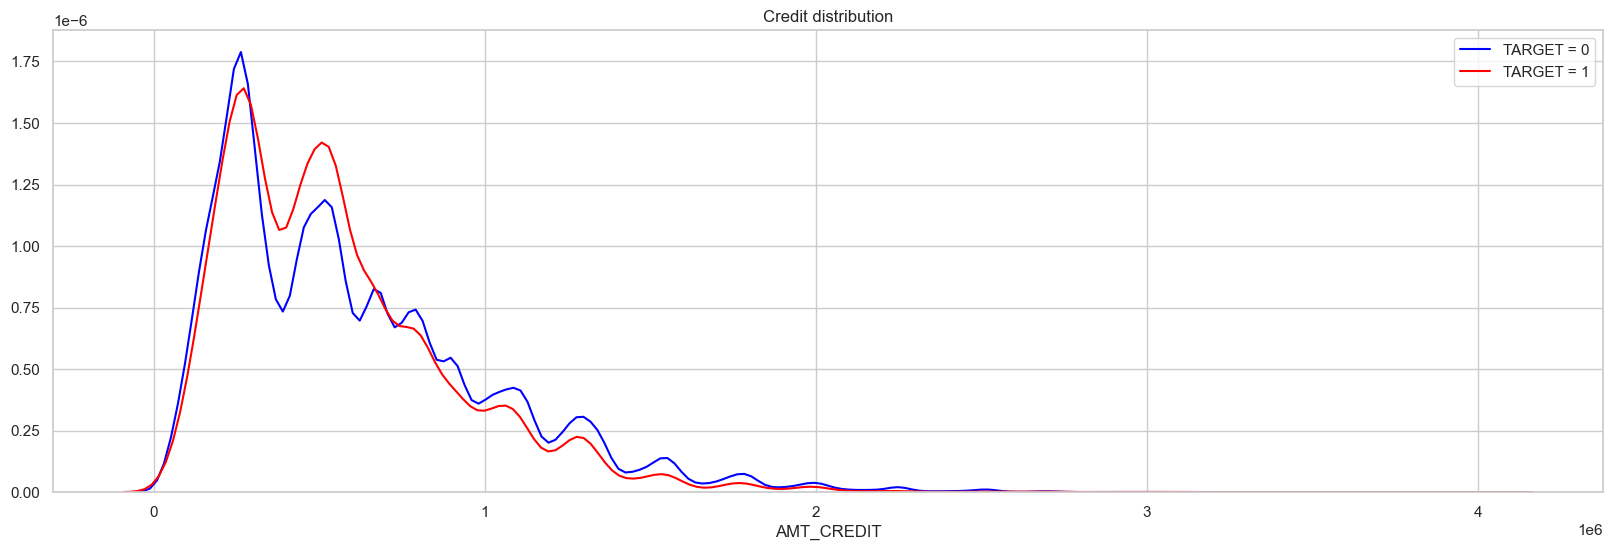

                                   -------------------------------------------------------


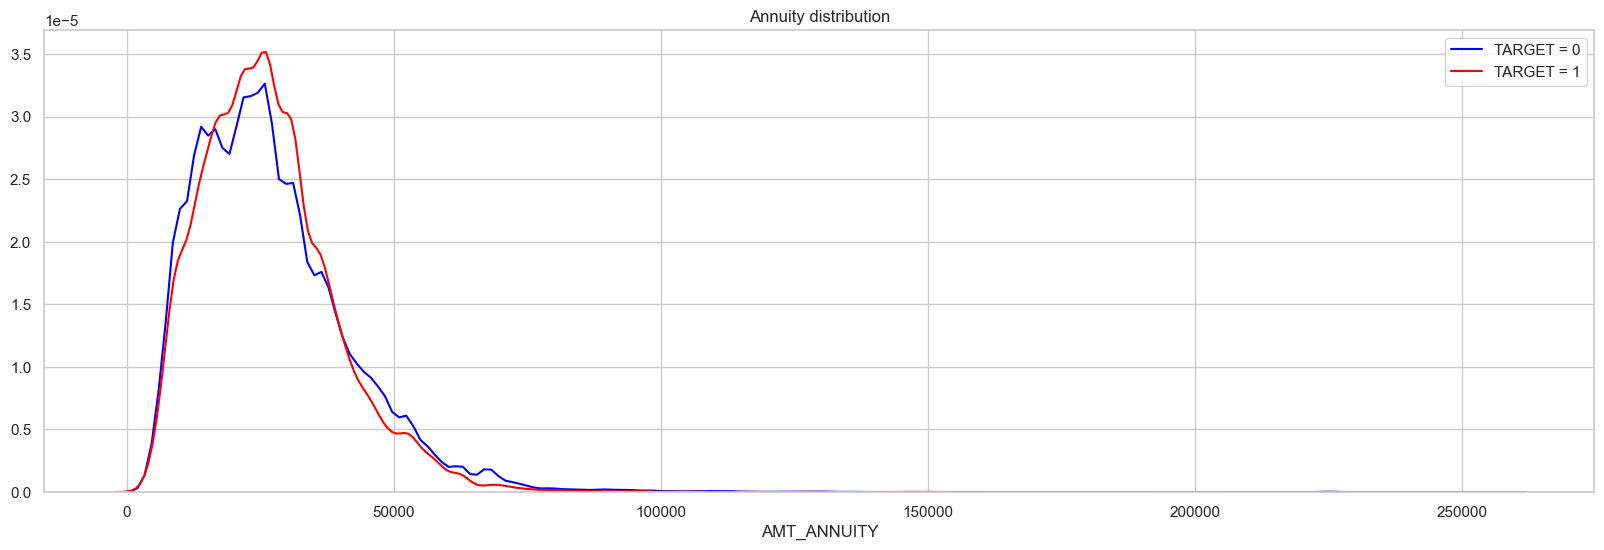

                                   -------------------------------------------------------


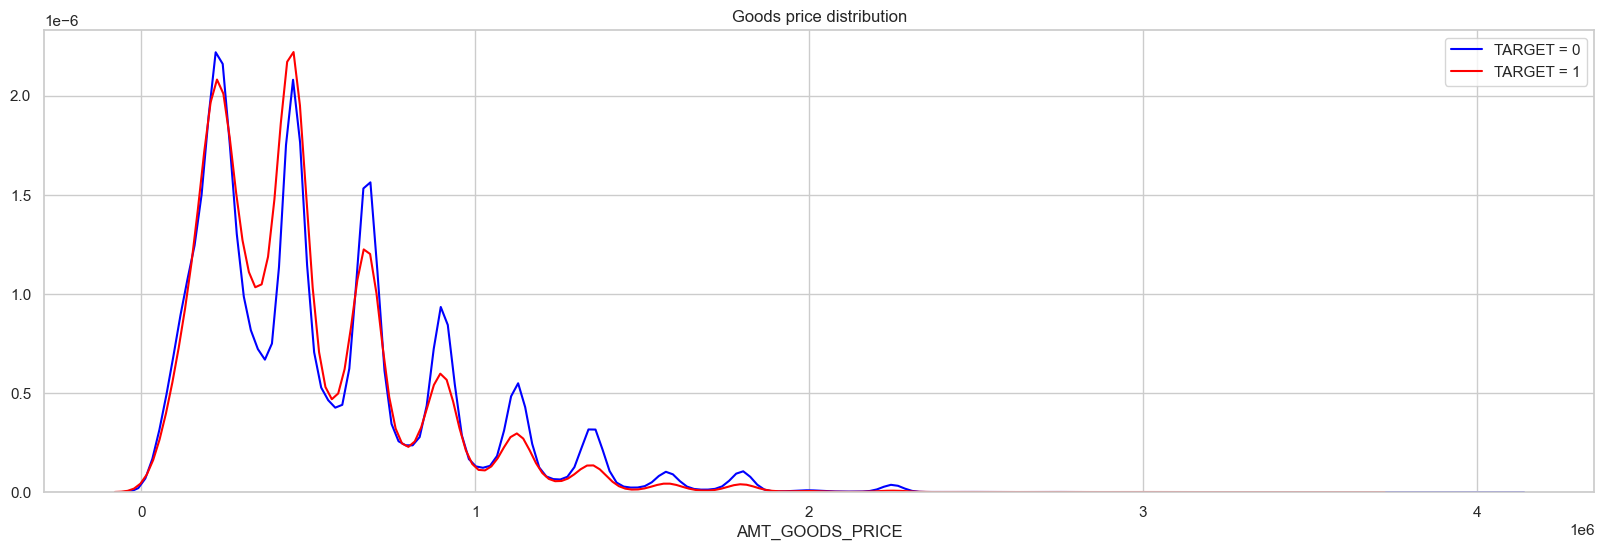

                                   -------------------------------------------------------


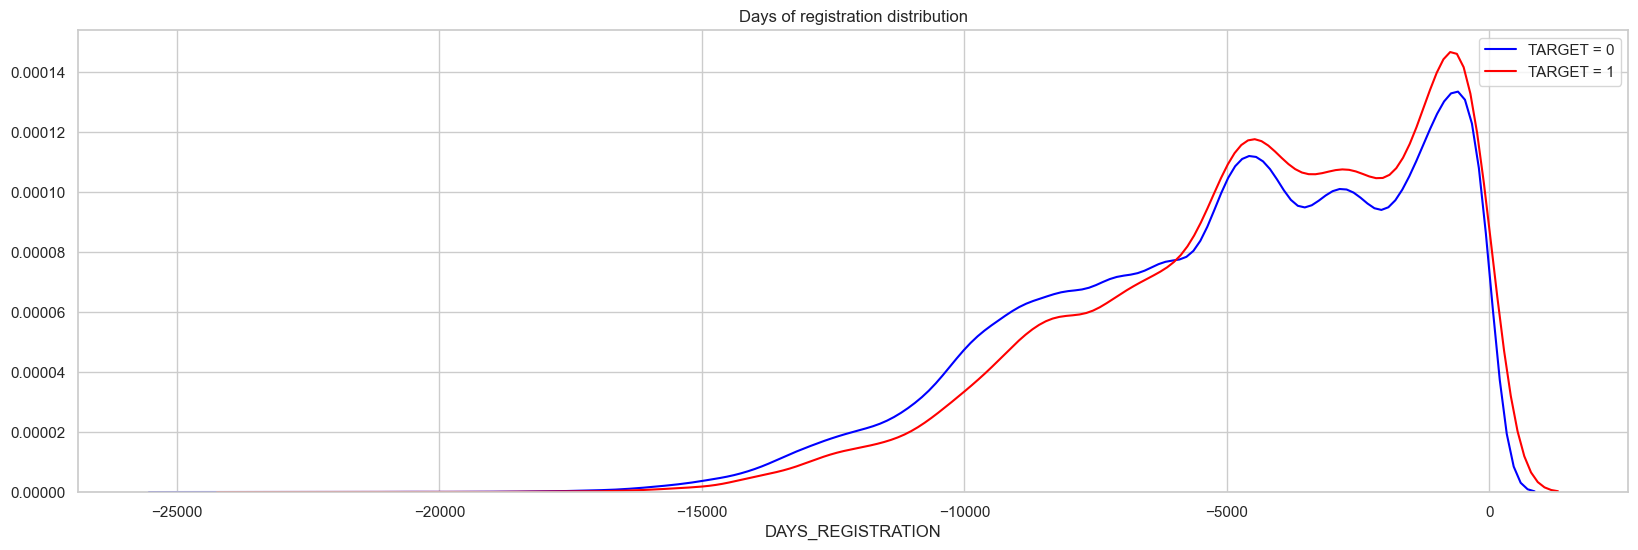

                                   -------------------------------------------------------


In [148]:
plot_distribution('AMT_CREDIT', "Credit distribution") #
print("                                   -------------------------------------------------------")
plot_distribution('AMT_ANNUITY', "Annuity distribution")
print("                                   -------------------------------------------------------") #paiement périodique que le client doit effectuer pour rembourser son crédit. Cette information est utile pour évaluer la charge financière du client.
plot_distribution('AMT_GOODS_PRICE', "Goods price distribution")
print("                                   -------------------------------------------------------")#prix des biens ou des produits achetés avec le crédit.
plot_distribution('DAYS_REGISTRATION', "Days of registration distribution")#le nombre de jours depuis l'enregistrement du client auprès de la banque
print("                                   -------------------------------------------------------")

### | Annuity distribution

Let's plot the annuity distribution.

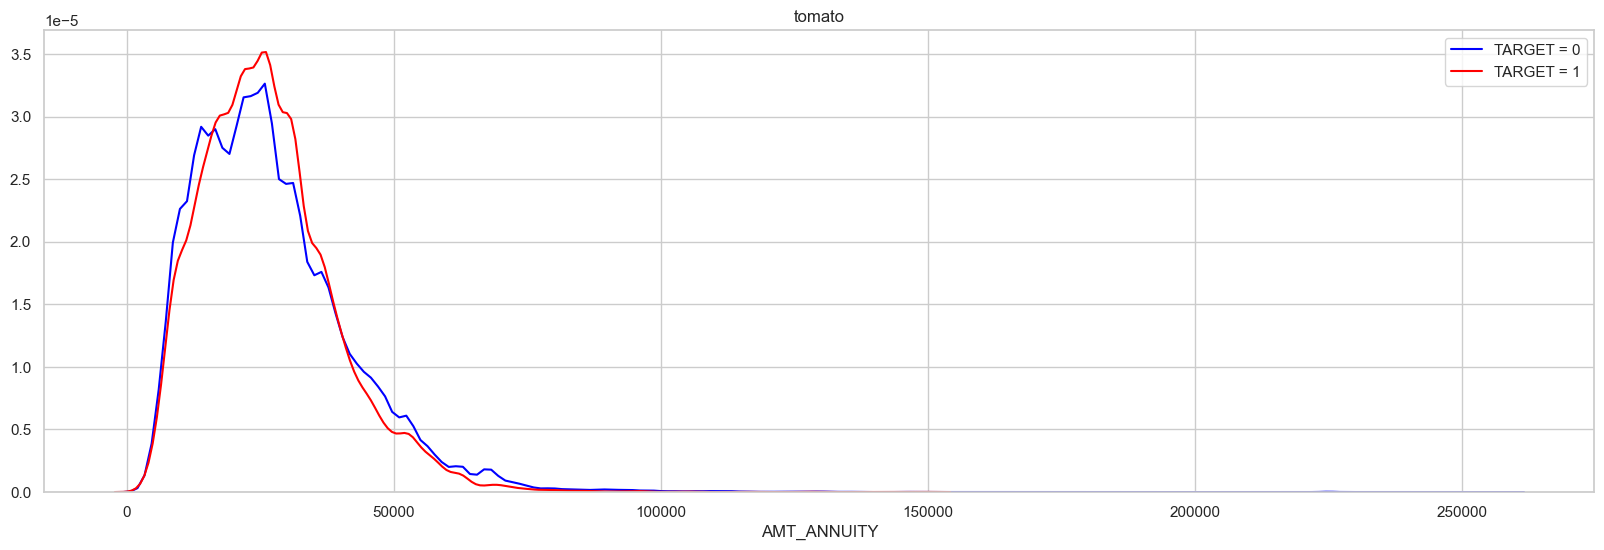

In [149]:
plot_distribution('AMT_ANNUITY','tomato')

### | Goods price

Let's plot the good price distribution.

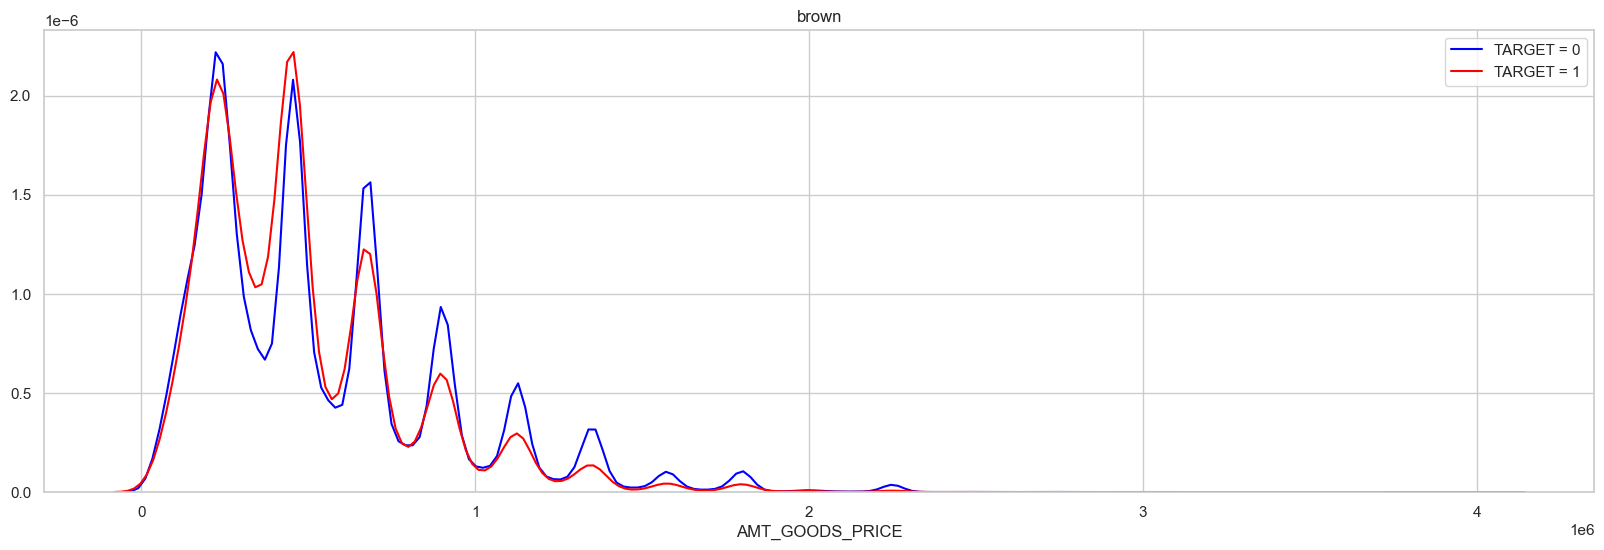

In [150]:
plot_distribution('AMT_GOODS_PRICE','brown')

### | Days from birth distribution

Let's plot the distribution number of days from birth.

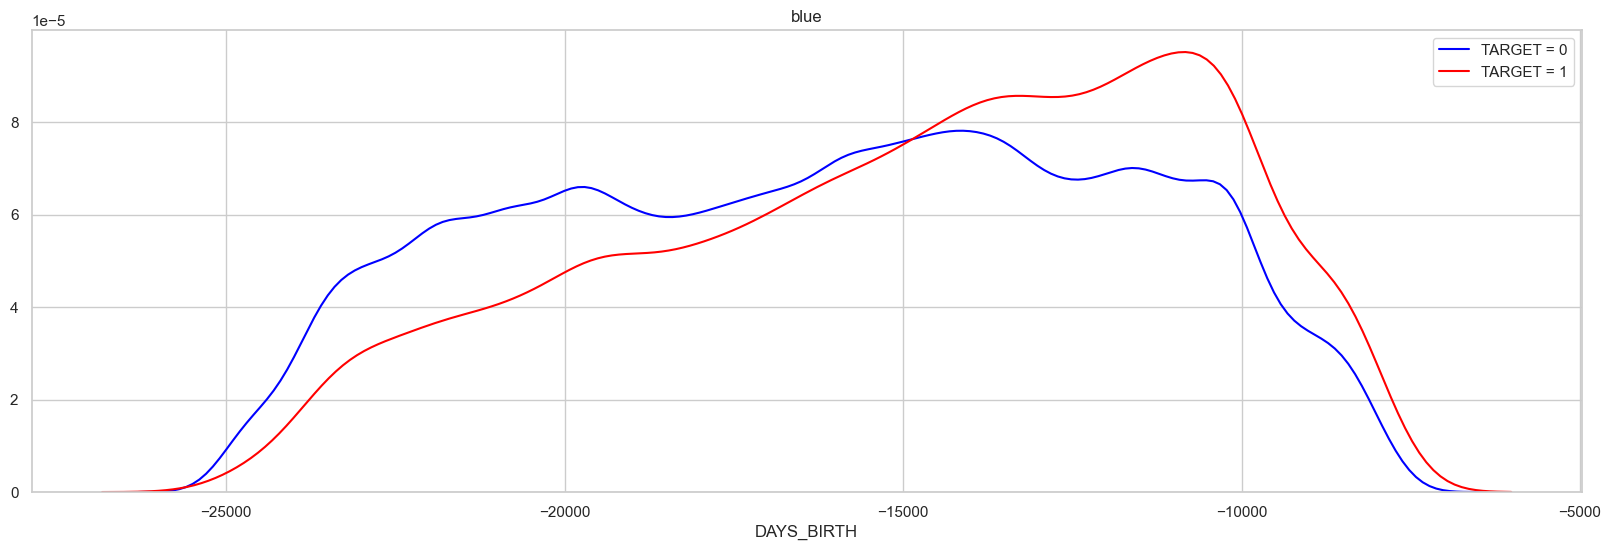

In [151]:
plot_distribution('DAYS_BIRTH','blue')#prêt depuis

La valeur négative signifie que la date de naissance se situe dans le passé. La fourchette d'âge se situe approximativement entre 20 et 68 ans.

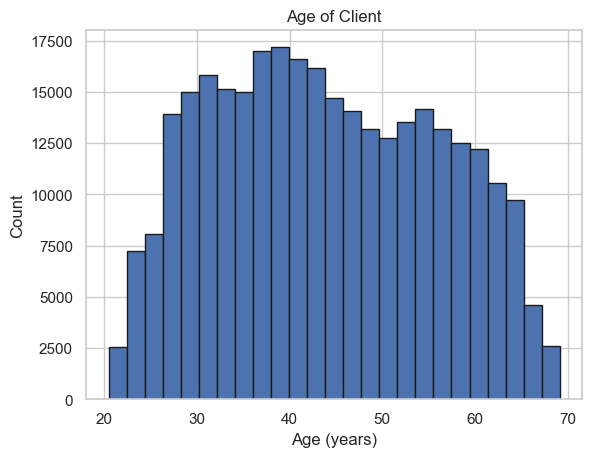

In [152]:
train['DAYS_BIRTH'] = abs(train['DAYS_BIRTH'])

# Plot the distribution of ages in years
plt.hist(train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

Il n'y a pas de valeurs aberrantes car tous les âges sont raisonnables. Pour visualiser l'effet de l'âge sur la cible, nous allons ensuite tracer un graphique d'estimation de la densité du noyau (KDE) coloré par la valeur de la cible

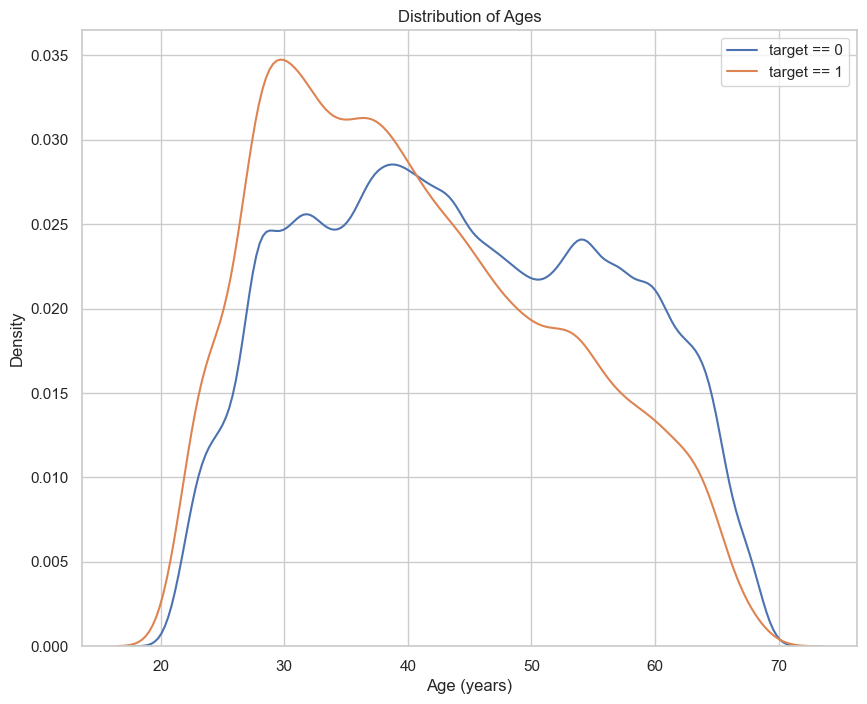

In [153]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(train.loc[train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(train.loc[train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages')
plt.legend(loc='upper right')

TARGET= 1 penche vers l'extrémité la plus jeune de la fourchette. Bien qu'il ne s'agisse pas d'une corrélation significative (coefficient de corrélation de -0,07), cette variable sera probablement utile dans un modèle d'apprentissage automatique car elle affecte la cible.

Il y a donc une tendance claire : les jeunes demandeurs sont plus susceptibles de ne pas rembourser le prêt ! Il s'agit d'une information qui pourrait être directement utilisée par la banque : étant donné que les jeunes clients sont moins susceptibles de rembourser le prêt, il conviendrait peut-être de leur fournir davantage de conseils ou d'astuces en matière de planification financière. Cela ne signifie pas que la banque doive discriminer les jeunes clients, mais il serait judicieux de prendre des mesures de précaution pour aider les jeunes clients à rembourser à temps.

### | Days employed distribution

Let's represent the distribution of number of days employed

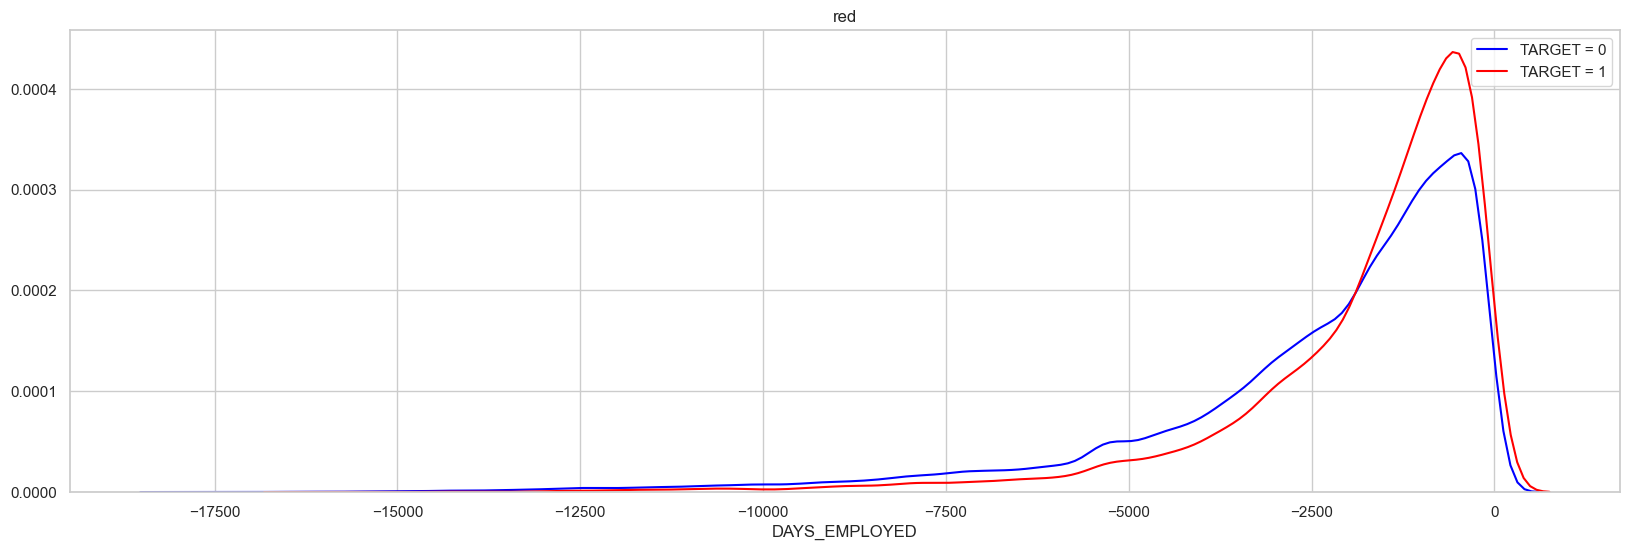

In [154]:
# Replace the anomalous values with nan
train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

plot_distribution('DAYS_EMPLOYED','red')

### | Days of registration distribution

Let's plot the distribution of DAYS_REGISTRATION.

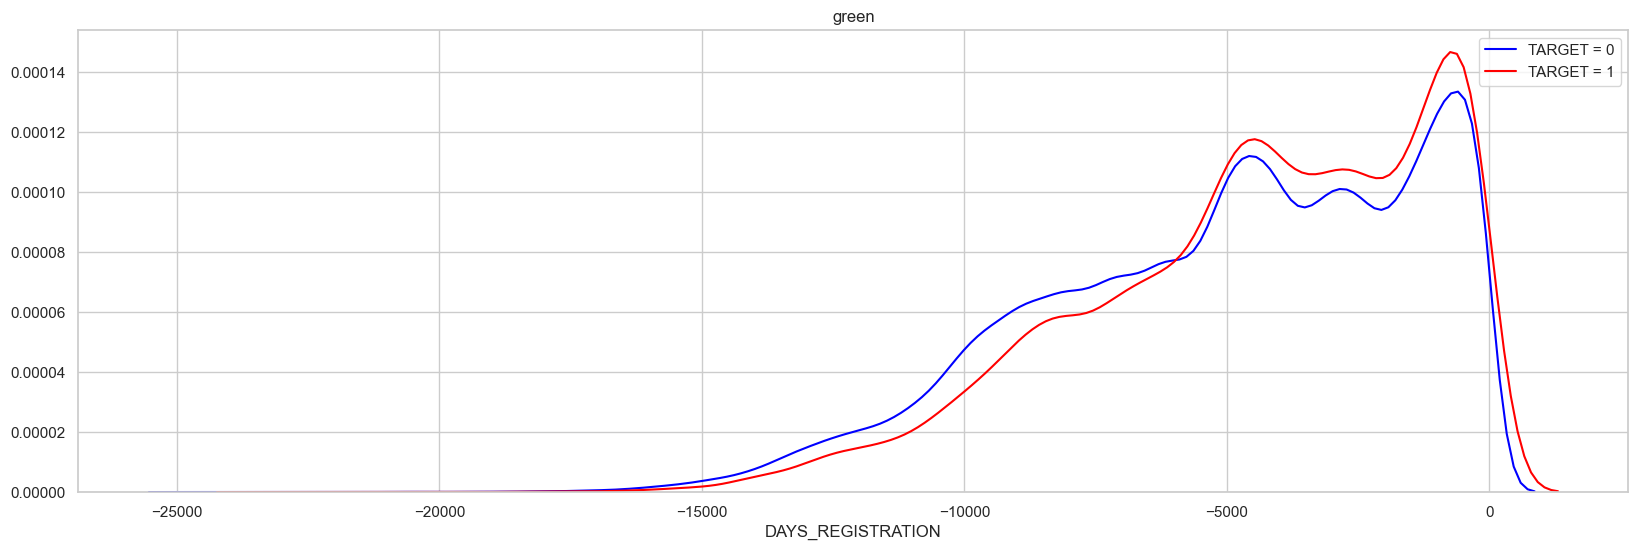

In [155]:
plot_distribution('DAYS_REGISTRATION','green')

### | Days ID publish distribution

Let's plot the distribution of DAYS_ID_PUBLISH.

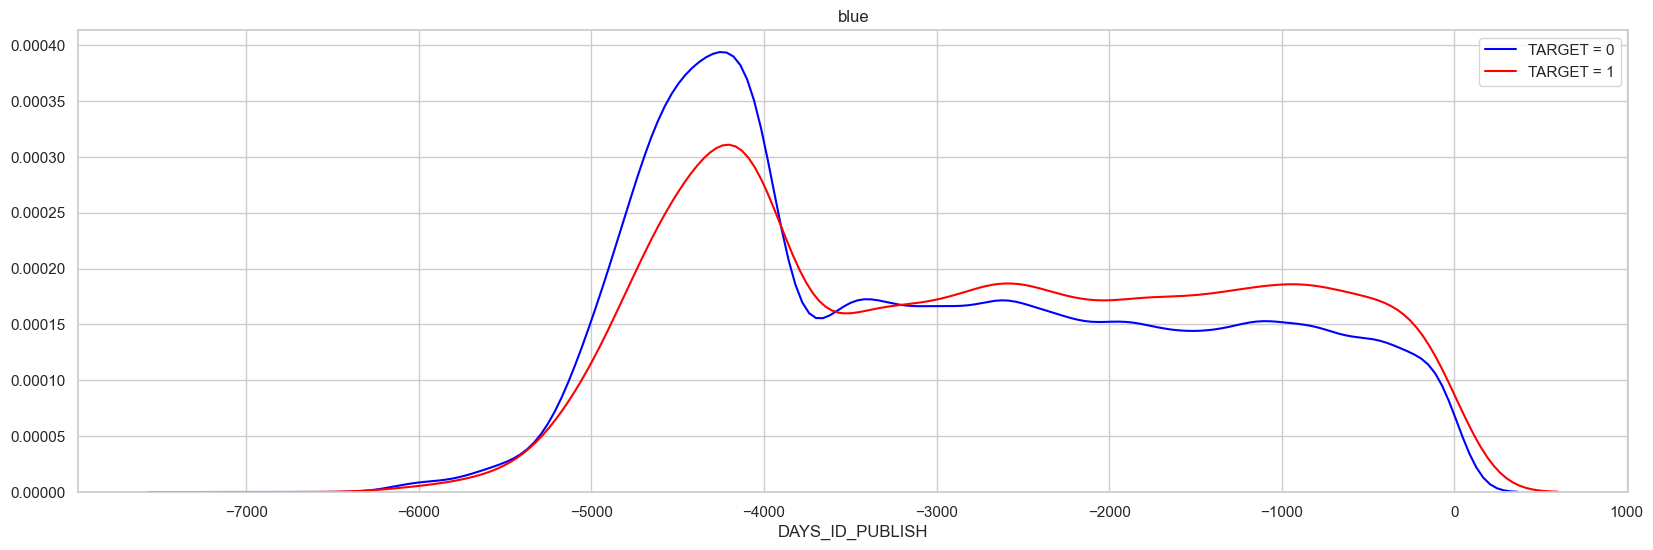

In [156]:
plot_distribution('DAYS_ID_PUBLISH','blue')

### | Comparison of interval values with TARGET = 1 and TARGET = 0

Let's compare the distribution of interval values ploted above for values of TARGET = 1 and TARGET = 0

C:\Users\YOUSSEFBOUHLEL\AppData\Local\Temp\ipykernel_34988\919407841.py:15: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
C:\Users\YOUSSEFBOUHLEL\AppData\Local\Temp\ipykernel_34988\919407841.py:16: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
C:\Users\YOUSSEFBOUHLEL\AppData\Local\Temp\ipykernel_34988\919407841.py:15: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an e

<Figure size 640x480 with 0 Axes>

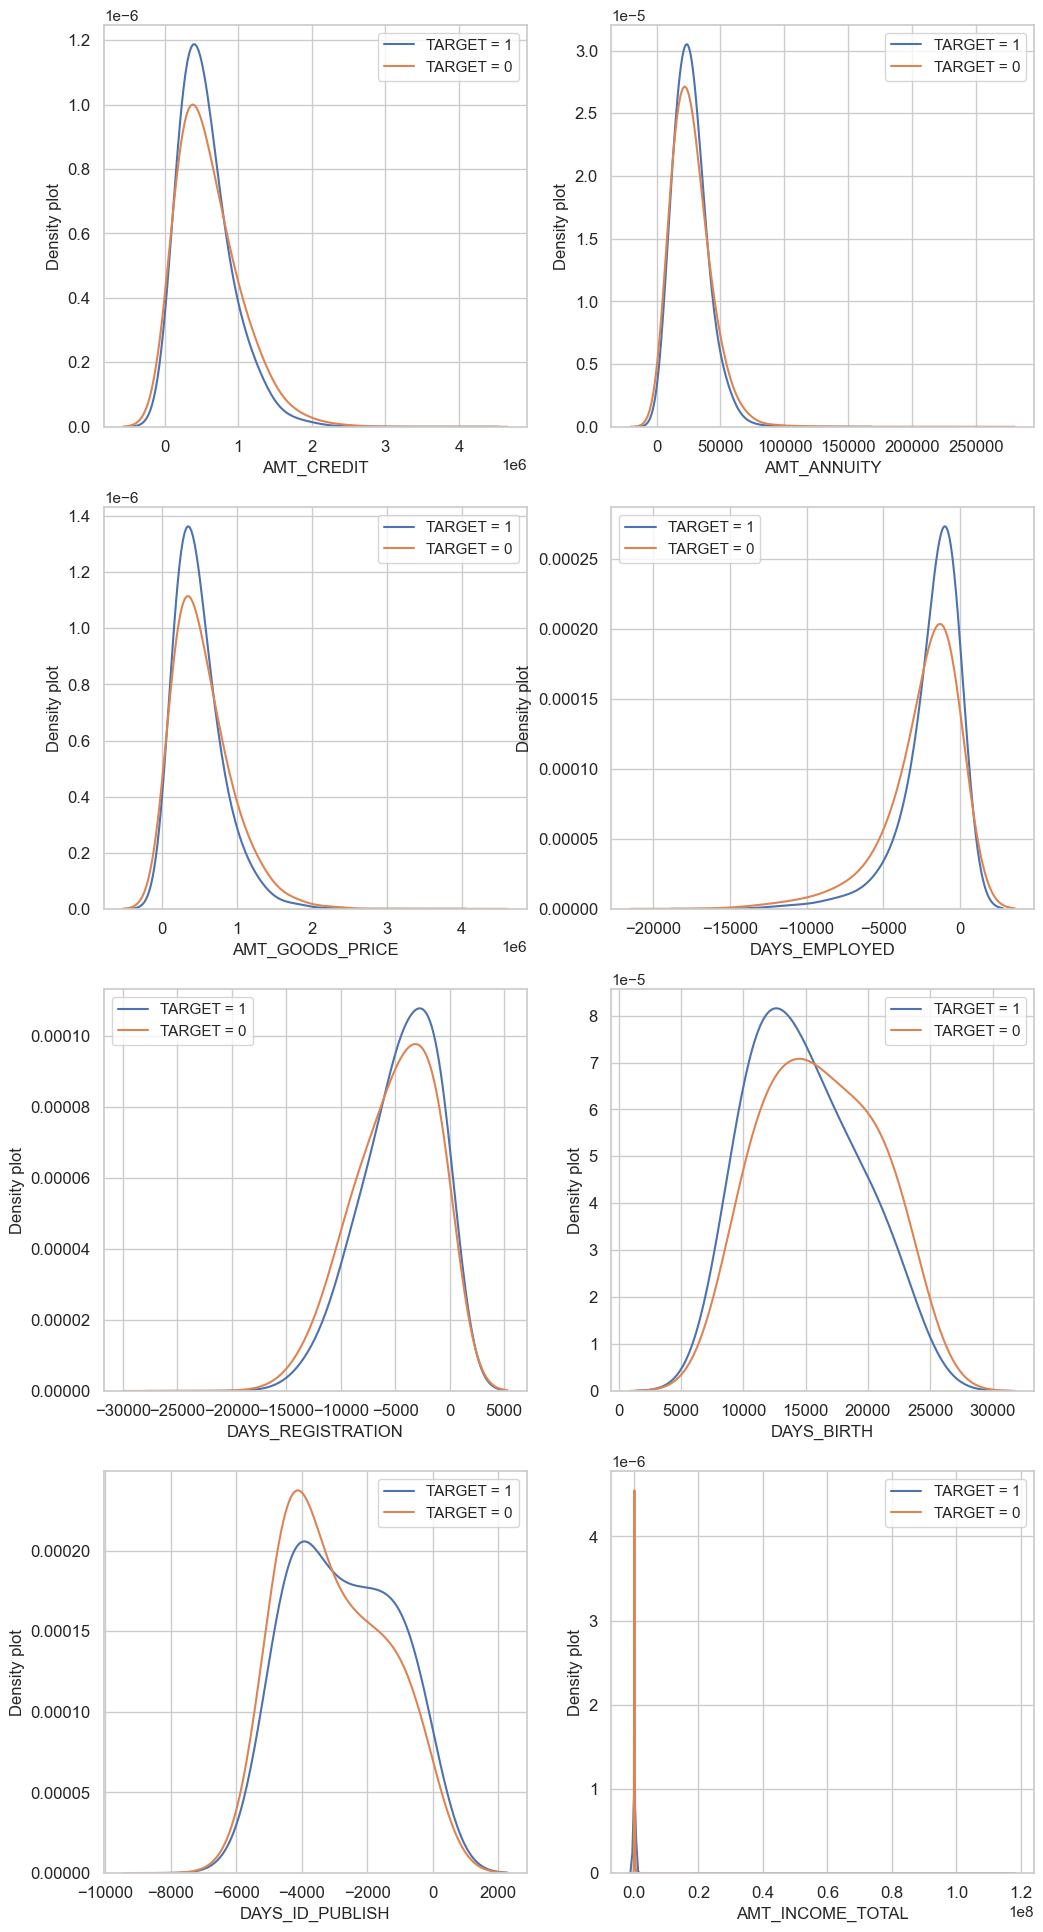

In [157]:
var = ['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED', 'DAYS_REGISTRATION','DAYS_BIRTH','DAYS_ID_PUBLISH','AMT_INCOME_TOTAL']
plot_distribution_comp(var,nrow=4)

### | Region registered not live region and not work region

Let's represent the values of region registered and not live region and region registered and not work region.

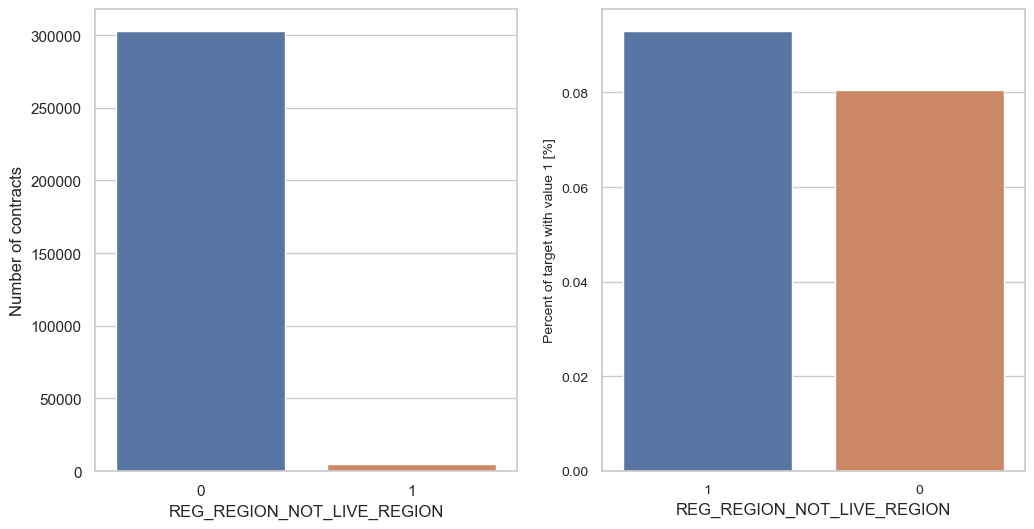

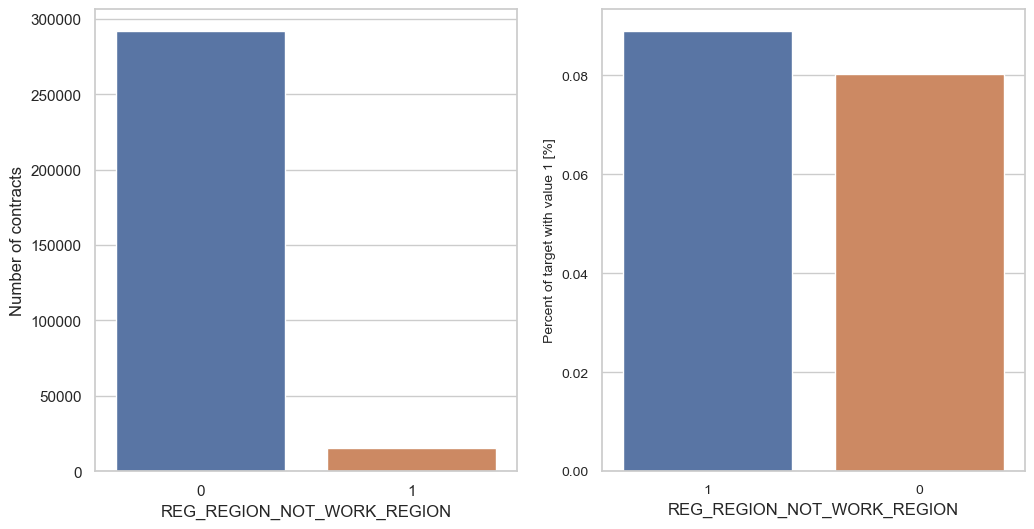

In [158]:
plot_stats('REG_REGION_NOT_LIVE_REGION')
plot_stats('REG_REGION_NOT_WORK_REGION')

Très peu de personnes sont inscrites dans les régions où l'on ne vit pas ou où l'on ne travaille pas. En général, le taux de non-retour est légèrement plus élevé dans ces cas que dans les autres (un peu plus de 8 % contre environ 8 %)

### | City registered not live city and not work city

Let's represent the values of City registered not live city and not work city.

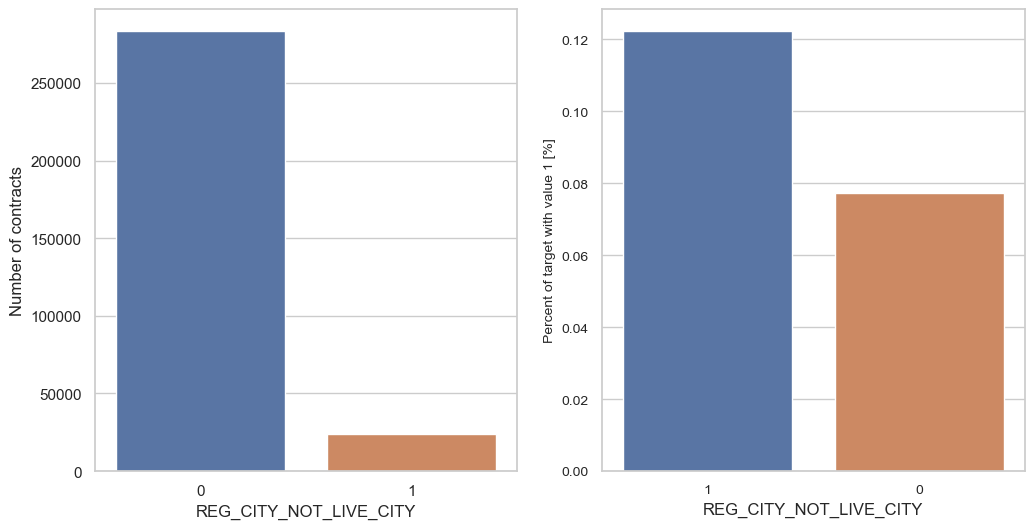

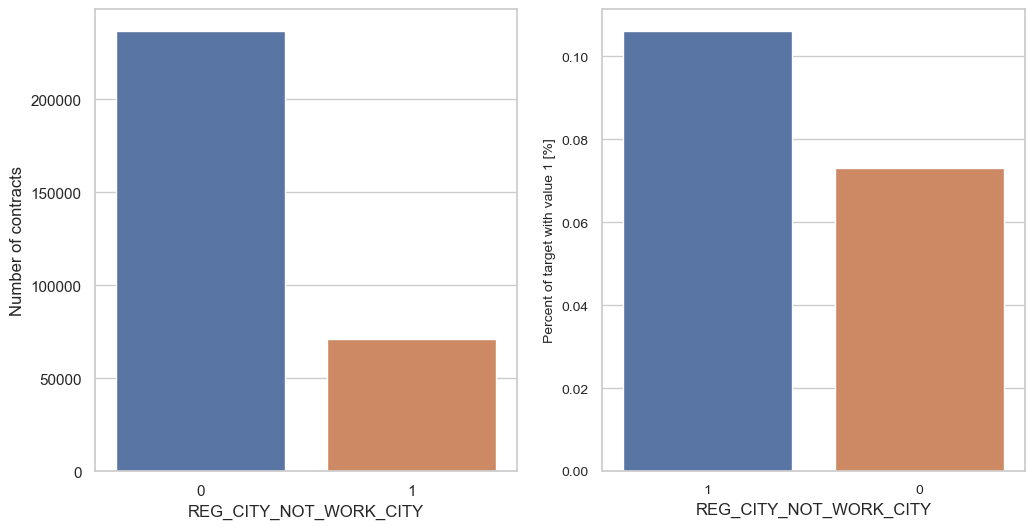

In [159]:
plot_stats('REG_CITY_NOT_LIVE_CITY')
plot_stats('REG_CITY_NOT_WORK_CITY')

En général, beaucoup plus de personnes s'inscrivent dans la ville où elles vivent ou travaillent (un plus grand nombre d'entre elles s'inscrivent différemment dans la ville de travail que dans la ville de résidence).

Les personnes qui s'inscrivent dans une ville différente de celle où elles travaillent ou vivent sont plus nombreuses à ne pas rembourser leurs prêts que celles qui s'inscrivent dans la même ville (11 % pour le travail et 12 % pour le logement).

### | Exterior Sources

Les trois variables présentant les corrélations négatives les plus fortes avec la cible sont EXT_SOURCE_1, EXT_SOURCE_2 et EXT_SOURCE_3. Selon la documentation, ces caractéristiques représentent un « score normalisé provenant d'une source de données externe ». Je ne suis pas sûr de ce que cela signifie exactement, il pourrait s'agir d'une base de données commerciale contenant d'autres résultats d'algorithmes.

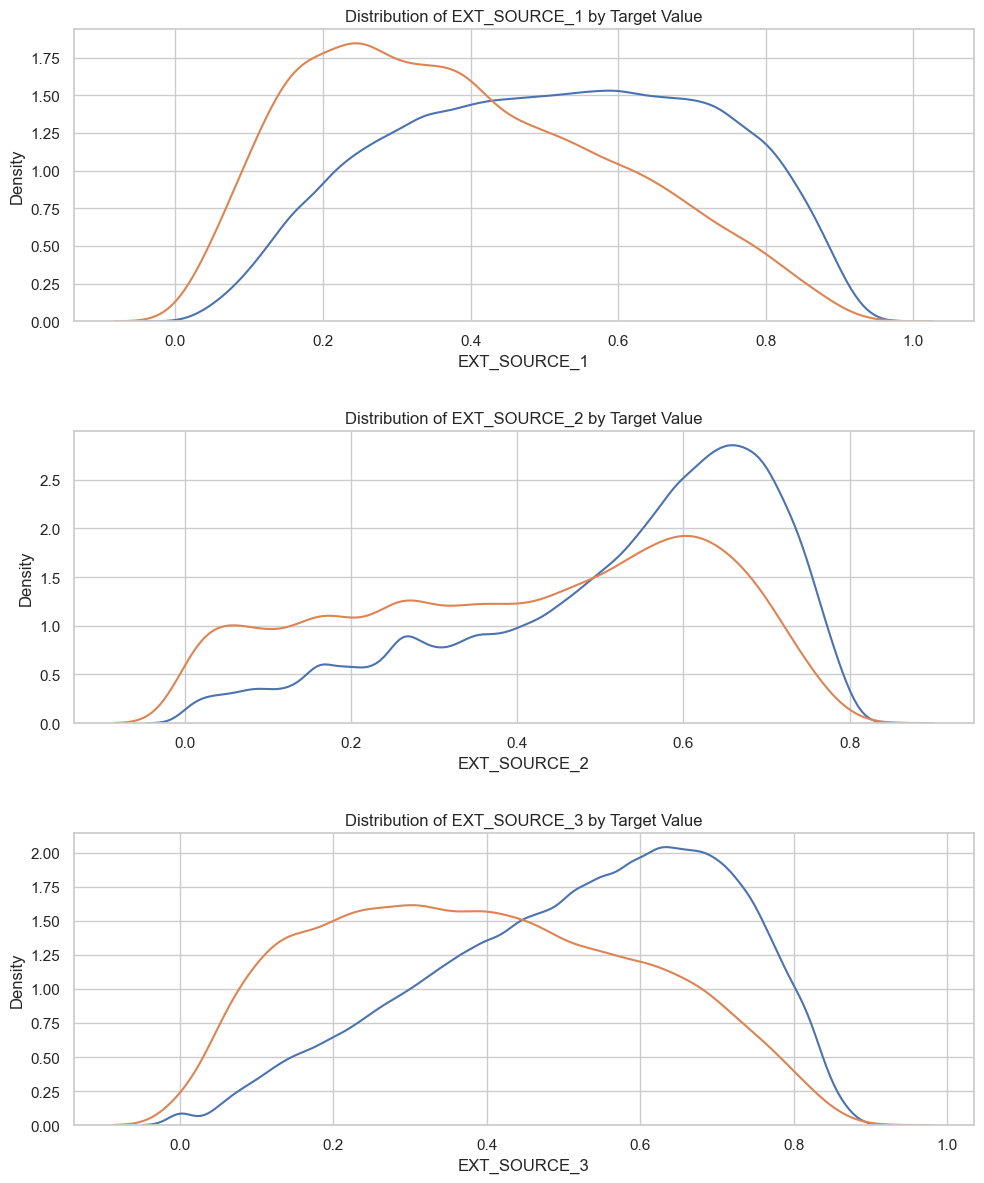

In [160]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):

    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(train.loc[train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(train.loc[train['TARGET'] == 1, source], label = 'target == 1')

    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');

plt.tight_layout(h_pad = 2.5)

EXT_SOURCE_3 affiche la plus grande différence entre les valeurs de la cible. Nous pouvons clairement voir que cette caractéristique a un lien avec la probabilité qu'un demandeur rembourse un prêt.

Voyons également les corrélations des caractéristiques EXT_SOURCE avec la cible et entre elles.

In [161]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

TARGET  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3
TARGET        1.000000     -0.155317     -0.160472     -0.178919
EXT_SOURCE_1 -0.155317      1.000000      0.213982      0.186846
EXT_SOURCE_2 -0.160472      0.213982      1.000000      0.109167
EXT_SOURCE_3 -0.178919      0.186846      0.109167      1.000000

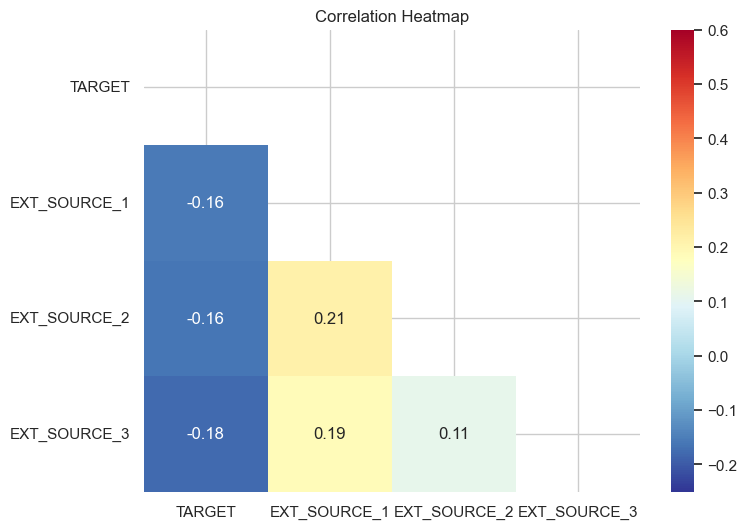

In [162]:
plt.figure(figsize = (8, 6))

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(ext_data_corrs)

# Heatmap of correlations, using the upper triangle matrix as mask
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6, mask=matrix)
plt.title('Correlation Heatmap');

Les trois caractéristiques de l'EXT_SOURCE ont des corrélations négatives avec la cible, ce qui indique que plus la valeur de l'EXT_SOURCE augmente, plus le client est susceptible de rembourser le prêt.

### | Correlations

In [163]:
correlations = train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n',correlations.tail(20))
print('\nMost Negative Correlations:\n',correlations.head(20))

Most Positive Correlations:
 OBS_30_CNT_SOCIAL_CIRCLE       0.009131
CNT_FAM_MEMBERS                0.009308
CNT_CHILDREN                   0.019187
AMT_REQ_CREDIT_BUREAU_YEAR     0.019930
FLAG_WORK_PHONE                0.028524
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.15

**Sources extérieures, les plus fortes corrélations linéaires**
Ces 3 variables (EXT_SOURCE) présentant les corrélations négatives les plus fortes avec la Target. Selon la documentation, ces fonctionnalités représentent un «score normalisé à partir d'une source de données externe». Difficile de comprendre le sens exact, nous pouvons émettre l'hypothèse d'une cote de crédit cumulative établie à l'aide de différentes sources de données.

### | **Correlation Matrix with Heatmap**

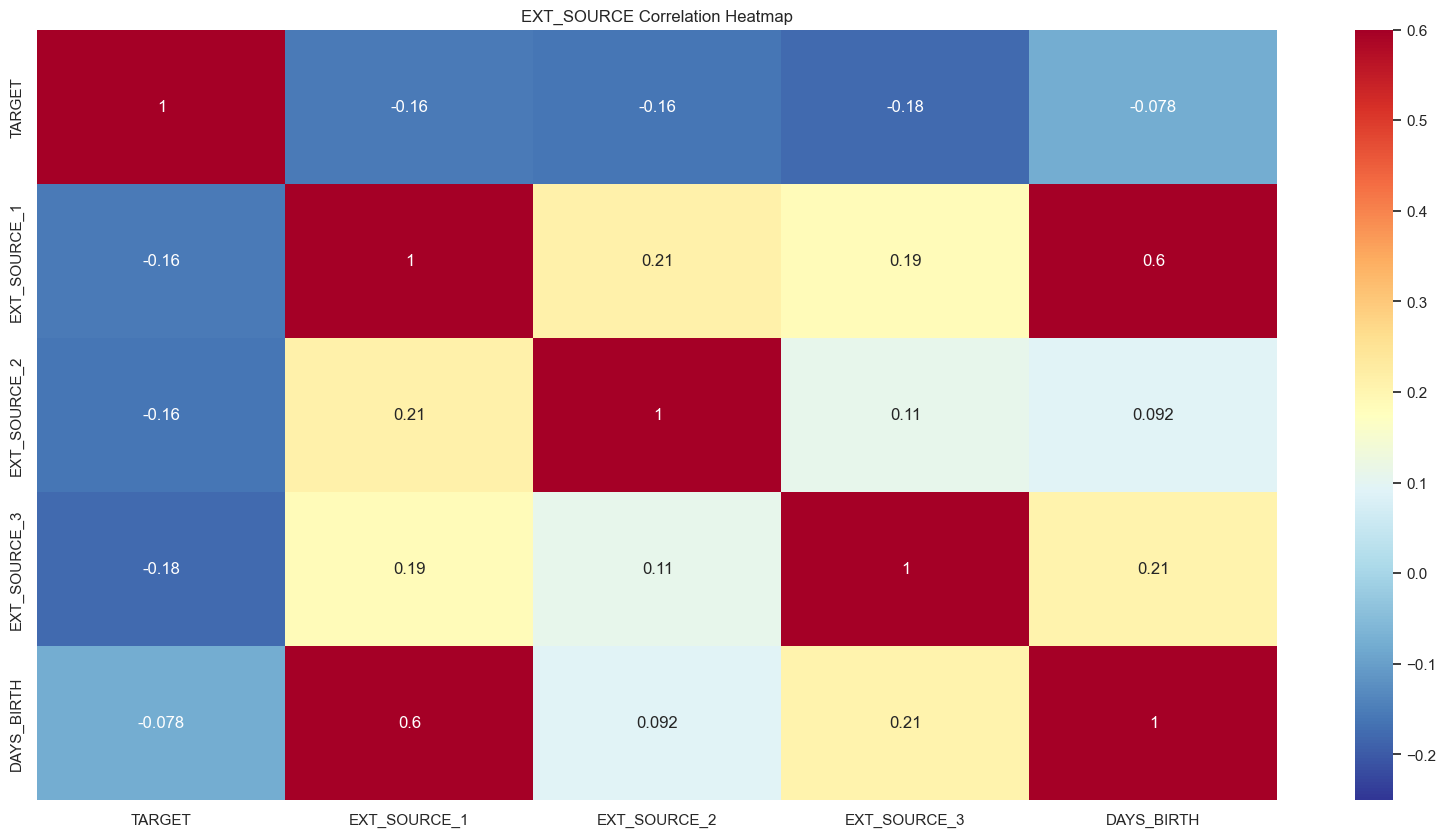

In [164]:
#Heatmap of correlations with highest correlated features
plt.figure(figsize = (20,10))
sns.heatmap(train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']].corr(),
            cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6,
           )
plt.title('EXT_SOURCE Correlation Heatmap')
plt.show()

Ces sources extérieures sont corrélées négativement avec la Target (Attention, négativement mais avec de très faibles coefficients). Malgré tout, on peut penser que si la valeur augmente, le client est plus susceptible de pouvoir rembourser le crédit. Notons que 'DAYS_BIRTH' est corrélée avec 'EXT_SOURCE_1', peut-être l'un des facteurs de ce score est l'âge du client.

## | Column description | how to identify clients in default

In [165]:
pd.set_option('display.max_rows', 220)
col_descr

Unnamed: 0                         Table                           Row                                                                                                                                                                                                                                                                           Description                                Special
0             1  application_{train|test}.csv                    SK_ID_CURR                                                                                                                                                                                                                                                              ID of loan in our sample                                    NaN
1             2  application_{train|test}.csv                        TARGET                                                                                           Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)                                    NaN
2             5  application_{train|test}.csv            NAME_CONTRACT_TYPE                                                                                                                                                                                                                                           Identification if loan is cash or revolving                                    NaN
3             6  application_{train|test}.csv                   CODE_GENDER                                                                                                                                                                                                                                                                  Gender of the client                                    NaN
4             7  application_{train|test}.csv                  FLAG_OWN_CAR                                                                                                                                                                                                                                                         Flag if the client owns a car                                    NaN
5             8  application_{train|test}.csv               FLAG_OWN_REALTY                                                                                                                                                                                                                                                   Flag if client owns a house or flat                                    NaN
6             9  application_{train|test}.csv                  CNT_CHILDREN                                                                                                                                                                                                                                                     Number of children the client has                                    NaN
7            10  application_{train|test}.csv              AMT_INCOME_TOTAL                                                                                                                                                                                                                                                                  Income of the client                                    NaN
8            11  application_{train|test}.csv                    AMT_CREDIT                                                                                                                                                                                                                                                             Credit amount of the loan                                    NaN
9            12  application_{train|test}.csv                   AMT_ANNUITY

In [166]:
pd.set_option('display.max_rows', 50)

How to identify a client in default ? Its target is set on 1.<br>
But can we find other evidence of default in the train / test dataframe?

In [167]:
col_descr[col_descr.Description.str.contains("default")]

Unnamed: 0                         Table                       Row                                                                                          Description Special
91          94  application_{train|test}.csv  OBS_30_CNT_SOCIAL_CIRCLE  How many observation of client's social surroundings with observable 30 DPD (days past due) default     NaN
92          95  application_{train|test}.csv  DEF_30_CNT_SOCIAL_CIRCLE            How many observation of client's social surroundings defaulted on 30 DPD (days past due)      NaN
93          96  application_{train|test}.csv  OBS_60_CNT_SOCIAL_CIRCLE  How many observation of client's social surroundings with observable 60 DPD (days past due) default     NaN
94          97  application_{train|test}.csv  DEF_60_CNT_SOCIAL_CIRCLE             How many observation of client's social surroundings defaulted on 60 (days past due) DPD     NaN

In [168]:
df.loc[: , "DEF_30_CNT_SOCIAL_CIRCLE"].unique()

array([ 2.,  0.,  1., nan,  3.,  4.,  5.,  6.,  7., 34.,  8.])

In [169]:
df.loc[(df["DEF_30_CNT_SOCIAL_CIRCLE"] >1) & (df["TARGET"] == 0)  ,:]

SK_ID_CURR  TARGET  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  ...  CC_NAME_CONTRACT_STATUS_Demand_MAX  CC_NAME_CONTRACT_STATUS_Demand_MEAN  CC_NAME_CONTRACT_STATUS_Demand_SUM  CC_NAME_CONTRACT_STATUS_Demand_VAR  CC_NAME_CONTRACT_STATUS_Refused_MIN  CC_NAME_CONTRACT_STATUS_Refused_MAX  CC_NAME_CONTRACT_STATUS_Refused_MEAN  CC_NAME_CONTRACT_STATUS_Refused_SUM  CC_NAME_CONTRACT_STATUS_Refused_VAR  CC_NAME_CONTRACT_STATUS_Sent proposal_MIN  CC_NAME_CONTRACT_STATUS_Sent proposal_MAX  CC_NAME_CONTRACT_STATUS_Sent proposal_MEAN  CC_NAME_CONTRACT_STATUS_Sent proposal_SUM  CC_NAME_CONTRACT_STATUS_Sent proposal_VAR  CC_NAME_CONTRACT_STATUS_Signed_MIN  \
99          100118     0.0            1             0                0             0           90000.0    675000.0      26541.0         675000.0                    0.026392      -22471            NaN             -217.0            -4323          NaN           1               0                0                 1           0           0              1.0                     2                            2  ...                                 NaN                                  NaN                                 NaN                                 NaN                                  NaN                                  NaN                                   NaN                                  NaN                                  NaN                                        NaN                                        NaN                                         NaN                                        NaN                                        NaN                                 NaN   
102         100121     0.0            0             0                0             0          126000.0    787131.0      26145.0         679500.0                    0.018209      -16798         -669.0            -9388.0             -347          NaN           1               1                1                 1           1           0              2.0                     3                            3  ...                                 NaN                                  NaN                                 NaN                                 NaN                                  NaN                                  NaN                                   NaN                                  NaN                                  NaN                                        NaN                                        NaN                                         NaN                                        NaN                                        NaN                                 NaN   
123         100144     0.0            1             0                1             0          112500.0    535500.0      30028.5         535500.0                    0.028663      -16759        -4560.0            -3079.0             -296          NaN           1               1                0                 1           0           0              1.0                     2                            2  ...                                 0.0                                  0.0                                 0.0                                 0.0                                  0.0                                  0.0                                   0.0                                  0.0                                  0.0                                        0.0                                        0.0                                         0.0                                        0.0                                        0.0                                 0.0   
192         100224     0.0  

**Target** : (1 - client ayant des difficultés de paiement : il/elle a eu un retard de paiement de plus de X jours sur au moins une des Y premières échéances du prêt dans notre échantillon, 0 - tous les autres cas)

**DEF_30_CNT_SOCIAL_CIRCLE** : Combien d'observations de l'entourage social du client ont fait l'objet d'un défaut de paiement à 30 DPD (jours de retard) ?

**Conclusion** : Il ne semble pas y avoir de lien spécifique entre « Target » et « DEF_30_CNT_SOCIAL_CIRCLE » : plusieurs clients avec plus d'une observation de l'entourage social en défaut de paiement ne sont pas ciblés 1 mais 0.

## | Identifying unbalanced sample (Target)

Lorsque **Target = « NaN »**, la ligne provient du **fichier de test d'application** et ne doit pas être comptabilisée ni incluse dans l'ensemble des données d'apprentissage.

In [170]:
df.loc[(df["TARGET"] != 0) & (df["TARGET"] != 1) ,:].shape[0] / df.shape[0]

0.1368248790880587

In [171]:
df.loc[(df["TARGET"] != 0) & (df["TARGET"] != 1) ,:].shape[0]

48744

In [172]:
mask = (df["TARGET"] != 0) & (df["TARGET"] != 1)

In [173]:
df.loc[df["TARGET"] == 1 ,:].shape[0] / df[~mask].shape[0]

0.08072986956394489

In [174]:
df.loc[df["TARGET"] == 0 ,:].shape[0] / df[~mask].shape[0]

0.9192701304360551

In [175]:
tot_target = df.loc[df["TARGET"] == 1 ,:].shape[0] / df[~mask].shape[0] + df.loc[df["TARGET"] == 0 ,:].shape[0] / df[~mask].shape[0]
tot_target

1.0

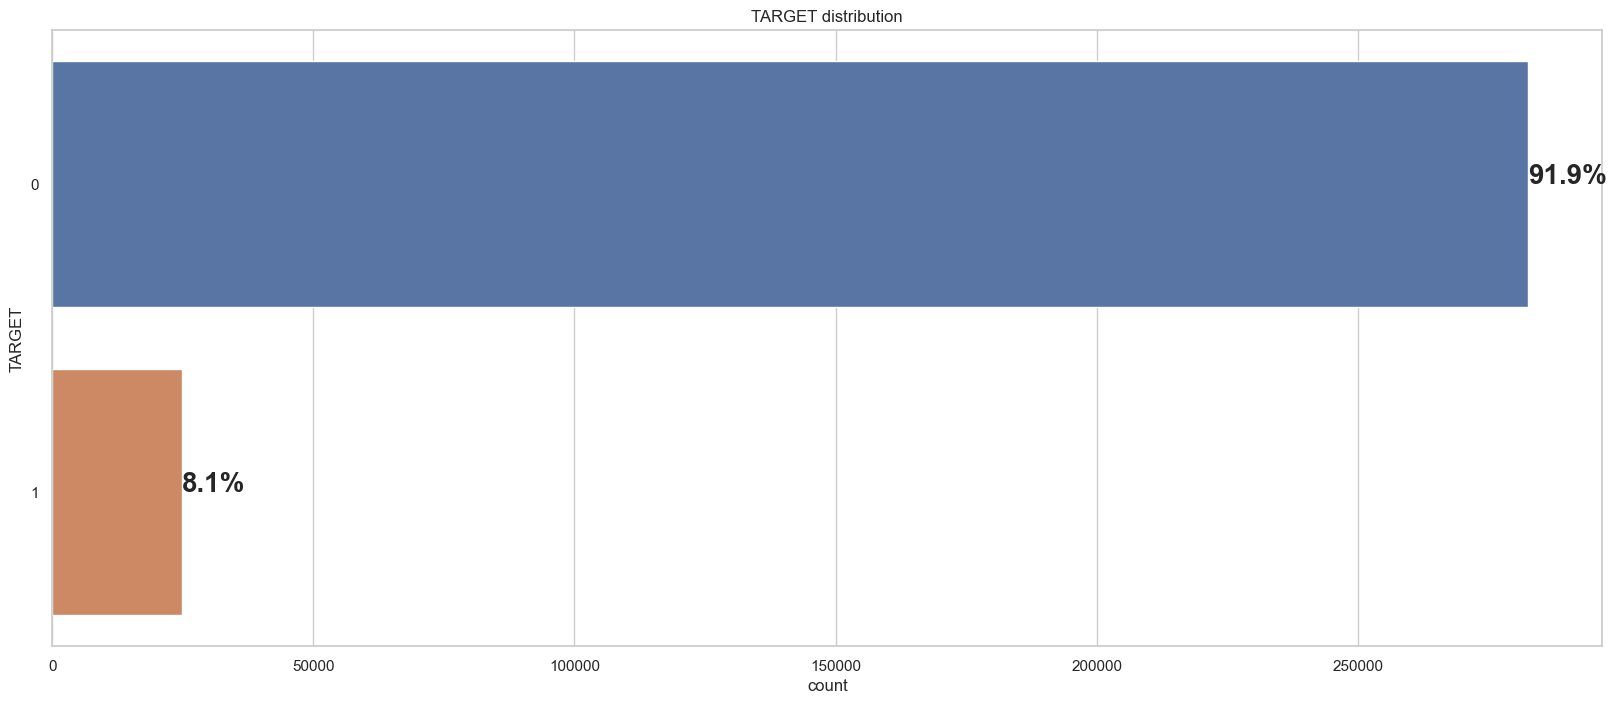

In [176]:
ax, fig = plt.subplots(figsize=(20,8))
ax = sns.countplot(y='TARGET', data=train)
ax.set_title("TARGET distribution")

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/len(train.TARGET))
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y), fontsize=20, fontweight='bold')

plt.show()

Environ **8%** des clients sont **en défaut**, contre **92% sans défault**. <br>

Le jeu de données d'entrainement est **déséquilibré**. <br> La classe majoritaire est de **taille 11 fois supérieure** à la classe minoritaire, les **clients en défaut**, qui est notre **classe d'intérêt prioritaire** sur laquelle nous souhaitons avoir une bonne **qualité de prédiction**.<br>
Ce déséquilibre doit être **pris en compte** dans l'**entrainement des modèles**.  <br>
En effet un modèle "naif" prédisant systématiquement que les clients sont sans défaut aurait une **justesse (accuracy) de 92%** alors qu'il ne **permettrait pas de détecter** les clients à risque.


## | Creating data_train / data_test

Il est nécessaire de commencer par la mise en place des données d'entrainement / test.<br>
On peut procéder en rappel avec les jeux de données application_train/test.

In [235]:
df.isna().sum()

SK_ID_CURR                               0
TARGET                               48744
CODE_GENDER                              0
FLAG_OWN_CAR                             0
FLAG_OWN_REALTY                          0
                                     ...  
CC_NAME_CONTRACT_STATUS_nan_MAX     252693
CC_NAME_CONTRACT_STATUS_nan_MEAN    252693
CC_NAME_CONTRACT_STATUS_nan_SUM     252693
CC_NAME_CONTRACT_STATUS_nan_VAR     253385
CC_COUNT                            252693
Length: 797, dtype: int64

In [177]:
data_train = df[df['SK_ID_CURR'].isin(train.SK_ID_CURR)]
data_test = df[df['SK_ID_CURR'].isin(test.SK_ID_CURR)]

data_test = data_test.drop('TARGET', axis=1)

In [178]:
data_train.set_index('SK_ID_CURR', inplace=True)
data_test.set_index('SK_ID_CURR', inplace=True)

In [179]:
print('Training Features shape with categorical columns: ', data_train.shape)
print('Testing Features shape with categorical columns: ', data_test.shape)

Training Features shape with categorical columns:  (307507, 796)
Testing Features shape with categorical columns:  (48744, 795)


In [180]:
#Number of each type of column
data_train.dtypes.value_counts()

float64    622
uint8      133
int64       41
dtype: int64

In [181]:
data_train.describe()

TARGET    CODE_GENDER   FLAG_OWN_CAR  FLAG_OWN_REALTY   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  ...  CC_NAME_CONTRACT_STATUS_Demand_MAX  CC_NAME_CONTRACT_STATUS_Demand_MEAN  CC_NAME_CONTRACT_STATUS_Demand_SUM  CC_NAME_CONTRACT_STATUS_Demand_VAR  CC_NAME_CONTRACT_STATUS_Refused_MIN  CC_NAME_CONTRACT_STATUS_Refused_MAX  CC_NAME_CONTRACT_STATUS_Refused_MEAN  CC_NAME_CONTRACT_STATUS_Refused_SUM  CC_NAME_CONTRACT_STATUS_Refused_VAR  CC_NAME_CONTRACT_STATUS_Sent proposal_MIN  CC_NAME_CONTRACT_STATUS_Sent proposal_MAX  CC_NAME_CONTRACT_STATUS_Sent proposal_MEAN  CC_NAME_CONTRACT_STATUS_Sent proposal_SUM  CC_NAME_CONTRACT_STATUS_Sent proposal_VAR  \
count  307507.00000  307507.000000  307507.000000    307507.000000  307507.000000      3.075070e+05  3.075070e+05  307495.000000     3.072290e+05               307507.000000  307507.000000  252133.000000      307507.000000    307507.000000  104580.000000  307507.000000   307507.000000    307507.000000     307507.000000  307507.000000  307507.000000    307505.000000         307507.000000                307507.000000            307507.000000  ...                        86905.000000                         86905.000000                          86905.0000                        86273.000000                              86905.0                         86905.000000                          86905.000000                         86905.000000                         86273.000000                                    86905.0                               86905.000000                                86905.000000                               86905.000000                               86273.000000   
mean        0.08073       0.658352       0.340106         0.306331       0.417047      1.687977e+05  5.990286e+05   27108.666786     5.383977e+05                    0.020868  -16037.027271   -2384.142254       -4986.131376     -2994.201670      12.061121       0.999997        0.819887         0.199358          0.998133       0.281057       0.056721         2.152658              2.052461                     2.031518                12.063394  ...                            0.000173                             0.000106                              0.0097                            0.000030                                  0.0                             0.000161                              0.000002                             0.000161                             0.000002                                        0.0                                   0.005293                                    0.000064                                   0.005293                                   0.000064   
std         0.27242       0.474263       0.473745         0.460970       0.722119      2.371246e+05  4.024926e+05   14493.798379     3.694472e+05                    0.013831    4363.982424    2338.327666        3522.883030      1509.454566      11.944919       0.001803        0.384282         0.399518          0.043164       0.449516       0.231308         0.910680              0.509034                     0.502737                 3.265835  ...                            0.013137                             0.008740                              0.8112                            0.002463                                  0.0                             0.012691                              0.000155                             0.012691                             0.000156                                        0.0                                   0.072562                                    0.000877                                   0.072562                                   0.000881   
min         0.000

## | Feature elimination

### | Manual columns removal based on business knowledge

This list may vary after modelisation and feature interpretation :

In [182]:
features_to_remove = [
    "APPROVED_HOUR_APPR_PROCESS_START_MAX",
    "REG_CITY_NOT_WORK_CITY",
    "EMERGENCYSTATE_MODE_No",
    "PREV_NAME_CONTRACT_STATUTS_Refused_MEAN"
]

Applying this filter to the data_train and data_test set :

In [183]:
data_train = data_train.loc[ : , ~data_train.columns.isin(features_to_remove)]

In [184]:
data_test = data_test.loc[ : , ~data_test.columns.isin(features_to_remove)]

### | Columns removal based on missing values

In [185]:
# display the number and the name of the columns to delete because exceeding 55% missing values

df_missing=data_train.isna()
result=df_missing.sum()/len(data_train)
result

TARGET                              0.000000
CODE_GENDER                         0.000000
FLAG_OWN_CAR                        0.000000
FLAG_OWN_REALTY                     0.000000
CNT_CHILDREN                        0.000000
                                      ...   
CC_NAME_CONTRACT_STATUS_nan_MAX     0.717389
CC_NAME_CONTRACT_STATUS_nan_MEAN    0.717389
CC_NAME_CONTRACT_STATUS_nan_SUM     0.717389
CC_NAME_CONTRACT_STATUS_nan_VAR     0.719444
CC_COUNT                            0.717389
Length: 793, dtype: float64

In [186]:
# set threshold for maximum missing values accepted in a column
missing_threshold = 0.6

In [187]:
len(data_train.loc[:,result > missing_threshold].columns)

212

En fixant le threshold à 60% de manquants maximum, on supprime 212 colonnes du jeu de données.

In [188]:
data_train.loc[:,result > missing_threshold].columns

Index(['OWN_CAR_AGE', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'FLOORSMIN_AVG', 'LIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_AVG', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'FLOORSMIN_MODE', 'LIVINGAPARTMENTS_MODE',
       ...
       'CC_NAME_CONTRACT_STATUS_Signed_MAX', 'CC_NAME_CONTRACT_STATUS_Signed_MEAN', 'CC_NAME_CONTRACT_STATUS_Signed_SUM', 'CC_NAME_CONTRACT_STATUS_Signed_VAR', 'CC_NAME_CONTRACT_STATUS_nan_MIN', 'CC_NAME_CONTRACT_STATUS_nan_MAX', 'CC_NAME_CONTRACT_STATUS_nan_MEAN', 'CC_NAME_CONTRACT_STATUS_nan_SUM', 'CC_NAME_CONTRACT_STATUS_nan_VAR', 'CC_COUNT'], dtype='object', length=212)

In [189]:
columns_to_keep = data_train.loc[:,result < missing_threshold].columns

In [190]:
data_train = data_train[columns_to_keep]

In [191]:
columns_to_keep_test = columns_to_keep.drop("TARGET")

In [192]:
data_test = data_test[columns_to_keep_test]

In [193]:
data_train

TARGET  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  ...  INSTAL_DPD_MAX  INSTAL_DPD_MEAN  INSTAL_DPD_SUM  INSTAL_DBD_MAX  INSTAL_DBD_MEAN  INSTAL_DBD_SUM  INSTAL_PAYMENT_PERC_MAX  INSTAL_PAYMENT_PERC_MEAN  INSTAL_PAYMENT_PERC_SUM  INSTAL_PAYMENT_PERC_VAR  INSTAL_PAYMENT_DIFF_MAX  INSTAL_PAYMENT_DIFF_MEAN  INSTAL_PAYMENT_DIFF_SUM  INSTAL_PAYMENT_DIFF_VAR  INSTAL_AMT_INSTALMENT_MAX  INSTAL_AMT_INSTALMENT_MEAN  INSTAL_AMT_INSTALMENT_SUM  INSTAL_AMT_PAYMENT_MIN  INSTAL_AMT_PAYMENT_MAX  INSTAL_AMT_PAYMENT_MEAN  INSTAL_AMT_PAYMENT_SUM  INSTAL_DAYS_ENTRY_PAYMENT_MAX  INSTAL_DAYS_ENTRY_PAYMENT_MEAN  \
SK_ID_CURR                                                                                                                                                                                                                                                                                                                                                                                                                                           ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
100002         1.0            0             0                0             0          202500.0    406597.5      24700.5         351000.0                    0.018801       -9461         -637.0            -3648.0            -2120           1               1                0                 1           1           0              1.0                     2                            2                       10                           0  ...             0.0         0.000000             0.0            31.0        20.421053           388.0                  1.00000                  1.000000                19.000000                 0.000000                    0.000                  0.000000                    0.000             0.000000e+00                  53093.745                11559.247105                 219625.695                9251.775               53093.745             11559.247105              219625.695                          -49.0                     -315.421053   
100003         0.0            1             0                1             0          270000.0   1293502.5      35698.5        1129500.0                    0.003541      -16765        -1188.0            -1186.0             -291           1               1                0                 1           1           0              2.0                     1                            1                       11                           0  ...             0.0         0.000000             0.0            14.0         7.160000           179.0                  1.00000                  1.000000                25.000000                 0.000000                    0.000                  0.000000                    0.000             0.000000e+00                 560835.360                64754.586000                1618864.650                6662.970              560835.360             64754.586000             1618864.650                         -544.0                    -1385.320000   
100004         0.0            0             1                0      

Notre dataset contient maintenant 585 colonnes.

### | Columns removal based on standard deviation

In [194]:
stdt = data_train.apply("std")!=0

In [195]:
nb_feat=data_train.loc[:,stdt[stdt].index].shape[1]

In [196]:
print('En retenant les features dont la standard deviation est nulle\non conserve',
      nb_feat, 'features sur un total actuel de', data_train.shape[1],'features.\nOn en supprime',\
      data_train.shape[1] - nb_feat)

En retenant les features dont la standard deviation est nulle
on conserve 562 features sur un total actuel de 581 features.
On en supprime 19


In [197]:
columns_to_keep = stdt[stdt].index

In [198]:
data_train = data_train[columns_to_keep]

In [199]:
columns_to_keep_test = columns_to_keep.drop("TARGET")

In [200]:
data_test = data_test[columns_to_keep_test]

In [201]:
data_train

TARGET  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  ...  INSTAL_DPD_MAX  INSTAL_DPD_MEAN  INSTAL_DPD_SUM  INSTAL_DBD_MAX  INSTAL_DBD_MEAN  INSTAL_DBD_SUM  INSTAL_PAYMENT_PERC_MAX  INSTAL_PAYMENT_PERC_MEAN  INSTAL_PAYMENT_PERC_SUM  INSTAL_PAYMENT_PERC_VAR  INSTAL_PAYMENT_DIFF_MAX  INSTAL_PAYMENT_DIFF_MEAN  INSTAL_PAYMENT_DIFF_SUM  INSTAL_PAYMENT_DIFF_VAR  INSTAL_AMT_INSTALMENT_MAX  INSTAL_AMT_INSTALMENT_MEAN  INSTAL_AMT_INSTALMENT_SUM  INSTAL_AMT_PAYMENT_MIN  INSTAL_AMT_PAYMENT_MAX  INSTAL_AMT_PAYMENT_MEAN  INSTAL_AMT_PAYMENT_SUM  INSTAL_DAYS_ENTRY_PAYMENT_MAX  INSTAL_DAYS_ENTRY_PAYMENT_MEAN  \
SK_ID_CURR                                                                                                                                                                                                                                                                                                                                                                                                                                           ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
100002         1.0            0             0                0             0          202500.0    406597.5      24700.5         351000.0                    0.018801       -9461         -637.0            -3648.0            -2120           1               1                0                 1           1           0              1.0                     2                            2                       10                           0  ...             0.0         0.000000             0.0            31.0        20.421053           388.0                  1.00000                  1.000000                19.000000                 0.000000                    0.000                  0.000000                    0.000             0.000000e+00                  53093.745                11559.247105                 219625.695                9251.775               53093.745             11559.247105              219625.695                          -49.0                     -315.421053   
100003         0.0            1             0                1             0          270000.0   1293502.5      35698.5        1129500.0                    0.003541      -16765        -1188.0            -1186.0             -291           1               1                0                 1           1           0              2.0                     1                            1                       11                           0  ...             0.0         0.000000             0.0            14.0         7.160000           179.0                  1.00000                  1.000000                25.000000                 0.000000                    0.000                  0.000000                    0.000             0.000000e+00                 560835.360                64754.586000                1618864.650                6662.970              560835.360             64754.586000             1618864.650                         -544.0                    -1385.320000   
100004         0.0            0             1                0      

In [202]:
print('Notre dataset contient maintenant',data_train.shape[1],' colonnes.')

Notre dataset contient maintenant 562  colonnes.


### | Columns removal based on correlation with TARGET

On **élimine** du jeu de données les features **les moins corrélées à TARGET** (corrélation proche de 0), car elles ont un **impact limité sur TARGET** et **complexifient et allongent les calculs**:

#### | calcul des corrélations avec TARGET et application du seuil

Cette opération risque de supprimer la colonne 'SK_ID_CURR'. Pour éviter de perdre cette colonne:
-  on copie les données de la colonne
-  on réalise le cut des features les moins corrélées
-  on ajoute la colonne 'SK_ID_CURR' au df final

--> Pas un problème, cette info est déjà en index

In [203]:
corr_target = data_train.corrwith(data_train["TARGET"])

<Axes: ylabel='Frequency'>

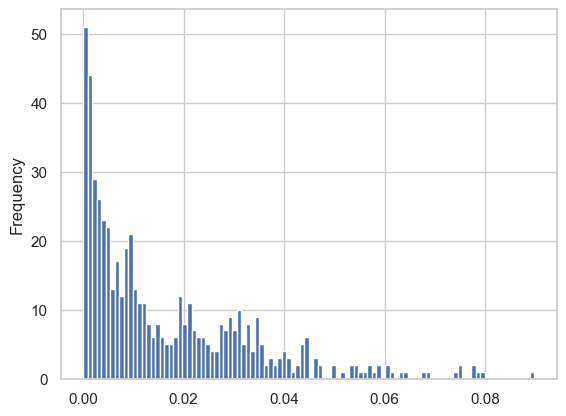

In [204]:
# visualisation de la distribution des corrélations des features
corr_target.apply("abs").sort_values(ascending=False)[4:].plot.hist(bins=100)

In [205]:
corr_target.apply("abs").sort_values(ascending=False)[0:15]

TARGET                                    1.000000
EXT_SOURCE_3                              0.178926
EXT_SOURCE_2                              0.160471
EXT_SOURCE_1                              0.155317
BURO_DAYS_CREDIT_MEAN                     0.089731
BURO_CREDIT_ACTIVE_Closed_MEAN            0.079369
DAYS_BIRTH                                0.078242
PREV_NAME_CONTRACT_STATUS_Refused_MEAN    0.077681
BURO_CREDIT_ACTIVE_Active_MEAN            0.077356
BURO_DAYS_CREDIT_MIN                      0.075248
DAYS_EMPLOYED                             0.074957
PREV_CODE_REJECT_REASON_XAP_MEAN          0.073938
BURO_DAYS_CREDIT_UPDATE_MEAN              0.068929
DAYS_EMPLOYED_PERC                        0.067952
ACTIVE_DAYS_CREDIT_MEAN                   0.064041
dtype: float64

In [206]:
# si pb mémoire augmenter le seuil
seuil_cor = 0.03

In [207]:
ct = corr_target.apply("abs")>seuil_cor

In [208]:
nb_feat=data_train.loc[:,ct[ct].index].shape[1]

In [209]:
print('En retenant les features dont la corrélation avec TARGET est supérieure au seuil de', seuil_cor,
      '\non conserve',nb_feat,'features.')

En retenant les features dont la corrélation avec TARGET est supérieure au seuil de 0.03 
on conserve 115 features.


In [210]:
data_train = data_train.loc[:,ct[ct].index]

In [211]:
# on rajoute la colonne SK_ID_CURR au df final
data_train["SK_ID_CURR"] = data_train.index

In [212]:
data_train.isna().sum().sum()

4174564

In [213]:
data_train

TARGET  CODE_GENDER  AMT_CREDIT  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_EMP_PHONE  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  REG_CITY_NOT_LIVE_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  ELEVATORS_AVG  FLOORSMAX_AVG  LIVINGAREA_AVG  ELEVATORS_MODE  FLOORSMAX_MODE  LIVINGAREA_MODE  ELEVATORS_MEDI  FLOORSMAX_MEDI  ...  PREV_NAME_YIELD_GROUP_high_MEAN  PREV_NAME_YIELD_GROUP_low_normal_MEAN  PREV_PRODUCT_COMBINATION_Card Street_MEAN  PREV_PRODUCT_COMBINATION_Cash Street: high_MEAN  PREV_PRODUCT_COMBINATION_Cash X-Sell: high_MEAN  PREV_PRODUCT_COMBINATION_Cash X-Sell: low_MEAN  PREV_PRODUCT_COMBINATION_POS industry with interest_MEAN  APPROVED_AMT_ANNUITY_MAX  APPROVED_AMT_ANNUITY_MEAN  APPROVED_AMT_APPLICATION_MAX  APPROVED_AMT_APPLICATION_MEAN  APPROVED_APP_CREDIT_PERC_MAX  APPROVED_AMT_GOODS_PRICE_MAX  APPROVED_AMT_GOODS_PRICE_MEAN  \
SK_ID_CURR                                                                                                                                                                                                                                                                                                                                                                                                                                            ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
100002         1.0            0    406597.5         351000.0                    0.018801       -9461         -637.0            -3648.0            -2120               1                     2                            2                       0                        0      0.083037      0.262949      0.139376           0.00         0.0833          0.0190          0.0000          0.0833           0.0198            0.00          0.0833  ...                         0.000000                               1.000000                                   0.000000                                         0.000000                                         0.000000                                        0.000000                                                  0.000000                  9251.775                  9251.7750                      179055.0                     179055.000                      1.000000                      179055.0                     179055.000   
100003         0.0            1   1293502.5        1129500.0                    0.003541      -16765        -1188.0            -1186.0             -291               1                     1                            1                       0                        0      0.311267      0.622246           NaN           0.08         0.2917          0.0549          0.0806          0.2917           0.0554            0.08          0.2917  ...                         0.000000                               0.333333                                   0.000000                                         0.000000                                         0.000000                                        0.333333                                                  0.333333                 98356.995                 56553.9900                      900000.0                     435436.500                      1.011109                      900000.0                     435436.500   
100004         0.0            0    135000.0         135000.0                    0.010032      -19046         -225.0            -4260.0  

#### | Vérification des corrélations restantes après cette étape de diminution des features

In [214]:
# calcul des corrélations avec TARGET
corr_target_ctrl = data_train.corrwith(data_train["TARGET"])

<Axes: ylabel='Frequency'>

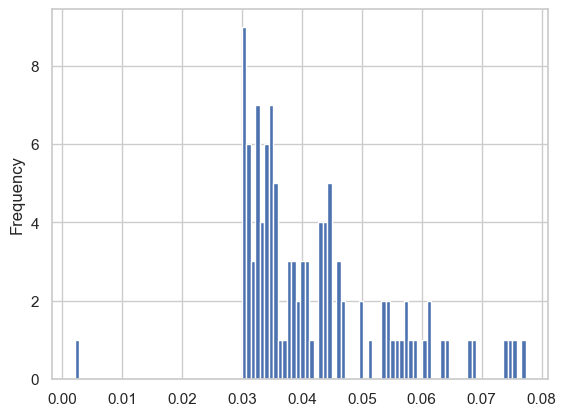

In [215]:
# visualisation de la distribution des corrélations des features
corr_target_ctrl.apply("abs").sort_values(ascending=False)[8:].plot.hist(bins=100)

In [216]:
corr_target_ctrl.apply("abs").sort_values(ascending=False)

TARGET                                             1.000000
EXT_SOURCE_3                                       0.178926
EXT_SOURCE_2                                       0.160471
EXT_SOURCE_1                                       0.155317
BURO_DAYS_CREDIT_MEAN                              0.089731
                                                     ...   
OCCUPATION_TYPE_Drivers                            0.030303
PREV_NAME_GOODS_CATEGORY_Furniture_MEAN            0.030174
PREV_PRODUCT_COMBINATION_Cash X-Sell: high_MEAN    0.030155
PREV_PRODUCT_COMBINATION_Cash Street: high_MEAN    0.030138
SK_ID_CURR                                         0.002111
Length: 116, dtype: float64

## | Aligning data feature shape

### | Separate TARGET from data_train

In [217]:
TARGET = data_train.TARGET #save our TARGET variable
data_train.drop('TARGET', axis=1, inplace=True) #remove TARGET from train

#Align the datasets
data_train, data_test = data_train.align(data_test, join='inner', axis=1)

In [218]:
print(data_train.shape)
print(data_test.shape)

(307507, 114)
(48744, 114)


### | Infinite values (np.nan) / Valeurs manquantes (imputation médiane)

L'une des approches les plus simples consiste à remplacer les NaN par la Médiane (ou Moyenne) pour les variables correspondantes.

In [219]:
print('Missing values in train data: ', sum(data_train.isnull().sum()))
print('Missing values in test data: ', sum(data_test.isnull().sum()))

Missing values in train data:  4174564
Missing values in test data:  545397


**Train dataset :**

In [220]:
print(np.any(np.isfinite(data_train)))

True


In [221]:
data_train[data_train==np.inf] = np.nan

In [222]:
imputer = SimpleImputer(strategy='median', missing_values=np.nan)
idata_train = pd.DataFrame(imputer.fit_transform(data_train))
idata_train.columns=data_train.columns
idata_train.index=data_train.index
idata_train.shape

(307507, 114)

In [223]:
data_train = idata_train
data_train.shape

(307507, 114)

In [224]:
#Check Imputation step
sum(data_train.isnull().sum())

0

**Test dataset :**

In [225]:
print(np.any(np.isfinite(data_test)))

True


In [226]:
data_test[data_test==np.inf] = np.nan

In [227]:
imputer = SimpleImputer(strategy='median')
idata_test = pd.DataFrame(imputer.fit_transform(data_test))
idata_test.columns=data_test.columns
idata_test.index=data_test.index
idata_test.shape

(48744, 114)

In [228]:
data_test = idata_test
data_test.shape

(48744, 114)

In [229]:
#Check Imputation step
sum(data_test.isnull().sum())

0

# | Pré-processing data_train / data_test / sauvegarde des données

On sauvegarde au format zip puis csv les données ainsi préparées, afin de permettre la modélisation dans la prochaine étape.

In [230]:
%%time
#save training data
compression_opts = dict(method='zip', archive_name='data_train.csv')
data_train.to_csv('data_train.zip', index=True, compression=compression_opts)

CPU times: total: 1min 26s
Wall time: 1min 26s


In [231]:
%%time
#save testing data
compression_opts = dict(method='zip', archive_name='data_test.csv')
data_test.to_csv('data_test.zip', index=True, compression=compression_opts)

CPU times: total: 13.9 s
Wall time: 14 s


In [232]:
#saving TARGET
TARGET.to_csv('TARGET.csv', index=True)

La modélisation sera faite sur un Notebook séparé. J'implémenterai les algorithmes Catboost, LightGBM & XGBoost…

Pour comprendre les bases absolues de la nécessité de l'algorithme Boosting, posons une question de base - Si un point de données est mal prédit par notre premier modèle, puis le suivant (probablement tous les modèles), la combinaison des prédictions fournira-t-elle de meilleurs résultats? Ces questions sont traitées par un algorithme de boosting. Ainsi, le Boosting est une technique séquentielle qui fonctionne sur le principe d'un ensemble, où chaque modèle suivant tente de corriger les erreurs du modèle précédent. Les modèles suivants dépendent du modèle précédent.

Le principe de base du fonctionnement de l'algorithme d'amplification est de générer plusieurs apprenants faibles et de combiner leurs prédictions pour former une règle forte. Ces règles faibles sont générées en appliquant des algorithmes d'apprentissage automatique de base sur différentes distributions de l'ensemble de données. Ces algorithmes génèrent des règles faibles pour chaque itération. Après plusieurs itérations, les apprenants faibles sont combinés pour former un apprenant fort qui prédira un résultat plus précis.